## Requirements

- Python 3.6.x


In [2]:
!pip list

Package              Version
-------------------- ---------
absl-py              1.3.0
anyio                3.6.2
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
astor                0.8.1
async-generator      1.10
attrs                22.1.0
Babel                2.11.0
backcall             0.2.0
bleach               4.1.0
cached-property      1.5.2
cairocffi            1.2.0
certifi              2022.12.7
cffi                 1.15.1
charset-normalizer   2.0.12
contextvars          2.4
cycler               0.11.0
Cython               0.29.32
dataclasses          0.8
decorator            4.4.2
defusedxml           0.7.1
entrypoints          0.4
fastdtw              0.3.4
gast                 0.5.3
gensim               4.2.0
google-pasta         0.2.0
grpcio               1.48.2
h5py                 3.1.0
hdbscan              0.8.27
idna                 3.4
igraph               0.9.11
immutables           0.19
importlib-metadata   4.8.3
importlib-resources  5.4.0
ipykernel       

## Install

In [5]:
# !apt-get install python3.7

In [1]:
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1

In [7]:
# !sudo update-alternatives --config python3

In [8]:
!pip install tensorflow==1.14.0

In [9]:
pip install hdbscan

Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install umap-learn

In [11]:
!pip install python-igraph
!pip install cairocffi

In [12]:
!pip install ipython-autotime

In [13]:
!pip install scipy

In [14]:
!pip install plotly

In [15]:
!pip install --upgrade gensim

In [16]:
# install StellarGraph if running on Google Colab
""" import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1 """

" import sys\nif 'google.colab' in sys.modules:\n  %pip install -q stellargraph[demos]==1.2.1 "

## Import library

In [1]:
from gensim.models import Word2Vec
from hdbscan import HDBSCAN
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, OPTICS
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Normalizer
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding, SpectralEmbedding
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score, rand_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_kernels, pairwise_distances, cosine_similarity
# from stellargraph import StellarGraph
# from stellargraph.data import UniformRandomWalk, BiasedRandomWalk
from scipy.spatial import distance
from umap import UMAP
from Utils.utils import *

# import igraph as ig
import math 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import networkx as nx
import numpy as np
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import random
import seaborn as sns
import sys

# import plotly.tools as tls
# from plotly.graph_objs import *

%matplotlib inline
%load_ext autotime
# pd.options.display.float_format = "{:.8f}".format
np.random.seed(42)

time: 285 µs (started: 2022-12-10 11:42:49 -05:00)


In [2]:
if "google.colab" in sys.modules:
  from google.colab import drive

  drive.mount("/content/drive")
  dir = "/content/drive/MyDrive/PUCP/Phd/S2/T2/GraphEmbedding"
  py_file_location = "/content/drive/MyDrive/PUCP/Phd/S2/T2/GraphEmbedding/GraphEmbedding-master"
  
else:
  dir = "/home/win7/Project/I.A./GraphEmbedding_Spectrometry"
  py_file_location = "/home/win7/Project/I.A./GraphEmbedding_master"

sys.path.append(os.path.abspath(py_file_location))


time: 1.21 ms (started: 2022-12-10 11:42:49 -05:00)


In [ ]:
from GraphEmbedding_master.ge.classify import read_node_label, Classifier
from GraphEmbedding_master.ge import Struc2Vec, Node2Vec, SDNE, LINE, DeepWalk

## Load dataset

In [12]:
colors = ["#FF00FF", "#3FFF00", "#00FFFF", "#FFF700", "#FF0000", "#0000FF", "#006600",
          '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', 'black',"gray"]
# colors = px.colors.sequential.Rainbow

time: 540 µs (started: 2022-12-10 00:05:17 -05:00)


In [4]:
# Metadata
df_meta = pd.read_csv("{}/inputs/SecondDataset/process_metadata.csv".format(dir), delimiter="|")
df_meta

Corrected (m/z) Metabolites - Approved by Nicola  \
0            59.0137                      Acetic acid   
1                NaN                       Acrylamide   
2            71.0139                     Acrylic acid   
3                NaN                Tetrahydrophurane   
4                NaN                   Propionic acid   
..               ...                              ...   
186              NaN                   C20H27N10O16P3   
187         766.1076                       Coenzyme A   
188         784.1495                              FAD   
189         808.1180                Acetyl coenzyme A   
190              NaN                   C27H44N7O20P3S   

    Metabolites - Used by Florian  Theoretical - m/z (based on BioCyc)  \
0                               *                             59.01357   
1                               *                             70.02955   
2                               *                             71.01357   
3                               *                             71.04995   
4                               *                             73.02922   
..                            ...                                  ...   
186                             *                            755.07466   
187                             *                            766.10765   
188                             *                            784.14957   
189                             *                            808.11821   
190                             *                            910.14991   

    Chemical Formula (based on BioCyc) Adduct (negative mode)  \
0                               C2H4O2                      H   
1                               C3H5NO                      H   
2                               C3H4O2                      H   
3                                C4H8O                      H   
4                               C3H6O2                      H   
..                                 ...                    ...   
186                     C20H27N10O16P3                      H   
187                     C21H36N7O16P3S                      H   
188                      C27H33N9O15P2                      H   
189                     C23H38N7O17P3S                      H   
190                     C27H44N7O20P3S                      H   

    Error in mDa (oTOF) Error in PPM (Theoretical vs Corrected)  
0               0.00013                                 2.24338  
1               0.98435                              14056.1798  
2               3.01133                             42405.02894  
3              13.97965                            196758.00293  
4              13.97938                            191421.77297  
..                  ...                                     ...  
186           755.07466                                 1000000  
187           766.10765                                 1000000  
188           784.14957                                 1000000  
189           808.11821                                 1000000  
190           910.14991                                 1000000  

[191 rows x 8 columns]

time: 49 ms (started: 2022-12-10 11:42:50 -05:00)


In [5]:
df_meta = df_meta.dropna(axis=0)
df_meta = df_meta.astype({"Corrected (m/z)": str})
df_meta.set_index("Corrected (m/z)", inplace=True)
df_meta

Metabolites - Approved by Nicola  \
Corrected (m/z)                                      
59.0137                                Acetic acid   
71.0139                               Acrylic acid   
74.0249                                    Glycine   
85.0296                            Methyl Acrylate   
87.0086                               Pyruvic acid   
...                                            ...   
664.117          Nicotinamide adenine dinucleotide   
665.2139                            C33H36N6O7 + K   
766.1076                                Coenzyme A   
784.1495                                       FAD   
808.118                          Acetyl coenzyme A   

                Metabolites - Used by Florian  \
Corrected (m/z)                                 
59.0137                                     *   
71.0139                                     *   
74.0249                                     *   
85.0296                                     *   
87.0086                                     *   
...                                       ...   
664.117                                     *   
665.2139                                    *   
766.1076                                    *   
784.1495                                    *   
808.118                                     *   

                 Theoretical - m/z (based on BioCyc)  \
Corrected (m/z)                                        
59.0137                                     59.01357   
71.0139                                     71.01357   
74.0249                                     74.02447   
85.0296                                     85.02922   
87.0086                                     87.00848   
...                                              ...   
664.117                                    664.11721   
665.2139                                   665.21430   
766.1076                                   766.10765   
784.1495                                   784.14957   
808.118                                    808.11821   

                Chemical Formula (based on BioCyc) Adduct (negative mode)  \
Corrected (m/z)                                                             
59.0137                                     C2H4O2                      H   
71.0139                                     C3H4O2                      H   
74.0249                                    C2H5NO2                      H   
85.0296                                     C4H6O2                      H   
87.0086                                     C3H4O3                      H   
...                                            ...                    ...   
664.117                              C21H29N7O14P2                      H   
665.2139                                 C24H42O21                      H   
766.1076                            C21H36N7O16P3S                      H   
784.1495                             C27H33N9O15P2                      H   
808.118                             C23H38N7O17P3S                      H   

                Error in mDa (oTOF) Error in PPM (Theoretical vs Corrected)  
Corrected (m/z)                                                              
59.0137                     0.00013                                 2.24338  
71.0139                     3.01133                             42405.02894  
74.0249                    14.01603                            189343.25348  
85.0296                     3.99528                             46987.17023  
87.0086                    14.01582                             161085.6483  
...                             ...                                     ...  
664.117                   664.11721                                 1000000  
665.2139                   665.2143                                 1000000  
766.1076                  766.10765                                 1000000  
784.1495                  784.14957                                 1000000  
808.118   

time: 27.2 ms (started: 2022-12-10 11:42:50 -05:00)


In [6]:
# Load dataset Group 1
df1 = pd.read_csv("{}/inputs/SecondDataset/process_wt.csv".format(dir), delimiter="|")

print(df1.shape)
df1.head()

(230, 92)


Set Cluster  ID          ionMz Label  59.0137  71.0139  74.0249  85.0296  \
0   A      WT  71  0071 / WT 2.2    WT    56523     1438     3904     1167   
1   A      WT  72  0072 / WT 2.2    WT    24625      570     1531      518   
2   A      WT  73  0073 / WT 2.2    WT    78586      577     2486     1260   
3   A      WT  74  0074 / WT 2.2    WT    76559     1272     2501     1565   
4   A      WT  75  0075 / WT 2.2    WT    67449     1060     2557     1345   

   87.0086  ...  521.984  545.3994  604.0696  606.0744  611.144  664.117  \
0     1646  ...    17082      7826     21390     95664     9169     6184   
1     1068  ...    10087      5536     11066     44221     3993     3181   
2     1095  ...    21099      9408     24709    105252     9896     8580   
3     1673  ...    21910      8717     22982    103328    10482     6189   
4     1596  ...    22226      9082     23236    105020     9024     6370   

   665.2139  766.1076  784.1495  808.118  
0      3014      4161      2455     4679  
1      2565      1987      1553     2701  
2      5077      5141      2404     5618  
3      3498      5228      3433     5782  
4      3947      4743      1996     5418  

[5 rows x 92 columns]

time: 50.8 ms (started: 2022-12-10 11:42:50 -05:00)


In [ ]:
# df1.set_index("Alignment ID", inplace=True)
# df1.head()

time: 509 µs (started: 2022-12-08 23:36:29 -05:00)


In [7]:
# Load dataset Group 2

df2 = pd.read_csv("{}/inputs/SecondDataset/process_zw.csv".format(dir), delimiter="|")

print(df2.shape)
df2.head()

(150, 92)


Set Cluster  ID             ionMz  Label  59.0137  71.0139  74.0249  \
0   A      WT   1  0001 / zwf1^ 3.4  zwf1^    53182      641     5734   
1   A      WT   2  0002 / zwf1^ 3.4  zwf1^    57902     1767     2889   
2   A      WT   3  0003 / zwf1^ 3.4  zwf1^    51861      491     3540   
3   A      WT   4  0004 / zwf1^ 3.4  zwf1^    62812     1648     6611   
4   A      WT   5  0005 / zwf1^ 3.4  zwf1^    54291     1525     3965   

   85.0296  87.0086  ...  521.984  545.3994  604.0696  606.0744  611.144  \
0     1042     1294  ...    23348      6988     64597    114975     7538   
1     1228     1531  ...    26203      5613     75636    131864     8365   
2     1054     2448  ...    22678      6304     64496    114834     7459   
3      914     2578  ...    25871      7033     76118    137734     6667   
4      872     1812  ...    22464      6646     67845    121045     8957   

   664.117  665.2139  766.1076  784.1495  808.118  
0     4107      3095      3877      2040     3349  
1     4607      4145      5541      2816     6021  
2     4293      3090      3279      1465     5946  
3     6285      4698      4961      2726     7357  
4     5474      4182      5072      2647     5559  

[5 rows x 92 columns]

time: 73.1 ms (started: 2022-12-10 11:42:50 -05:00)


In [ ]:
# df2.set_index("Alignment ID", inplace=True)
# df2.head()

time: 316 µs (started: 2022-12-08 23:35:06 -05:00)


In [8]:
# Load dataset Group 3

df3 = pd.read_csv("{}/inputs/SecondDataset/process_pc.csv".format(dir), delimiter="|")

print(df3.shape)
df3.head()

(80, 92)


Set Cluster  ID             ionMz  Label  59.0137  71.0139  74.0249  \
0   A      WT  11  0011 / pck1^ 2.4  pck1^    33968     1496     3792   
1   A      WT  12  0012 / pck1^ 2.4  pck1^    22565     1443     2265   
2   A      WT  13  0013 / pck1^ 2.4  pck1^    36285     1810     4060   
3   A      WT  14  0014 / pck1^ 2.4  pck1^    30275      678     3406   
4   A      WT  15  0015 / pck1^ 2.4  pck1^    34858     1257     4116   

   85.0296  87.0086  ...  521.984  545.3994  604.0696  606.0744  611.144  \
0     1289     2829  ...    17222      3332     43544    122538     8787   
1     1072     1470  ...    12663      2010     33046     90194     6764   
2     1329     2535  ...    18559      2929     46944    138287     9483   
3      622      981  ...    14865      2604     35976    107078     7822   
4     2149     1629  ...    17731      3467     41368    132745    10627   

   664.117  665.2139  766.1076  784.1495  808.118  
0    15937      4800      7941      4592     6114  
1    12166      3541      5093      3797     4205  
2    14447      3850      7393      4266     6319  
3    12518      3170      5731      4448     4696  
4    14631      4577      8116      3130     6239  

[5 rows x 92 columns]

time: 51.9 ms (started: 2022-12-10 11:42:50 -05:00)


## Preprocessing

### Join sub row data

In [9]:
# df_process1 = df1.iloc[:,5:]
# df_process1 = df1[df1["Set"] == "A"].iloc[:, 5:]
df_process1 = df2[df2["Set"] == "A"].iloc[:, 5:]

df_process1

59.0137  71.0139  74.0249  85.0296  87.0086  88.0405  89.0245  101.0243  \
0      53182      641     5734     1042     1294     1940     2755       902   
1      57902     1767     2889     1228     1531      990     2511       606   
2      51861      491     3540     1054     2448     1928     1608       677   
3      62812     1648     6611      914     2578     1633     2480       581   
4      54291     1525     3965      872     1812     1348     2306      1630   
..       ...      ...      ...      ...      ...      ...      ...       ...   
115   129628     1838    10490     2012     3117     3222     3176      1507   
116   127563     1962     7264     1931     2241     1700     3390       997   
117   116371     2126     6332     1623     1771     1506     1578      1875   
118   114443     2238     8344     1290     2458     1425     2673      1151   
119   118647     1541     5619     1562     2195     1809     3992      1516   

     102.0562  109.0407  ...  521.984  545.3994  604.0696  606.0744  611.144  \
0        1260      4804  ...    23348      6988     64597    114975     7538   
1        1105      2865  ...    26203      5613     75636    131864     8365   
2        1154      2347  ...    22678      6304     64496    114834     7459   
3        1096      4227  ...    25871      7033     76118    137734     6667   
4         803      2882  ...    22464      6646     67845    121045     8957   
..        ...       ...  ...      ...       ...       ...       ...      ...   
115      2917      6393  ...    33568     11259     27205     73112     6420   
116      2262      5885  ...    28032      7847     26171     68764     6317   
117      2339      4505  ...    33070      8290     26751     71346     7152   
118      2669      4236  ...    26079      8948     26306     62803     6692   
119      1795      4035  ...    27745      8443     24164     59590     5820   

     664.117  665.2139  766.1076  784.1495  808.118  
0       4107      3095      3877      2040     3349  
1       4607      4145      5541      2816     6021  
2       4293      3090      3279      1465     5946  
3       6285      4698      4961      2726     7357  
4       5474      4182      5072      2647     5559  
..       ...       ...       ...       ...      ...  
115    30236      3880      5873      2777     4057  
116    28520      3325      7379      2591     4651  
117    30316      4474      5283      2820     4332  
118    24865      3591      6355      3410     4097  
119    26544      2827      4407      2109     3750  

[120 rows x 87 columns]

time: 30.9 ms (started: 2022-12-10 11:42:50 -05:00)


In [10]:
# df_process2 = df1.iloc[:,5:]
# df_process2 = df1[df1["Set"] == "B"].iloc[:, 5:]
df_process2 = df2[df2["Set"] == "B"].iloc[:, 5:]

df_process2

59.0137  71.0139  74.0249  85.0296  87.0086  88.0405  89.0245  101.0243  \
120   492151    56202   135042    79787    24972    40786   107219     24729   
121   266046    41055    96689    65532    20413    33232    70418     21036   
122   306408    40586   100529    54964    20087    31930    71908     20388   
123   276418    39405    99356    62804    24145    35215    77343     22901   
124   103041    20735    57256    48235    16964    27364    65515     19408   
125   133460    24274    60145    51493    15593    25560    62448     20316   
126   368665    49215   120697    75953    28352    41205   106466     23647   
127   290351    40386    93313    60625    20794    33519    79931     21764   
128   147248    23854    60079    42921    16604    24395    50174     19114   
129   157700    25667    60569    36160    14401    20856    45682     16076   
130   160601    45908   130672    58698    20879    38162    81718     24023   
131   116113    34463   107534    51066    22240    28693    61209     19734   
132   140257    37936   118828    63299    24775    35396    78807     25621   
133   165732    43497   137468    65586    23699    42759    86168     26966   
134   244179    59537   184164    80170    31125    47662   109874     32480   
135   170729    45536   147933    63933    27505    36080    75374     25232   
136   311449    64713   201433    88502    37702    54256   125227     37198   
137   281845    62802   196561    99294    35664    59510   130172     39321   
138   167030    43997   131530    60242    26862    38698    88775     27319   
139   163545    44994   133579    60892    25974    33136    78686     22054   
140   113929    23820    71486    41599    11334    21114    39310     15406   
141   146501    31311    77843    45479    11960    22432    43874     17735   
142   181591    36830    98272    56487    17031    28979    62791     18486   
143   185130    35652    94198    55858    18786    28513    64178     20910   
144   193451    36922    92972    58914    16818    28135    64861     19573   
145   181058    34300    94410    53978    17378    26847    58738     21390   
146   133247    35946    91914    66589    20837    35502    81753     22785   
147   156753    34937    90135    58742    19972    35555    73766     25427   
148   192830    31011    88636    48706    16375    23797    52303     24101   
149   146046    38195    85284    55789    17259    25773    49024     20799   

     102.0562  109.0407  ...  521.984  545.3994  604.0696  606.0744  611.144  \
120     44919    110903  ...   203227    119960    462299    973513    29926   
121     39187    104001  ...   164996     93711    364985    711231    28342   
122     35661     98163  ...   189251    114877    448030    883964    29096   
123     41558    119314  ...   170255     99189    383851    745099    28287   
124     32737     97649  ...   188685    121449    462978    928661    31392   
125     31652     91218  ...   214544    127575    474940    992042    31016   
126     45147    104827  ...   199336    116218    452813    903588    29526   
127     36186    111883  ...   165600    101544    372805    739842    26682   
128     31815     92492  ...   198361    128654    475592    971897    32999   
129     27443     84241  ...   212890    126831    459869    960648    31005   
130     55176    160130  ...   320361     86922    650060   1655095    47219   
131     49563    160660  ...   291738     77232    596225   1467940    43358   
132     56972    170641  ...   333691     90146    638324   1601228    44665   
133     58485    182028  ...   331249     87293    639117   1658784    48750   
134     65338    194593  ...   308822     86419    637579   1598596    45811   
135     57820    193591  ...   274098     71898    543361   1331521    43520   
136     73072    189814  ...   321257     84806    619211   1640352    47753   
137     82646    216843  ...   313378     88779    609725   1608764    48398   
138 

time: 27 ms (started: 2022-12-10 11:42:50 -05:00)


### Calculate the logarithm

In [11]:
df_process1_log = df_process1.copy()
for column in df_process1.columns:
  df_process1_log[column] = np.log10(df_process1_log[column])
df_process1_log

59.0137   71.0139   74.0249   85.0296   87.0086   88.0405   89.0245  \
0    4.725765  2.806858  3.758458  3.017868  3.111934  3.287802  3.440122   
1    4.762694  3.247237  3.460748  3.089198  3.184975  2.995635  3.399847   
2    4.714841  2.691081  3.549003  3.022841  3.388811  3.285107  3.206286   
3    4.798043  3.216957  3.820267  2.960946  3.411283  3.212986  3.394452   
4    4.734728  3.183270  3.598243  2.940516  3.258158  3.129690  3.362859   
..        ...       ...       ...       ...       ...       ...       ...   
115  5.112699  3.264346  4.020775  3.303628  3.493737  3.508126  3.501880   
116  5.105725  3.292699  3.861176  3.285782  3.350442  3.230449  3.530200   
117  5.065845  3.327563  3.801541  3.210319  3.248219  3.177825  3.198107   
118  5.058589  3.349860  3.921374  3.110590  3.390582  3.153815  3.426999   
119  5.074257  3.187803  3.749659  3.193681  3.341435  3.257439  3.601191   

     101.0243  102.0562  109.0407  ...   521.984  545.3994  604.0696  \
0    2.955207  3.100371  3.681603  ...  4.368250  3.844353  4.810212   
1    2.782473  3.043362  3.457125  ...  4.418351  3.749195  4.878729   
2    2.830589  3.062206  3.370513  ...  4.355605  3.799616  4.809533   
3    2.764176  3.039811  3.626032  ...  4.412813  3.847141  4.881487   
4    3.212188  2.904716  3.459694  ...  4.351487  3.822560  4.831518   
..        ...       ...       ...  ...       ...       ...       ...   
115  3.178113  3.464936  3.805705  ...  4.525925  4.051500  4.434649   
116  2.998695  3.354493  3.769746  ...  4.447654  3.894704  4.417820   
117  3.273001  3.369030  3.653695  ...  4.519434  3.918555  4.427340   
118  3.061075  3.426349  3.626956  ...  4.416291  3.951726  4.420055   
119  3.180699  3.254064  3.605844  ...  4.443185  3.926497  4.383169   

     606.0744   611.144   664.117  665.2139  766.1076  784.1495   808.118  
0    5.060603  3.877256  3.613525  3.490661  3.588496  3.309630  3.524915  
1    5.120126  3.922466  3.663418  3.617525  3.743588  3.449633  3.779669  
2    5.060070  3.872681  3.632761  3.489958  3.515741  3.165838  3.774225  
3    5.139041  3.823930  3.798305  3.671913  3.695569  3.435526  3.866701  
4    5.082947  3.952163  3.738305  3.621384  3.705179  3.422754  3.744997  
..        ...       ...       ...       ...       ...       ...       ...  
115  4.863989  3.807535  4.480524  3.588832  3.768860  3.443576  3.608205  
116  4.837361  3.800511  4.455150  3.521792  3.867998  3.413467  3.667546  
117  4.853370  3.854428  4.481672  3.650696  3.722881  3.450249  3.636688  
118  4.797980  3.825556  4.395588  3.555215  3.803116  3.532754  3.612466  
119  4.775173  3.764923  4.423966  3.451326  3.644143  3.324077  3.574031  

[120 rows x 87 columns]

time: 53 ms (started: 2022-12-10 11:42:50 -05:00)


In [12]:
df_process2_log = df_process2.copy()
for column in df_process2.columns:
  df_process2_log[column] = np.log10(df_process2_log[column])
df_process2_log

59.0137   71.0139   74.0249   85.0296   87.0086   88.0405   89.0245  \
120  5.692098  4.749752  5.130469  4.901932  4.397453  4.610511  5.030272   
121  5.424957  4.613366  4.985377  4.816453  4.309907  4.521556  4.847684   
122  5.486300  4.608376  5.002291  4.740078  4.302915  4.504199  4.856777   
123  5.441566  4.595551  4.997194  4.797987  4.382827  4.546728  4.888421   
124  5.013010  4.316704  4.757821  4.683362  4.229528  4.437180  4.816341   
125  5.125351  4.385141  4.779200  4.711748  4.192930  4.407561  4.795519   
126  5.566632  4.692097  5.081696  4.880545  4.452584  4.614950  5.027211   
127  5.462923  4.606231  4.969942  4.782652  4.317938  4.525291  4.902715   
128  5.168049  4.377561  4.778723  4.632670  4.220213  4.387301  4.700479   
129  5.197832  4.409375  4.782250  4.558228  4.158393  4.319231  4.659745   
130  5.205748  4.661888  5.116183  4.768623  4.319710  4.581631  4.912318   
131  5.064881  4.537353  5.031546  4.708132  4.347135  4.457776  4.786815   
132  5.146925  4.579052  5.074919  4.801397  4.394014  4.548954  4.896565   
133  5.219406  4.638459  5.138202  4.816811  4.374730  4.631028  4.935346   
134  5.387708  4.774787  5.265205  4.904012  4.493109  4.678172  5.040895   
135  5.232307  4.658355  5.170065  4.805725  4.439412  4.557267  4.877222   
136  5.493387  4.810992  5.304131  4.946953  4.576364  4.734448  5.097698   
137  5.450010  4.797973  5.293497  4.996923  4.552230  4.774590  5.114518   
138  5.222794  4.643423  5.119025  4.779899  4.429138  4.587689  4.948291   
139  5.213637  4.653155  5.125738  4.784560  4.414539  4.520300  4.895897   
140  5.056634  4.376942  4.854221  4.619083  4.054383  4.324571  4.594503   
141  5.165841  4.495697  4.891220  4.657811  4.077731  4.350868  4.642207   
142  5.259094  4.566202  4.992430  4.751949  4.231240  4.462083  4.797897   
143  5.267477  4.552084  4.974042  4.747085  4.273834  4.455043  4.807386   
144  5.286571  4.567285  4.968352  4.770219  4.225774  4.449247  4.811984   
145  5.257818  4.535294  4.975018  4.732217  4.240000  4.428896  4.768919   
146  5.124657  4.555651  4.963382  4.823402  4.318835  4.550253  4.912504   
147  5.195216  4.543286  4.954893  4.768949  4.300422  4.550901  4.867856   
148  5.285175  4.491516  4.947610  4.687582  4.214181  4.376522  4.718527   
149  5.164490  4.582007  4.930868  4.746549  4.237016  4.411165  4.690409   

     101.0243  102.0562  109.0407  ...   521.984  545.3994  604.0696  \
120  4.393207  4.652430  5.044943  ...  5.307981  5.079036  5.664923   
121  4.322963  4.593142  5.017038  ...  5.217473  4.971791  5.562275   
122  4.309375  4.552194  4.991948  ...  5.277038  5.060233  5.651307   
123  4.359854  4.618655  5.076691  ...  5.231100  4.996464  5.584163   
124  4.287981  4.515039  4.989668  ...  5.275737  5.084394  5.665560   
125  4.307838  4.500401  4.960081  ...  5.331516  5.105766  5.676639   
126  4.373776  4.654629  5.020473  ...  5.299586  5.065273  5.655919   
127  4.337739  4.558541  5.048764  ...  5.219060  5.006654  5.571482   
128  4.281352  4.502632  4.966104  ...  5.297456  5.109423  5.677235   
129  4.206178  4.438432  4.925524  ...  5.328155  5.103225  5.662634   
130  4.380627  4.741750  5.204473  ...  5.505640  4.939130  5.812953   
131  4.295215  4.695158  5.205908  ...  5.464993  4.887797  5.775410   
132  4.408596  4.755661  5.232083  ...  5.523344  4.954946  5.805041   
133  4.430817  4.767044  5.260138  ...  5.520155  4.940979  5.805580   
134  4.511616  4.815166  5.289127  ...  5.489708  4.936609  5.804534   
135  4.401952  4.762078  5.286885  ...  5.437906  4.856717  5.735088   
136  4.570520  4.863751  5.278328  ...  5.506853  4.928427  5.791839   
137  4.594625  4.917222  5.336145  ...  5.496069  4.948310  5.785134   
138  4.436465  4.797496  5.257503  ...  5.438183  4.939315  5.777673   
139  4.343487  4.778846  5.226156  ...  5.481981  4.914391  5.795717   
140  4.187690  4.448227  4.996258  ...  5.388668  5.116030  5.771343   
141  4.248831  4.475163  4.995179 

time: 80 ms (started: 2022-12-10 11:42:51 -05:00)


### Transpose

In [13]:
# df_process1_t = transpose(df_process1_log)
df_process1_t = df_process1_log.copy()
df_process1_t

59.0137   71.0139   74.0249   85.0296   87.0086   88.0405   89.0245  \
0    4.725765  2.806858  3.758458  3.017868  3.111934  3.287802  3.440122   
1    4.762694  3.247237  3.460748  3.089198  3.184975  2.995635  3.399847   
2    4.714841  2.691081  3.549003  3.022841  3.388811  3.285107  3.206286   
3    4.798043  3.216957  3.820267  2.960946  3.411283  3.212986  3.394452   
4    4.734728  3.183270  3.598243  2.940516  3.258158  3.129690  3.362859   
..        ...       ...       ...       ...       ...       ...       ...   
115  5.112699  3.264346  4.020775  3.303628  3.493737  3.508126  3.501880   
116  5.105725  3.292699  3.861176  3.285782  3.350442  3.230449  3.530200   
117  5.065845  3.327563  3.801541  3.210319  3.248219  3.177825  3.198107   
118  5.058589  3.349860  3.921374  3.110590  3.390582  3.153815  3.426999   
119  5.074257  3.187803  3.749659  3.193681  3.341435  3.257439  3.601191   

     101.0243  102.0562  109.0407  ...   521.984  545.3994  604.0696  \
0    2.955207  3.100371  3.681603  ...  4.368250  3.844353  4.810212   
1    2.782473  3.043362  3.457125  ...  4.418351  3.749195  4.878729   
2    2.830589  3.062206  3.370513  ...  4.355605  3.799616  4.809533   
3    2.764176  3.039811  3.626032  ...  4.412813  3.847141  4.881487   
4    3.212188  2.904716  3.459694  ...  4.351487  3.822560  4.831518   
..        ...       ...       ...  ...       ...       ...       ...   
115  3.178113  3.464936  3.805705  ...  4.525925  4.051500  4.434649   
116  2.998695  3.354493  3.769746  ...  4.447654  3.894704  4.417820   
117  3.273001  3.369030  3.653695  ...  4.519434  3.918555  4.427340   
118  3.061075  3.426349  3.626956  ...  4.416291  3.951726  4.420055   
119  3.180699  3.254064  3.605844  ...  4.443185  3.926497  4.383169   

     606.0744   611.144   664.117  665.2139  766.1076  784.1495   808.118  
0    5.060603  3.877256  3.613525  3.490661  3.588496  3.309630  3.524915  
1    5.120126  3.922466  3.663418  3.617525  3.743588  3.449633  3.779669  
2    5.060070  3.872681  3.632761  3.489958  3.515741  3.165838  3.774225  
3    5.139041  3.823930  3.798305  3.671913  3.695569  3.435526  3.866701  
4    5.082947  3.952163  3.738305  3.621384  3.705179  3.422754  3.744997  
..        ...       ...       ...       ...       ...       ...       ...  
115  4.863989  3.807535  4.480524  3.588832  3.768860  3.443576  3.608205  
116  4.837361  3.800511  4.455150  3.521792  3.867998  3.413467  3.667546  
117  4.853370  3.854428  4.481672  3.650696  3.722881  3.450249  3.636688  
118  4.797980  3.825556  4.395588  3.555215  3.803116  3.532754  3.612466  
119  4.775173  3.764923  4.423966  3.451326  3.644143  3.324077  3.574031  

[120 rows x 87 columns]

time: 24.6 ms (started: 2022-12-10 11:42:51 -05:00)


In [14]:
# df_process1_t = transpose(df_process1_log)
df_process2_t = df_process2_log.copy()
df_process2_t

59.0137   71.0139   74.0249   85.0296   87.0086   88.0405   89.0245  \
120  5.692098  4.749752  5.130469  4.901932  4.397453  4.610511  5.030272   
121  5.424957  4.613366  4.985377  4.816453  4.309907  4.521556  4.847684   
122  5.486300  4.608376  5.002291  4.740078  4.302915  4.504199  4.856777   
123  5.441566  4.595551  4.997194  4.797987  4.382827  4.546728  4.888421   
124  5.013010  4.316704  4.757821  4.683362  4.229528  4.437180  4.816341   
125  5.125351  4.385141  4.779200  4.711748  4.192930  4.407561  4.795519   
126  5.566632  4.692097  5.081696  4.880545  4.452584  4.614950  5.027211   
127  5.462923  4.606231  4.969942  4.782652  4.317938  4.525291  4.902715   
128  5.168049  4.377561  4.778723  4.632670  4.220213  4.387301  4.700479   
129  5.197832  4.409375  4.782250  4.558228  4.158393  4.319231  4.659745   
130  5.205748  4.661888  5.116183  4.768623  4.319710  4.581631  4.912318   
131  5.064881  4.537353  5.031546  4.708132  4.347135  4.457776  4.786815   
132  5.146925  4.579052  5.074919  4.801397  4.394014  4.548954  4.896565   
133  5.219406  4.638459  5.138202  4.816811  4.374730  4.631028  4.935346   
134  5.387708  4.774787  5.265205  4.904012  4.493109  4.678172  5.040895   
135  5.232307  4.658355  5.170065  4.805725  4.439412  4.557267  4.877222   
136  5.493387  4.810992  5.304131  4.946953  4.576364  4.734448  5.097698   
137  5.450010  4.797973  5.293497  4.996923  4.552230  4.774590  5.114518   
138  5.222794  4.643423  5.119025  4.779899  4.429138  4.587689  4.948291   
139  5.213637  4.653155  5.125738  4.784560  4.414539  4.520300  4.895897   
140  5.056634  4.376942  4.854221  4.619083  4.054383  4.324571  4.594503   
141  5.165841  4.495697  4.891220  4.657811  4.077731  4.350868  4.642207   
142  5.259094  4.566202  4.992430  4.751949  4.231240  4.462083  4.797897   
143  5.267477  4.552084  4.974042  4.747085  4.273834  4.455043  4.807386   
144  5.286571  4.567285  4.968352  4.770219  4.225774  4.449247  4.811984   
145  5.257818  4.535294  4.975018  4.732217  4.240000  4.428896  4.768919   
146  5.124657  4.555651  4.963382  4.823402  4.318835  4.550253  4.912504   
147  5.195216  4.543286  4.954893  4.768949  4.300422  4.550901  4.867856   
148  5.285175  4.491516  4.947610  4.687582  4.214181  4.376522  4.718527   
149  5.164490  4.582007  4.930868  4.746549  4.237016  4.411165  4.690409   

     101.0243  102.0562  109.0407  ...   521.984  545.3994  604.0696  \
120  4.393207  4.652430  5.044943  ...  5.307981  5.079036  5.664923   
121  4.322963  4.593142  5.017038  ...  5.217473  4.971791  5.562275   
122  4.309375  4.552194  4.991948  ...  5.277038  5.060233  5.651307   
123  4.359854  4.618655  5.076691  ...  5.231100  4.996464  5.584163   
124  4.287981  4.515039  4.989668  ...  5.275737  5.084394  5.665560   
125  4.307838  4.500401  4.960081  ...  5.331516  5.105766  5.676639   
126  4.373776  4.654629  5.020473  ...  5.299586  5.065273  5.655919   
127  4.337739  4.558541  5.048764  ...  5.219060  5.006654  5.571482   
128  4.281352  4.502632  4.966104  ...  5.297456  5.109423  5.677235   
129  4.206178  4.438432  4.925524  ...  5.328155  5.103225  5.662634   
130  4.380627  4.741750  5.204473  ...  5.505640  4.939130  5.812953   
131  4.295215  4.695158  5.205908  ...  5.464993  4.887797  5.775410   
132  4.408596  4.755661  5.232083  ...  5.523344  4.954946  5.805041   
133  4.430817  4.767044  5.260138  ...  5.520155  4.940979  5.805580   
134  4.511616  4.815166  5.289127  ...  5.489708  4.936609  5.804534   
135  4.401952  4.762078  5.286885  ...  5.437906  4.856717  5.735088   
136  4.570520  4.863751  5.278328  ...  5.506853  4.928427  5.791839   
137  4.594625  4.917222  5.336145  ...  5.496069  4.948310  5.785134   
138  4.436465  4.797496  5.257503  ...  5.438183  4.939315  5.777673   
139  4.343487  4.778846  5.226156  ...  5.481981  4.914391  5.795717   
140  4.187690  4.448227  4.996258  ...  5.388668  5.116030  5.771343   
141  4.248831  4.475163  4.995179 

time: 56.6 ms (started: 2022-12-10 11:42:51 -05:00)


### Normal distribution (Done)

In [33]:
# sns.pairplot(df_process1)

time: 217 µs (started: 2022-12-10 00:07:49 -05:00)


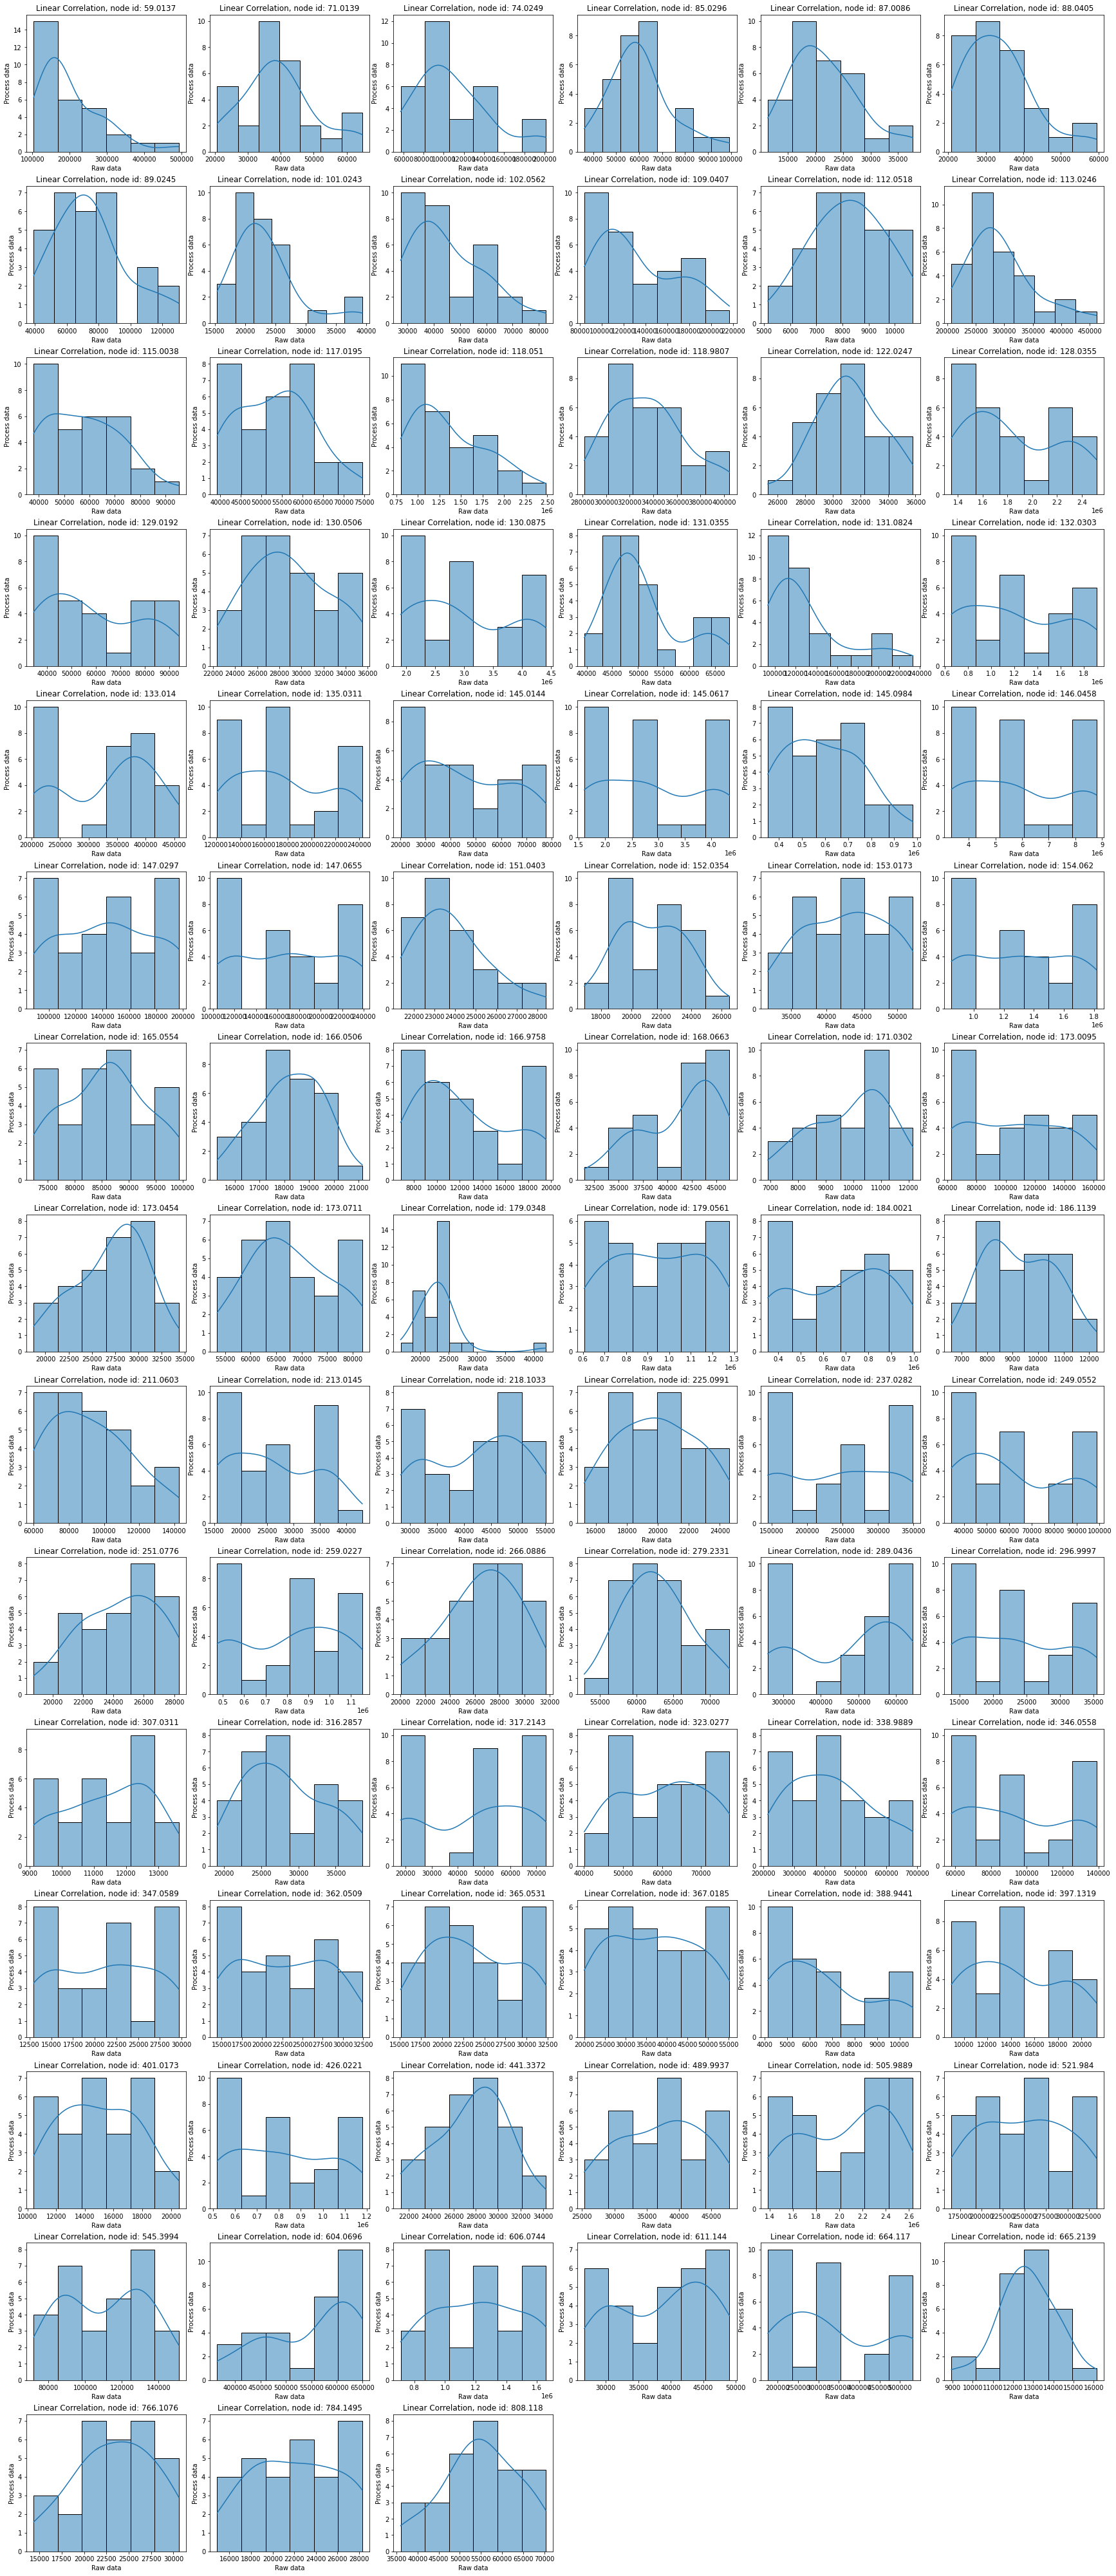

time: 12.2 s (started: 2022-12-08 23:35:08 -05:00)


In [ ]:
df_temp = df_process2
h = 5
w = 5
fig = plt.figure(figsize=(30, h * len(df_temp.columns) / (30 / w)))
fig.subplots_adjust(hspace=0.25, wspace=0.15)

for k, node_id in enumerate(df_temp.columns):
  ax = fig.add_subplot(math.ceil(len(df_temp.columns) / 6), 6, k + 1)
  ax.set_xlabel("Raw data")
  ax.set_ylabel("Process data");
  ax.set_title("Linear Correlation, node id: {}".format(node_id))
  sns.histplot(data=df_temp, x=node_id, kde=True)

In [ ]:
from scipy import stats
from scipy.stats import pearsonr

df_temp = df_raw1.copy()
for k, node_id in enumerate(df_temp.columns[:10]):
  shapiro_test = stats.kstest(df_temp[node_id], "norm")
  print(f"Node id {node_id}: {shapiro_test}")

NameError: name 'df_raw1' is not defined

time: 628 ms (started: 2022-12-08 23:35:20 -05:00)


In [ ]:
# Q-Q plot
""" from statsmodels.graphics.gofplots import qqplot

qqplot(df_raw1[43].values, line="s")
plt.show() """

In [ ]:
# Shapiro-Wilk
from scipy.stats import shapiro

stat, p = shapiro(df_raw1[5].values)
print('Estadisticos=%.3f, p=%.3f' % (stat, p))
# Interpretación
alpha = 0.05
if p > alpha:
   print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else:
   print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')

In [ ]:
# K^2 de D’Agostino

from scipy.stats import normaltest

stat, p = normaltest(df_raw1[5].values)
print('Estadisticos=%.3f, p=%.3f' % (stat, p))
# Interpretación
alpha = 0.05
if p > alpha:
   print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else:
   print('La muestra no parece Gaussiana o Normal(se rechaza la hipótesis nula H0)')

In [ ]:
import pylab
import scipy.stats as stats

for column in df_raw1.columns[:10]:
  print(column)
  stats.probplot(df_raw1[column].values, dist="norm", plot=pylab)
  pylab.show()

## Building graph

### Correlation matrix

* 0 Null
* $>$ 0.0 – 0.2 Very low
* $>$ 0.2 – 0.4 Low
* $>$ 0.4 – 0.6 Moderate
* $>$ 0.6 – 0.8 High
* $>$ 0.8 – $<$ 1.0 Ver high (test)
* 1.0 Perfect

In [15]:
# matrix_raw1 = df_raw1_t.corr(method="pearson") # pearson, kendall, spearman
# matrix1.style.background_gradient(cmap="bwr")
# matrix_raw2 = df_raw2_t.corr(method="pearson") # pearson, kendall, spearman
matrix_process1 = df_process1_t.corr(method="pearson") # pearson, kendall, spearman
matrix_process2 = df_process2_t.corr(method="pearson") # pearson, kendall, spearman

time: 17.2 ms (started: 2022-12-10 11:42:51 -05:00)


' plt.figure(1, figsize=(30, 30))\nplt.matshow(matrix, cmap="bwr")#, vmin=-1, vmax=1)\n# plt.xticks(range(len(sdf.columns)), sdf.columns, rotation=90)\n# plt.yticks(range(len(sdf.columns)), sdf.columns) '

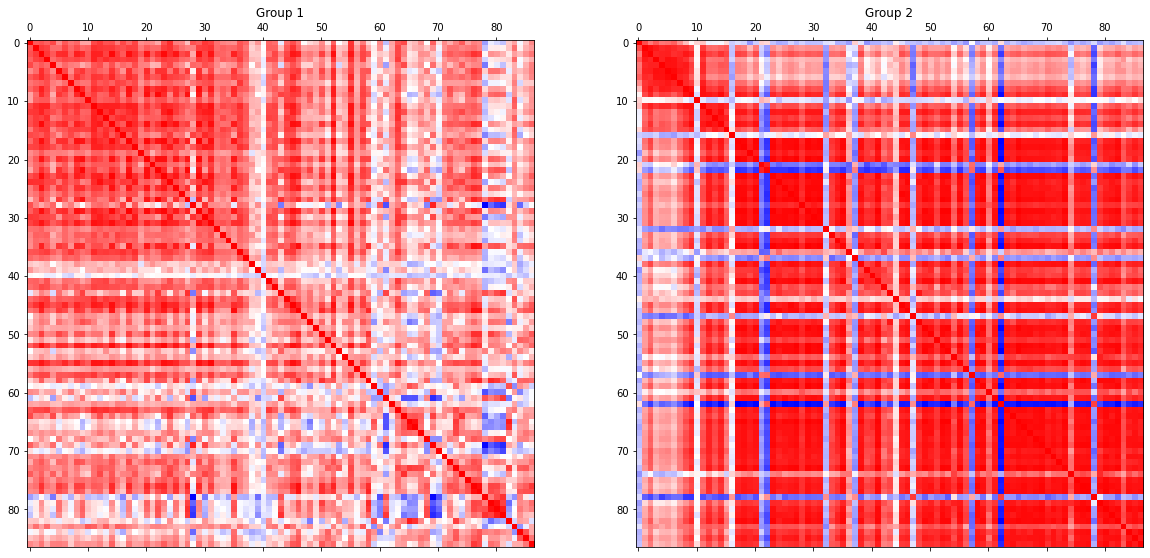

time: 603 ms (started: 2022-12-10 11:42:51 -05:00)


In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
axes[0].matshow(matrix_process1, cmap="bwr")
axes[0].set_title("Group 1")
axes[1].matshow(matrix_process2, cmap="bwr")
axes[1].set_title("Group 2")
""" axes[1][0].matshow(matrix_process1, cmap="bwr")
axes[1][0].set_title("Group 1")
axes[1][1].matshow(matrix_process2, cmap="bwr")
axes[1][1].set_title("Group 2") """

""" plt.figure(1, figsize=(30, 30))
plt.matshow(matrix, cmap="bwr")#, vmin=-1, vmax=1)
# plt.xticks(range(len(sdf.columns)), sdf.columns, rotation=90)
# plt.yticks(range(len(sdf.columns)), sdf.columns) """

### With weight

In [17]:
threshold = 0.5

edges_process1 = build_graph_weight(matrix_process1, threshold)
edges_process2 = build_graph_weight(matrix_process2, threshold)

time: 266 ms (started: 2022-12-10 11:42:52 -05:00)


In [18]:
G1 = nx.Graph()
G1.add_weighted_edges_from(edges_process1)

G2 = nx.Graph()
G2.add_weighted_edges_from(edges_process2)

time: 12.3 ms (started: 2022-12-10 11:42:52 -05:00)


In [19]:
degree_G1 = np.array(list(G1.degree()))
max_degree_G1 = degree_G1[degree_G1[:, 1].argsort()[-1]][0]

degree_G2 = np.array(list(G2.degree()))
max_degree_G2 = degree_G2[degree_G2[:, 1].argsort()[-1]][0]

max_degree_G1, max_degree_G2

('132.0303', '118.051')

time: 3.24 ms (started: 2022-12-10 11:42:52 -05:00)


In [20]:
# Change node id name for one graph
edges_process1_ = []
for edge in edges_process1:
  edges_process1_.append(["A" + edge[0], "A" + edge[1], edge[2]])

edges_process2_ = []
for edge in edges_process2:
  edges_process2_.append(["B" + edge[0], "B" + edge[1], edge[2]])

# Join
edges_process = edges_process1_ + edges_process2_
edges_process.append(["A" + max_degree_G1, "B" + max_degree_G2, 0.5])
edges_process[-5:]

[['B808.118', 'B664.117', 0.9159373783139187],
 ['B808.118', 'B665.2139', 0.6593035563737853],
 ['B808.118', 'B766.1076', 0.9639736271278809],
 ['B808.118', 'B784.1495', 0.8995832115739224],
 ['A132.0303', 'B118.051', 0.5]]

time: 7.87 ms (started: 2022-12-10 11:42:52 -05:00)


In [21]:
G = nx.Graph()
G.add_weighted_edges_from(edges_process)

time: 13.3 ms (started: 2022-12-10 11:42:52 -05:00)


Text(0.5, 1.0, 'Group 1 + Group 2')

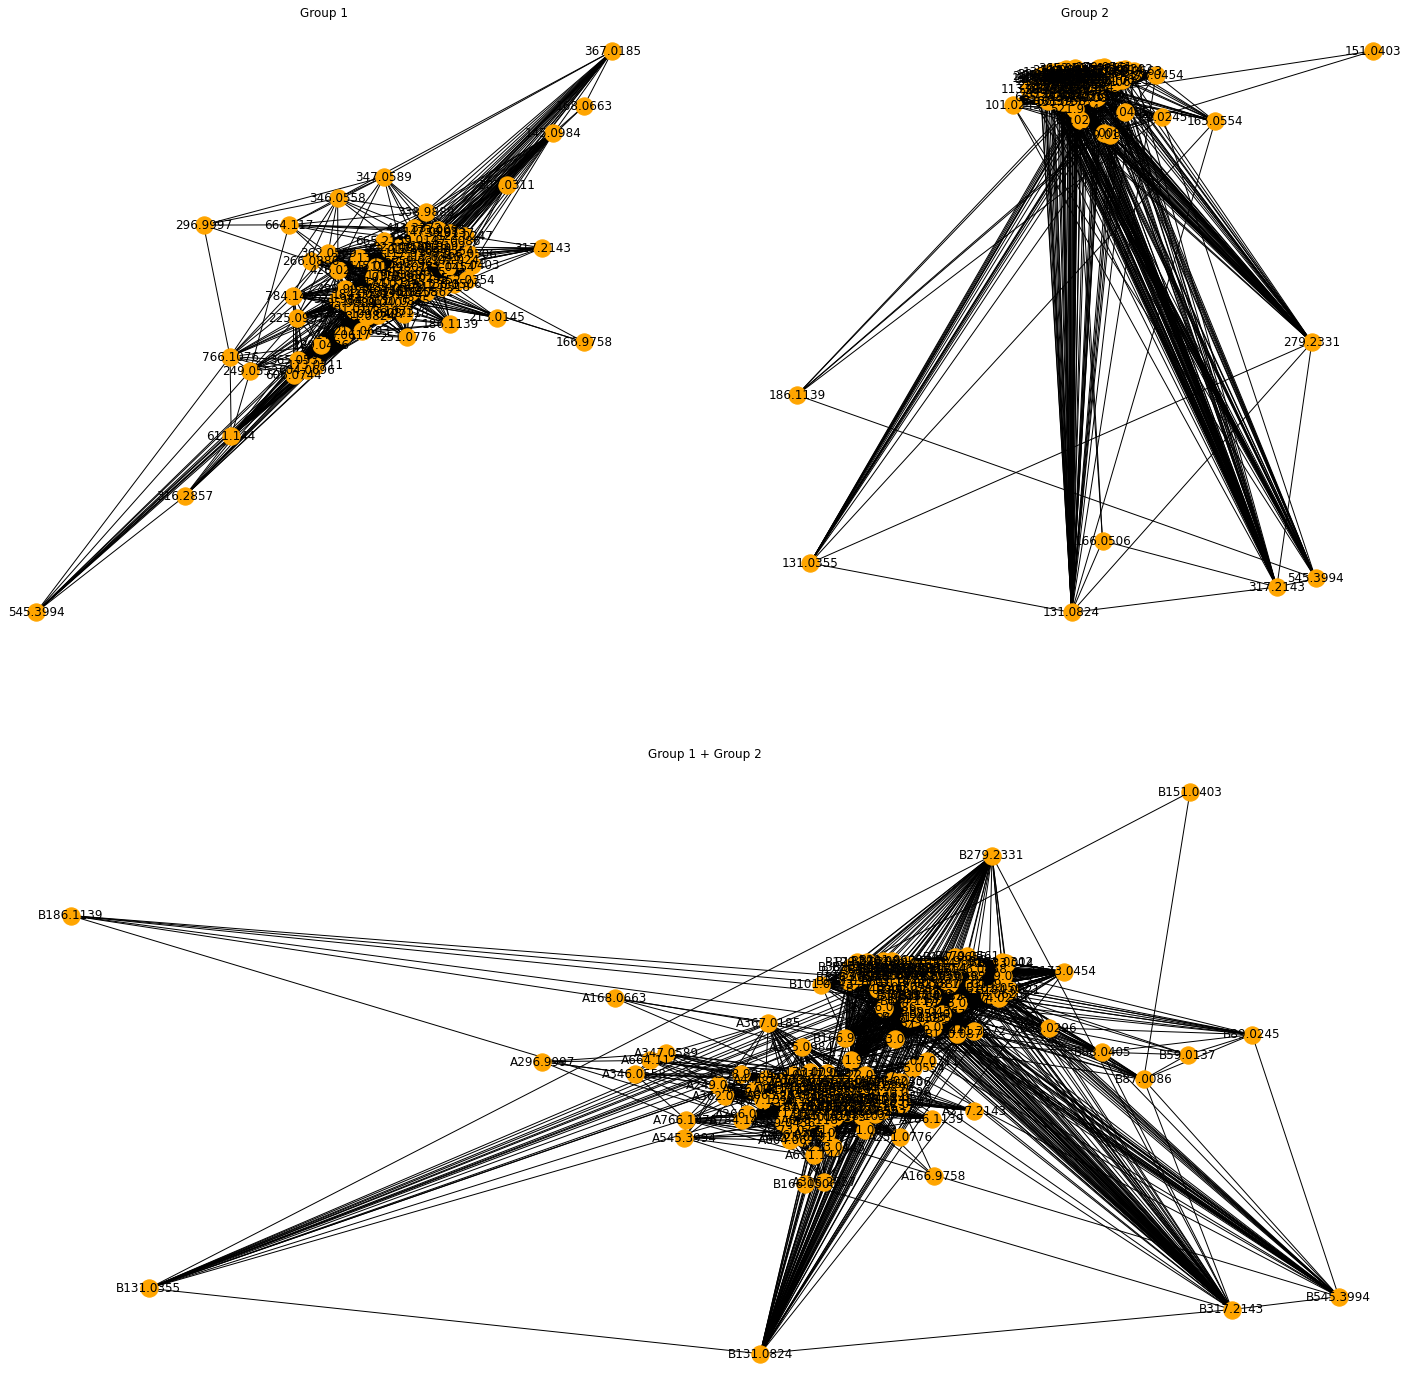

time: 1.82 s (started: 2022-12-10 11:42:53 -05:00)


In [22]:
# Plot graph
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 25))

gs = axes[1, 0].get_gridspec()
# create sub plots as grid
for ax in axes[1, :]:
    ax.remove()

pos = nx.spring_layout(G1)
nx.draw(G1, pos, with_labels=True, node_color="orange", ax=axes[0, 0])
axes[0, 0].set_title("Group 1")

pos = nx.spring_layout(G2)
nx.draw(G2, pos, with_labels=True, node_color="orange", ax=axes[0, 1])
axes[0, 1].set_title("Group 2")

axsbig = fig.add_subplot(gs[1, :])
nx.draw(G, pos=nx.spring_layout(G, iterations=12, seed=42), with_labels=True, node_color="orange", ax=axsbig)
axsbig.set_title("Group 1 + Group 2")

#### Info graph

In [109]:
print(nx.info(G1))
print(nx.info(G2))
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 85
Number of edges: 1867
Average degree:  43.9294
Name: 
Type: Graph
Number of nodes: 84
Number of edges: 2537
Average degree:  60.4048
Name: 
Type: Graph
Number of nodes: 169
Number of edges: 4405
Average degree:  52.1302
time: 1.39 ms (started: 2022-12-10 00:45:40 -05:00)


Name: 
Type: Graph
Number of nodes: 85
Number of edges: 1867
Average degree:  43.9294
43.92941176470588


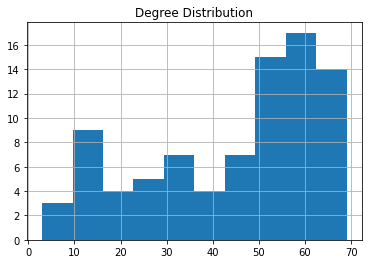

time: 143 ms (started: 2022-12-10 00:45:45 -05:00)


In [110]:
# info_graph(G1)
print(nx.info(G1))
print(np.mean(list(dict(G1.degree()).values())))

plt.clf()
plt.hist(list(dict(G1.degree()).values()))
plt.title("Degree Distribution")
plt.grid()
plt.show()

Name: 
Type: Graph
Number of nodes: 84
Number of edges: 2537
Average degree:  60.4048
60.404761904761905


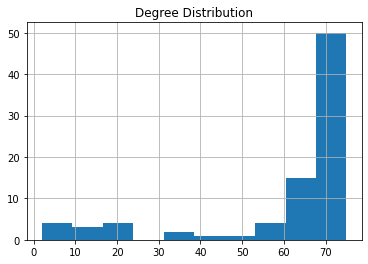

time: 140 ms (started: 2022-12-10 00:45:49 -05:00)


In [111]:
# info_graph(G2)

print(nx.info(G2))
print(np.mean(list(dict(G2.degree()).values())))

plt.clf()
plt.hist(list(dict(G2.degree()).values()))
plt.title("Degree Distribution")
plt.grid()
plt.show()

Name: 
Type: Graph
Number of nodes: 169
Number of edges: 4405
Average degree:  52.1302
52.1301775147929


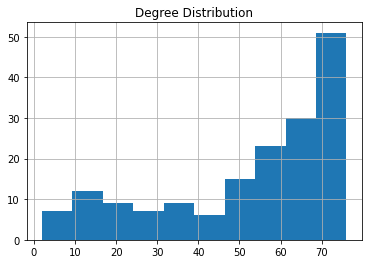

time: 145 ms (started: 2022-12-10 00:45:52 -05:00)


In [112]:
# info_graph(G)

print(nx.info(G))
print(np.mean(list(dict(G.degree()).values())))

plt.clf()
plt.hist(list(dict(G.degree()).values()))
plt.title("Degree Distribution")
plt.grid()
plt.show()

## Graph embedding, Stellar

#### Biased walks

In [ ]:
import random
from functools import partial
from typing import List, Callable

In [ ]:
from networkx.algorithms.shortest_paths import weighted
def _check_value(value, name):
    try:
        _ = 1 / value

    except ZeroDivisionError:
        raise ValueError(
            f"The value of {name} is too small " f"or zero to be used in 1/{name}."
        )


def _undirected(node, graph) -> List[tuple]:
    edges = graph.edges(node)

    return edges


def _directed(node, graph) -> List[tuple]:
    edges = graph.out_edges(node, data=True)

    return edges


def _get_edge_fn(graph) -> Callable:
    fn = _directed if nx.classes.function.is_directed(graph) else _undirected

    fn = partial(fn, graph=graph)
    return fn


def _unweighted(edges: List[tuple]) -> np.ndarray:
    return np.ones(len(edges))


def _weighted(edges: List[tuple]) -> np.ndarray:
    print(edges)
    weights = map(lambda edge: edge[-1]["weight"], edges)

    return np.array([*weights])


def _get_weight_fn(graph) -> Callable:
    fn = _weighted if nx.classes.function.is_weighted(graph) else _unweighted

    return fn


class BiasedRandomWalker:
    """
    Class to do biased second order random walks.
    Args:
        walk_length (int): Number of random walks.
        walk_number (int): Number of nodes in truncated walk.
        p (float): Return parameter (1/p transition probability) to move towards previous node.
        q (float): In-out parameter (1/q transition probability) to move away from previous node.
    """

    walks: list
    graph: nx.classes.graph.Graph
    edge_fn: Callable
    weight_fn: Callable

    def __init__(self, walk_length: int, walk_number: int, p: float, q: float):
        self.walk_length = walk_length
        self.walk_number = walk_number

        _check_value(p, "p")
        self.p = p

        _check_value(q, "q")
        self.q = q

    def do_walk(self, node: int) -> List[str]:
        """
        Doing a single truncated second order random walk from a source node.
        Arg types:
            * **node** *(int)* - The source node of the random walk.
        Return types:
            * **walk** *(list of strings)* - A single truncated random walk.
        """
        walk = [node]
        previous_node = None
        previous_node_neighbors = []
        for _ in range(self.walk_length - 1):
            current_node = walk[-1]
            edges = self.edge_fn(current_node)
            # print(edges)
            current_node_neighbors = np.array([edge[1] for edge in edges])

            weights = []
            for item in edges:
              weights.append(self.graph.get_edge_data(*item)["weight"])
            
            # weights = list(self.graph.edges(data=True)) # self.weight_fn(edges)

            # print("weights", weights)
            probability = np.piecewise(
                weights,
                [
                    current_node_neighbors == previous_node,
                    np.isin(current_node_neighbors, previous_node_neighbors),
                ],
                [lambda w: w / self.p, lambda w: w / 1, lambda w: w / self.q],
            )
            # print("probability", probability)
            probability = abs(probability)
            # print("probability", probability)
            # print("sum(probability)", sum(probability))
            norm_probability = probability / sum(probability)
            # print("norm_probability", norm_probability)
            # print("current_node_neighbors", current_node_neighbors)
            selected = np.random.choice(current_node_neighbors, 1, p=norm_probability)[0]
            # print("selected", selected)
            walk.append(selected)

            previous_node_neighbors = current_node_neighbors
            previous_node = current_node

        walk = [str(w) for w in walk]
        return walk

    def do_walks(self, graph):
        """
        Doing a fixed number of truncated random walk from every node in the graph.
        Arg types:
            * **graph** *(NetworkX graph)* - The graph to run the random walks on.
        """
        self.walks = []
        self.graph = graph

        self.edge_fn = _get_edge_fn(graph)
        self.weight_fn = _get_weight_fn(graph)

        for node in self.graph.nodes():
            for _ in range(self.walk_number):
                walk_from_node = self.do_walk(node)
                self.walks.append(walk_from_node)
        return self.walks

#### Deepwalk

In [ ]:
# Parameters
length = 16 # maximum length of a random walk
n = 16 # number of random walks per root node

In [ ]:
Gs1 = StellarGraph.from_networkx(G1)
rw = UniformRandomWalk(Gs1)

walk_paths1 = rw.run(
    nodes=list(Gs1.nodes()),  # root nodes
    length=length,  # maximum length of a random walk
    n=n,  # number of random walks per root node
    seed=42 #  random number generator seed; default is None
)
print("Number of random walks: {}".format(len(walk_paths1)))
# walk_paths1[:10]

In [ ]:
Gs2 = StellarGraph.from_networkx(G2)
rw = UniformRandomWalk(Gs2)

walk_paths2 = rw.run(
    nodes=list(Gs2.nodes()),  # root nodes
    length=length,  # maximum length of a random walk
    n=n,  # number of random walks per root node
    seed=42 #  random number generator seed; default is None
)
print("Number of random walks: {}".format(len(walk_paths2)))
# walk_paths2[:5]

In [ ]:
Gs3 = StellarGraph.from_networkx(G3)
rw = UniformRandomWalk(Gs3)

walk_paths3 = rw.run(
    nodes=list(Gs3.nodes()),  # root nodes
    length=length,  # maximum length of a random walk
    n=n,  # number of random walks per root node
    seed=42 #  random number generator seed; default is None
)
print("Number of random walks: {}".format(len(walk_paths3)))
# walk_paths3[:10]

In [ ]:
Gs4 = StellarGraph.from_networkx(G4)
rw = UniformRandomWalk(Gs4)

walk_paths4 = rw.run(
    nodes=list(Gs4.nodes()),  # root nodes
    length=length,  # maximum length of a random walk
    n=n,  # number of random walks per root node
    seed=42 #  random number generator seed; default is None
)
print("Number of random walks: {}".format(len(walk_paths4)))
# walk_paths4[:10]

#### Node2vec

In [ ]:
# Parameters
length = 32 # maximum length of a random walk
n = 32 # number of random walks per root node
p = 1.0 # 1.0 # 1.0 # 0.5 # Defines (unormalised) probability, 1/p, of returning to source node
q = 2.0 # 2.0 # 0.5 # 2.0 # Defines (unormalised) probability, 1/q, for moving away from source node

In [ ]:
Gs1 = StellarGraph.from_networkx(G1)
rw = BiasedRandomWalk(Gs1)

walk_paths1 = rw.run(
    nodes=Gs1.nodes(),  # root nodes
    length=length,  # maximum length of a random walk
    n=n,  # number of random walks per root node
    p=p,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=q,  # Defines (unormalised) probability, 1/q, for moving away from source node
    weighted=True,  # for weighted random walks
    seed=42  #  random number generator seed; default is None
)
print("Number of random walks: {}".format(len(walk_paths1)))
# walk_paths1[:1]

In [ ]:
Gs2 = StellarGraph.from_networkx(G2)
rw = BiasedRandomWalk(Gs2)

walk_paths2 = rw.run(
    nodes=Gs2.nodes(),  # root nodes
    length=length,  # maximum length of a random walk
    n=n,  # number of random walks per root node
    p=p,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=q,  # Defines (unormalised) probability, 1/q, for moving away from source node
    weighted=True,  # for weighted random walks
    seed=42  #  random number generator seed; default is None
)
print("Number of random walks: {}".format(len(walk_paths2)))
# walk_paths2[:10]

In [ ]:
""" Gs3 = StellarGraph.from_networkx(G3)
rw = BiasedRandomWalk(Gs3)

walk_paths3 = rw.run(
    nodes=Gs3.nodes(),  # root nodes
    length=length,  # maximum length of a random walk
    n=n,  # number of random walks per root node
    p=p,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=q,  # Defines (unormalised) probability, 1/q, for moving away from source node
    weighted=True,  # for weighted random walks
    seed=42  #  random number generator seed; default is None
)
print("Number of random walks: {}".format(len(walk_paths3)))
# walk_paths3[:10] """

In [ ]:
""" Gs4 = StellarGraph.from_networkx(G4)
rw = BiasedRandomWalk(Gs4)

walk_paths4 = rw.run(
    nodes=Gs4.nodes(),  # root nodes
    length=length,  # maximum length of a random walk
    n=n,  # number of random walks per root node
    p=p,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=q,  # Defines (unormalised) probability, 1/q, for moving away from source node
    weighted=True,  # for weighted random walks
    seed=42  #  random number generator seed; default is None
)
print("Number of random walks: {}".format(len(walk_paths4)))
# walk_paths4[:10] """

##### Random walks biased

In [ ]:
rw1 = BiasedRandomWalker(walk_length=length, walk_number=n, p=p, q=q)
walk_paths1 = rw1.do_walks(G1)

In [ ]:
rw2 = BiasedRandomWalker(walk_length=length, walk_number=n, p=p, q=q)
walk_paths2 = rw1.do_walks(G2)

In [ ]:
rw3 = BiasedRandomWalker(walk_length=length, walk_number=n, p=p, q=q)
walk_paths3 = rw1.do_walks(G3)

In [ ]:
rw4 = BiasedRandomWalker(walk_length=length, walk_number=n, p=p, q=q)
walk_paths4 = rw1.do_walks(G4)

#### Word2vec

In [ ]:
# Train
size = 32
walk_paths1 = [[str(n) for n in walk] for walk in walk_paths1]
model1 = Word2Vec(sentences=walk_paths1, vector_size=size, window=5, min_count=0,
                  seed=42, workers=2, sg=1, hs=0, epochs=20)
print(model1)

walk_paths2 = [[str(n) for n in walk] for walk in walk_paths2]
model2 = Word2Vec(sentences=walk_paths2, vector_size=size, window=5, min_count=0,
                  seed=42, workers=2, sg=1, hs=0, epochs=20)
print(model2)

""" walk_paths3 = [[str(n) for n in walk] for walk in walk_paths3]
model3 = Word2Vec(sentences=walk_paths3, vector_size=size, window=5, min_count=0,
                  seed=42, workers=2, sg=1, hs=0, epochs=20)
print(model3)

walk_paths4 = [[str(n) for n in walk] for walk in walk_paths4]
model4 = Word2Vec(sentences=walk_paths4, vector_size=size, window=5, min_count=0,
                  seed=42, workers=2, sg=1, hs=0, epochs=20)
print(model4) """

In [ ]:
# Get embedding
node_ids1 = model1.wv.index_to_key  # list of node IDs
node_embeddings1 = pd.DataFrame(model1.wv.vectors, index=node_ids1)
print(node_embeddings1.shape)
node_embeddings1.head()

In [ ]:
# Get embedding
node_ids2 = model2.wv.index_to_key  # list of node IDs
node_embeddings2 = pd.DataFrame(model2.wv.vectors, index=node_ids2)
print(node_embeddings2.shape)
node_embeddings2.head()

In [ ]:
""" # Get embedding
node_ids3 = model3.wv.index_to_key  # list of node IDs
node_embeddings3 = pd.DataFrame(model3.wv.vectors, index=node_ids3)
print(node_embeddings3.shape)
node_embeddings3.head() """

In [ ]:
""" # Get embedding
node_ids4 = model4.wv.index_to_key  # list of node IDs
node_embeddings4 = pd.DataFrame(model4.wv.vectors, index=node_ids4)
print(node_embeddings4.shape)
node_embeddings4.head() """



---

##### Test similarity

In [ ]:
# sims = model1.wv.most_similar('288', topn=10)  # get other similar words
# sims

In [ ]:
node_id = "259.0227"

In [ ]:
model4.wv.get_vector(node_id, norm=False)

In [ ]:
model4.wv.get_normed_vectors()

In [ ]:
model4.wv.get_vector(node_id, norm=True)

In [ ]:
model4.wv.key_to_index[node_id]

In [ ]:
x = model4.wv.get_vector("154.062", norm=False)
y = model4.wv.get_vector("128.0355", norm=False)

print(x.shape)
print(y.shape)

In [ ]:
x

In [ ]:
y

In [ ]:
# Get similarity
model4.wv.similarity("154.062", "128.0355")

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([x], [y])

In [ ]:
from sklearn.metrics.pairwise import pairwise_kernels

pairwise_kernels([x], [y], metric="cosine")

In [ ]:
# Save
node_embeddings1.to_csv("{}/Outputs/MatrixEmbedding/node_embeddings1_05.csv".format(dir), index=True)
node_embeddings2.to_csv("{}/Outputs/MatrixEmbedding/node_embeddings2_05.csv".format(dir), index=True)
node_embeddings3.to_csv("{}/Outputs/MatrixEmbedding/node_embeddings3_05.csv".format(dir), index=True)
node_embeddings4.to_csv("{}/Outputs/MatrixEmbedding/node_embeddings4_05.csv".format(dir), index=True)

In [ ]:
# Read
""" node_embeddings1 = pd.read_csv("{}/Outputs/MatrixEmbedding/node_embeddings1.csv".format(dir), index_col="Unnamed: 0")
node_embeddings2 = pd.read_csv("{}/Outputs/MatrixEmbedding/node_embeddings2.csv".format(dir), index_col="Unnamed: 0")
node_embeddings3 = pd.read_csv("{}/Outputs/MatrixEmbedding/node_embeddings3.csv".format(dir), index_col="Unnamed: 0")
node_embeddings4 = pd.read_csv("{}/Outputs/MatrixEmbedding/node_embeddings4.csv".format(dir), index_col="Unnamed: 0") """

##### Draw embeddings

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.density_heatmap(node_embeddings1, title="No color bar on this density plot")

fig.update_layout(coloraxis_showscale=False)

fig.show()

In [ ]:
df = px.data.tips()
fig = px.density_heatmap(node_embeddings2, title="No color bar on this density plot")

fig.update_layout(coloraxis_showscale=False)

fig.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

fig = make_subplots(1, 2, horizontal_spacing=0.15)
fig.add_trace(go.Heatmap(z=node_embeddings1,
                         x=node_embeddings1.columns,
                         y=node_embeddings1.index,
                         coloraxis="coloraxis"), 1, 1)
fig.add_trace(go.Heatmap(z=node_embeddings2,
                         x=node_embeddings2.columns,
                         y=node_embeddings2.index,
                         coloraxis="coloraxis"), 1, 2)

fig.update_layout(width=1000, height=800, title_text="Embeddings Matrix",
                  showlegend=False, coloraxis={"colorscale": "Rainbow"})
fig.update_xaxes(side="top")
fig.show()

In [ ]:
# sns.heatmap(node_embeddings1, annot=True)

import plotly.express as px
fig = px.imshow(node_embeddings1.values,
                text_auto=False, 
                x=node_embeddings1.columns.values,
                y=node_embeddings1.index,
                color_continuous_scale="Rainbow")
fig.layout.height = 700
fig.layout.width = 700
fig.update_xaxes(side="top")
fig.show()

In [ ]:
fig = px.imshow(node_embeddings2.values,
                text_auto=False, 
                x=node_embeddings2.columns.values,
                y=node_embeddings2.index,
                color_continuous_scale="Rainbow")
fig.layout.height = 700
fig.layout.width = 700
fig.update_xaxes(side="top")
fig.show()

## Graph embedding, Shenweichen

In [113]:
import tensorflow as tf
print(tf.__version__)

1.14.0
time: 1.13 ms (started: 2022-12-10 00:46:00 -05:00)


In [114]:
import numpy
numpy.version.version

'1.19.5'

time: 2.66 ms (started: 2022-12-10 00:46:02 -05:00)


In [23]:
# Parameters
length = 32 # maximum length of a random walk
n = 32 # number of random walks per root node
p = 1.0 # 1.0 # 1.0 # 0.5 # Defines (unormalised) probability, 1/p, of returning to source node
q = 2.0 # 2.0 # 0.5 # 2.0 # Defines (unormalised) probability, 1/q, for moving away from source node
size = 32
epochs = 100

time: 1.1 ms (started: 2022-12-10 11:42:54 -05:00)


#### DeepWalk

In [ ]:
model1 = DeepWalk(G1, walk_length=length, num_walks=n, workers=1)
model1.train(embed_size=size, window_size=5, iter=epochs)
node_embeddings1 = model1.get_embeddings()
node_embeddings1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Learning embedding vectors...
Learning embedding vectors done!


0         1         2         3         4         5   \
135.0311 -0.146420 -0.054914 -0.054503 -0.013412  0.055946  0.104107   
173.0711 -0.109981 -0.053183  0.184933 -0.022493  0.073011 -0.008277   
154.062  -0.315016 -0.277622  0.068644  0.073223 -0.070003  0.147556   
505.9889 -0.253110 -0.060392  0.048722 -0.089073  0.024017  0.055661   
132.0303 -0.135921 -0.302824  0.164848  0.030849  0.013374  0.102765   
...            ...       ...       ...       ...       ...       ...   
545.3994 -0.016961  0.011795  0.035740  0.092576 -0.045269  0.161786   
166.9758 -0.161404 -0.029137  0.250375  0.022753  0.175935  0.054399   
766.1076 -0.055221 -0.280647  0.082264 -0.034871 -0.251667 -0.089075   
131.0824 -0.402026 -0.025466  0.146894 -0.456354  0.132177 -0.050600   
346.0558 -0.047446  0.466355 -0.224824 -0.510492 -0.179523 -0.168428   

                6         7         8         9   ...        22        23  \
135.0311  0.180217  0.259498 -0.103874  0.000929  ...  0.189263  0.237890   
173.0711  0.147420  0.115088 -0.227009  0.102187  ... -0.013738  0.293330   
154.062   0.149815  0.172095 -0.266643  0.088495  ...  0.184283  0.123635   
505.9889  0.214078  0.017604 -0.156306  0.014258  ...  0.243227  0.256761   
132.0303 -0.031866  0.288507 -0.102826 -0.082251  ...  0.010315  0.246984   
...            ...       ...       ...       ...  ...       ...       ...   
545.3994  0.080061  0.079012 -0.234756  0.170584  ...  0.154047  0.065405   
166.9758  0.175968  0.252101  0.017478 -0.001567  ...  0.025208  0.046754   
766.1076 -0.120415  0.011877 -0.387440 -0.014049  ... -0.200951  0.102073   
131.0824 -0.113343  0.053205 -0.208273  0.230635  ... -0.233780  0.323681   
346.0558  0.283761  0.345324  0.202563  0.130228  ...  0.329633  0.001950   

                24        25        26        27        28        29  \
135.0311 -0.083084  0.032653 -0.107553  0.024162 -0.024683 -0.137341   
173.0711  0.183240  0.141473 -0.054713  0.046591  0.179880 -0.099947   
154.062   0.101641  0.001874 -0.140379 -0.213369  0.034534 -0.113997   
505.9889 -0.021669  0.004006 -0.236599  0.065904  0.045357 -0.026963   
132.0303 -0.034282 -0.052481 -0.192310 -0.110345  0.014385 -0.008117   
...            ...       ...       ...       ...       ...       ...   
545.3994  0.108135 -0.078854  0.005311 -0.148287 -0.025562 -0.093487   
166.9758  0.058183  0.205927  0.060098 -0.135596  0.159358  0.084324   
766.1076  0.246658  0.297495 -0.214608  0.230432  0.301542 -0.569576   
131.0824 -0.121073 -0.213318  0.339509 -0.615873  0.846932 -0.197334   
346.0558 -0.153947  0.327426 -0.605956  0.561500  0.300041  0.061175   

                30        31  
135.0311 -0.000747  0.142922  
173.0711 -0.071552  0.026625  
154.062  -0.198544  0.024236  
505.9889  0.025552  0.173279  
132.0303 -0.200227  0.141776  
...            ...       ...  
545.3994  0.257553  0.290858  
166.9758 -0.040396 -0.090246  
766.1076  0.296117  0.318002  
131.0824  0.198297 -0.261687  
346.0558  0.110891  0.570919  

[86 rows x 32 columns]

time: 5.69 s (started: 2022-11-08 18:53:13 +00:00)


In [ ]:
model2 = DeepWalk(G2, walk_length=length, num_walks=n, workers=1)
model2.train(embed_size=size, window_size=5, iter=epochs)
node_embeddings2 = model2.get_embeddings()
node_embeddings2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Learning embedding vectors...
Learning embedding vectors done!


0         1         2         3         4         5   \
113.0246 -0.146646 -0.020410 -0.016870  0.004637  0.021232 -0.218920   
604.0696 -0.173414 -0.154125 -0.018251  0.088511  0.003073  0.023720   
441.3372 -0.024094 -0.006499  0.175709  0.061618  0.031999 -0.092571   
118.051  -0.074539 -0.276850  0.126049  0.055173  0.044025 -0.074333   
784.1495 -0.011439 -0.254102  0.008813 -0.146008  0.062759  0.026554   
...            ...       ...       ...       ...       ...       ...   
218.1033  0.085972 -0.026072  0.166445  0.116953  0.031735 -0.051953   
112.0518 -0.234938 -0.161839 -0.005393  0.135369 -0.060316 -0.204938   
346.0558  0.066295 -0.087852 -0.008902  0.225113  0.160622 -0.199053   
145.0984  0.099841  0.019422  0.107820  0.268786  0.140502 -0.027360   
131.0824 -0.356701  0.047195 -0.131632  0.249104  0.240628 -0.271639   

                6         7         8         9   ...        22        23  \
113.0246  0.138293  0.122715 -0.029775  0.057123  ...  0.138397 -0.060447   
604.0696  0.083800  0.236287 -0.158464 -0.081126  ...  0.253251 -0.032719   
441.3372  0.007125 -0.012443  0.032772 -0.081685  ...  0.237980  0.052401   
118.051   0.126182  0.163086 -0.047820  0.072042  ...  0.170008 -0.007513   
784.1495  0.197973  0.015648 -0.147112  0.060646  ...  0.211840  0.089949   
...            ...       ...       ...       ...  ...       ...       ...   
218.1033  0.029683  0.141785  0.049228 -0.018201  ...  0.368561 -0.034754   
112.0518  0.473965  0.238714 -0.130683  0.163877  ...  0.180970  0.086366   
346.0558  0.154896  0.160004 -0.083338  0.063435  ...  0.000056  0.019531   
145.0984  0.146270  0.213556 -0.179799  0.032471  ...  0.280396 -0.222472   
131.0824  0.179020  0.645450  0.670615 -0.837862  ...  0.199389 -0.626090   

                24        25        26        27        28        29  \
113.0246 -0.199349  0.072979 -0.188454 -0.048555 -0.010854 -0.074452   
604.0696  0.049322 -0.111994 -0.086167  0.023657  0.099567 -0.059211   
441.3372  0.038925  0.075152 -0.053616  0.096607  0.146497 -0.083949   
118.051  -0.061620 -0.076177 -0.141606  0.018625  0.014411 -0.222777   
784.1495 -0.009796 -0.069646 -0.257688  0.083228  0.037429 -0.087930   
...            ...       ...       ...       ...       ...       ...   
218.1033  0.058541  0.053484 -0.090655 -0.026798 -0.051804 -0.134038   
112.0518 -0.039641  0.185021 -0.326965 -0.028240 -0.005882 -0.232078   
346.0558  0.137488 -0.045124 -0.289881 -0.061145 -0.008266 -0.266550   
145.0984  0.036182  0.178447 -0.119986 -0.036877  0.105765  0.039598   
131.0824 -0.732082  0.646072 -0.197112  0.537062  0.905217 -0.015416   

                30        31  
113.0246 -0.057748  0.203431  
604.0696 -0.130537  0.139653  
441.3372 -0.170597  0.110987  
118.051  -0.030762  0.138276  
784.1495  0.046647  0.159771  
...            ...       ...  
218.1033 -0.050440  0.041641  
112.0518 -0.180100  0.184548  
346.0558 -0.146519  0.327470  
145.0984  0.044298  0.156541  
131.0824  0.446511 -0.223867  

[86 rows x 32 columns]

time: 5.14 s (started: 2022-11-08 18:53:19 +00:00)


In [ ]:
model = DeepWalk(G, walk_length=length, num_walks=n, workers=1)
model.train(embed_size=size, window_size=5, iter=epochs)
node_embeddings = model.get_embeddings()
node_embeddings

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


Learning embedding vectors...
Learning embedding vectors done!


0         1         2         3         4         5   \
A259.0227  0.467595 -0.198633  0.206822 -0.120296  0.280994 -0.307601   
A173.0454  0.283833 -0.050627  0.320102  0.004206  0.213313 -0.304769   
A152.0354  0.505562  0.006986  0.307342 -0.100113  0.338077 -0.264633   
A604.0696  0.345890 -0.092589  0.100046 -0.129252  0.274515 -0.205268   
A365.0531  0.359423 -0.025166  0.260977 -0.263760  0.348631 -0.250341   
...             ...       ...       ...       ...       ...       ...   
A545.3994  0.511373  0.281628  0.455894 -0.095456  0.085013 -0.475304   
A766.1076  1.095279 -0.319390  0.559328 -0.215232  0.300488 -0.428346   
A131.0824  0.404838 -0.939931  0.090138  0.901990 -0.005401 -0.773719   
A346.0558  0.866347  0.104562 -0.234585 -0.301606  0.245479 -0.658468   
B131.0824  1.621438 -0.272770 -0.423054 -0.176281 -0.599126 -0.938524   

                 6         7         8         9   ...        22        23  \
A259.0227  0.579352  0.211806 -0.519395 -0.067671  ...  0.604978 -0.161608   
A173.0454  0.478291  0.290792 -0.476360  0.124684  ...  0.604805 -0.014807   
A152.0354  0.558783  0.040658 -0.391049  0.112476  ...  0.465609  0.074196   
A604.0696  0.531171  0.150331 -0.564928 -0.126393  ...  0.496703 -0.197490   
A365.0531  0.520291  0.165484 -0.443374  0.040596  ...  0.622219 -0.050958   
...             ...       ...       ...       ...  ...       ...       ...   
A545.3994  0.381172  0.305206 -0.716523  0.338219  ...  0.528865  0.280551   
A766.1076  0.098286  0.701789 -0.691615 -0.154804  ...  0.330188  0.189072   
A131.0824  0.328486 -0.544919 -0.166846 -0.098204  ...  0.749153 -0.185186   
A346.0558  0.429683  0.904982  0.502859 -0.287144  ... -0.039392  0.450282   
B131.0824 -0.467798 -0.199126  0.608333 -0.724498  ...  0.087669 -0.026653   

                 24        25        26        27        28        29  \
A259.0227  0.374980  0.053314 -0.433186  0.138975 -0.083277 -0.384384   
A173.0454  0.369185  0.394029 -0.653452  0.127137  0.052058 -0.411285   
A152.0354  0.353510  0.371447 -0.561226  0.161826  0.031761 -0.353961   
A604.0696  0.140471  0.236628 -0.787836  0.030676  0.109531 -0.498251   
A365.0531 -0.039106  0.321941 -0.765194 -0.045816  0.025381 -0.433959   
...             ...       ...       ...       ...       ...       ...   
A545.3994  0.259803  0.256854 -0.892485 -0.142622  0.065119 -0.285785   
A766.1076  0.393072 -0.137778 -0.431310 -0.227461 -0.434368 -0.104200   
A131.0824  0.255520  0.328814 -0.665946 -0.387186 -0.669554 -0.526116   
A346.0558  0.114340 -0.273059 -1.145400  0.390155 -0.007396 -0.648829   
B131.0824 -0.576464  0.096225 -0.684017  0.328446 -0.085867  0.399948   

                 30        31  
A259.0227 -0.094289  0.199505  
A173.0454  0.001437  0.333232  
A152.0354  0.188265  0.255689  
A604.0696  0.114143  0.402414  
A365.0531  0.253591  0.378270  
...             ...       ...  
A545.3994  0.200986  0.025796  
A766.1076  0.276059  0.235122  
A131.0824  0.471832  0.953045  
A346.0558  0.134801  0.979658  
B131.0824 -0.303367  0.683732  

[172 rows x 32 columns]

time: 11 s (started: 2022-11-08 18:53:24 +00:00)


#### LINE

In [ ]:
model1 = LINE(G1, embedding_size=size, order="second") # init model,order can be ['first','second','all']
model1.train(batch_size=1024, epochs=epochs, verbose=0)
node_embeddings1 = model1.get_embeddings()
node_embeddings1

0         1         2         3         4         5   \
59.0137   0.193940 -0.184734  0.242717  0.220617 -0.219477 -0.223877   
71.0139   0.257739 -0.192060  0.177808  0.258165 -0.240190 -0.201369   
74.0249   0.237094 -0.231708  0.221094  0.235250 -0.235488 -0.233390   
85.0296   0.226524 -0.241395  0.270830  0.191593 -0.244473 -0.267906   
87.0086   0.247149 -0.199726  0.175906  0.265180 -0.206204 -0.247805   
...            ...       ...       ...       ...       ...       ...   
186.1139  0.041477  0.039894 -0.022404  0.013145 -0.013888  0.013905   
808.118   0.268870 -0.233295  0.207649  0.287358 -0.287342 -0.235136   
766.1076  0.147994 -0.181669  0.229599  0.174460 -0.208637 -0.243636   
131.0824 -0.034968  0.045315 -0.026183  0.017335  0.036373 -0.005983   
346.0558 -0.008530  0.048031  0.000156  0.003299 -0.021267  0.021646   

                6         7         8         9   ...        22        23  \
59.0137   0.256849 -0.237269  0.241372  0.236809  ... -0.242489 -0.199458   
71.0139   0.260320 -0.192495  0.215474  0.248031  ... -0.191665 -0.208513   
74.0249   0.249641 -0.232131  0.256648  0.234679  ... -0.228256 -0.258997   
85.0296   0.237777 -0.194294  0.214518  0.188303  ... -0.266230 -0.191617   
87.0086   0.189276 -0.234746  0.269215  0.184931  ... -0.267547 -0.267556   
...            ...       ...       ...       ...  ...       ...       ...   
186.1139 -0.003012  0.004105 -0.036246  0.030530  ...  0.008260 -0.009106   
808.118   0.302624 -0.190042  0.278206  0.236449  ... -0.275154 -0.230260   
766.1076  0.180650 -0.215498  0.237137  0.222102  ... -0.215068 -0.193341   
131.0824 -0.029724 -0.021963 -0.027294 -0.043943  ...  0.003484  0.033406   
346.0558 -0.032309  0.017623  0.011741  0.028556  ... -0.044258  0.043777   

                24        25        26        27        28        29  \
59.0137   0.243945  0.252169 -0.230011 -0.216191  0.247656  0.186458   
71.0139   0.262082  0.229638 -0.205712 -0.204320  0.203992  0.230286   
74.0249   0.201864  0.232874 -0.168501 -0.259025  0.193020  0.191698   
85.0296   0.220612  0.205342 -0.192323 -0.223615  0.237260  0.211250   
87.0086   0.225563  0.208267 -0.255132 -0.236796  0.249026  0.250407   
...            ...       ...       ...       ...       ...       ...   
186.1139  0.011170 -0.034251 -0.037124  0.044011 -0.043113 -0.047739   
808.118   0.317337  0.288098 -0.226455 -0.243080  0.250494  0.221756   
766.1076  0.209744  0.136561 -0.218683 -0.131463  0.219144  0.142008   
131.0824  0.010111 -0.031617  0.038827 -0.032558 -0.026866 -0.036394   
346.0558 -0.005483  0.007468 -0.016249 -0.010240  0.004077  0.037119   

                30        31  
59.0137   0.250212  0.254574  
71.0139   0.256675  0.260927  
74.0249   0.240695  0.188987  
85.0296   0.266620  0.176918  
87.0086   0.276454  0.261568  
...            ...       ...  
186.1139  0.033220  0.046712  
808.118   0.216289  0.227958  
766.1076  0.191822  0.158337  
131.0824  0.042541  0.036615  
346.0558  0.042641  0.049534  

[86 rows x 32 columns]

time: 2.12 s (started: 2022-11-11 13:51:17 +00:00)


In [ ]:
model2 = LINE(G2, embedding_size=size, order="second") # init model,order can be ['first','second','all']
model2.train(batch_size=1024, epochs=epochs, verbose=0)
node_embeddings2 = model2.get_embeddings()
node_embeddings2

0         1         2         3         4         5   \
59.0137  -0.171214 -0.208583 -0.204661 -0.226419  0.176741  0.189368   
71.0139  -0.236094 -0.212339 -0.195376 -0.203947  0.256726  0.271177   
74.0249  -0.189968 -0.209089 -0.253446 -0.277572  0.219644  0.268384   
85.0296  -0.178420 -0.246091 -0.182928 -0.264821  0.273955  0.192068   
87.0086  -0.261828 -0.220197 -0.210048 -0.221900  0.241557  0.228985   
...            ...       ...       ...       ...       ...       ...   
186.1139 -0.257708 -0.315877 -0.331900 -0.310361  0.348512  0.302694   
316.2857 -0.286928 -0.251508 -0.232382 -0.295974  0.245064  0.234487   
545.3994 -0.190661 -0.188077 -0.217485 -0.201387  0.167193  0.218468   
611.144   0.015816 -0.037391  0.009745  0.002873  0.040010  0.042700   
131.0824  0.046496  0.014895  0.012345 -0.044604  0.046911  0.017529   

                6         7         8         9   ...        22        23  \
59.0137  -0.180488  0.220515 -0.249295 -0.187785  ... -0.206207  0.181663   
71.0139  -0.249247  0.249045 -0.254327 -0.204203  ... -0.232126  0.181028   
74.0249  -0.165310  0.241152 -0.266829 -0.237660  ... -0.187937  0.206518   
85.0296  -0.259385  0.194407 -0.225273 -0.266296  ... -0.182730  0.177699   
87.0086  -0.242968  0.248468 -0.250263 -0.266630  ... -0.258216  0.240034   
...            ...       ...       ...       ...  ...       ...       ...   
186.1139 -0.302210  0.212290 -0.272383 -0.284586  ... -0.360230  0.216066   
316.2857 -0.293726  0.205120 -0.274224 -0.235754  ... -0.309034  0.181758   
545.3994 -0.165304  0.171319 -0.227593 -0.141426  ... -0.162777  0.202632   
611.144  -0.042584 -0.038096 -0.011946 -0.024104  ... -0.048208  0.045978   
131.0824 -0.029290  0.019891  0.002644  0.038120  ...  0.039575 -0.032984   

                24        25        26        27        28        29  \
59.0137  -0.209497  0.172339 -0.217914  0.171848 -0.260924 -0.235876   
71.0139  -0.247402  0.148331 -0.249274  0.216953 -0.247555 -0.257944   
74.0249  -0.244414  0.144219 -0.264324  0.215004 -0.198576 -0.228206   
85.0296  -0.256896  0.214612 -0.249284  0.209338 -0.202160 -0.269794   
87.0086  -0.236573  0.197628 -0.172721  0.234943 -0.210602 -0.245915   
...            ...       ...       ...       ...       ...       ...   
186.1139 -0.297677  0.257248 -0.365430  0.288157 -0.352474 -0.358446   
316.2857 -0.265930  0.243531 -0.303955  0.214793 -0.282307 -0.282985   
545.3994 -0.237294  0.221253 -0.264417  0.170178 -0.222607 -0.199925   
611.144  -0.027968 -0.022217  0.031732  0.018144  0.003632 -0.041924   
131.0824 -0.032804  0.023631  0.001588  0.020859 -0.011730 -0.023471   

                30        31  
59.0137  -0.165929  0.224220  
71.0139  -0.198147  0.260788  
74.0249  -0.228034  0.186273  
85.0296  -0.159800  0.176809  
87.0086  -0.216126  0.227717  
...            ...       ...  
186.1139 -0.300776  0.307703  
316.2857 -0.188312  0.225525  
545.3994 -0.159986  0.178091  
611.144   0.010433 -0.024008  
131.0824 -0.008359  0.034810  

[86 rows x 32 columns]

time: 2.81 s (started: 2022-11-11 13:51:19 +00:00)


In [ ]:
model = LINE(G, embedding_size=size, order="second") # init model,order can be ['first','second','all']
model.train(batch_size=1024, epochs=epochs, verbose=0)
node_embeddings = model.get_embeddings()
node_embeddings

0         1         2         3         4         5   \
A59.0137   0.226223  0.260679  0.244062  0.275428  0.182768  0.209304   
A71.0139   0.193083  0.268827  0.267231  0.302717  0.168848  0.277528   
A74.0249   0.190891  0.234436  0.174194  0.305705  0.229049  0.268298   
A85.0296   0.206855  0.276745  0.209753  0.304861  0.237518  0.198761   
A87.0086   0.182162  0.265138  0.233932  0.271873  0.198955  0.207872   
...             ...       ...       ...       ...       ...       ...   
B186.1139  0.310989  0.309105  0.378997  0.351245  0.373269  0.327662   
B316.2857  0.276936  0.308728  0.288172  0.270610  0.347822  0.327814   
B545.3994  0.208522  0.205461  0.235477  0.291027  0.283301  0.207686   
B611.144  -0.011227  0.029806  0.009682  0.028845 -0.003356  0.047068   
B131.0824  0.038620 -0.003173  0.004762 -0.001790  0.045264 -0.043843   

                 6         7         8         9   ...        22        23  \
A59.0137  -0.137452 -0.120702  0.213611  0.307309  ...  0.225031 -0.113723   
A71.0139  -0.144174 -0.166488  0.253154  0.325015  ...  0.196894 -0.110938   
A74.0249  -0.102185 -0.151889  0.220321  0.319126  ...  0.183821 -0.174764   
A85.0296  -0.121839 -0.217533  0.236553  0.371632  ...  0.197749 -0.111331   
A87.0086  -0.151562 -0.196555  0.266377  0.354683  ...  0.208650 -0.144639   
...             ...       ...       ...       ...  ...       ...       ...   
B186.1139 -0.353652 -0.399579  0.328489  0.262397  ...  0.374364 -0.415561   
B316.2857 -0.295690 -0.374982  0.271980  0.271510  ...  0.279599 -0.344390   
B545.3994 -0.257044 -0.248028  0.223675  0.218223  ...  0.296156 -0.260954   
B611.144   0.004831  0.014902  0.003712 -0.044912  ...  0.023179 -0.032116   
B131.0824  0.028691  0.002992  0.028487 -0.040617  ... -0.036772 -0.005614   

                 24        25        26        27        28        29  \
A59.0137  -0.164943  0.207809 -0.208981  0.211690 -0.178703  0.273384   
A71.0139  -0.181676  0.236776 -0.222299  0.265797 -0.193994  0.244608   
A74.0249  -0.158833  0.250597 -0.265651  0.159828 -0.233806  0.200400   
A85.0296  -0.144542  0.228289 -0.194539  0.184949 -0.237703  0.283191   
A87.0086  -0.129482  0.242257 -0.256095  0.204001 -0.190909  0.250660   
...             ...       ...       ...       ...       ...       ...   
B186.1139 -0.397725  0.387209 -0.321759  0.336808 -0.407170  0.428849   
B316.2857 -0.325973  0.311887 -0.334245  0.319942 -0.258908  0.296041   
B545.3994 -0.243476  0.262949 -0.220932  0.200974 -0.284877  0.255684   
B611.144  -0.035753 -0.049364 -0.022620  0.025011 -0.031252  0.021011   
B131.0824  0.018113  0.045233  0.012147 -0.047375  0.018153 -0.039188   

                 30        31  
A59.0137   0.130347 -0.422235  
A71.0139   0.122332 -0.398389  
A74.0249   0.188457 -0.409102  
A85.0296   0.185483 -0.422865  
A87.0086   0.159767 -0.473804  
...             ...       ...  
B186.1139  0.319069 -0.288700  
B316.2857  0.319575 -0.269011  
B545.3994  0.232712 -0.201767  
B611.144   0.024197 -0.041281  
B131.0824 -0.019796 -0.039271  

[172 rows x 32 columns]

time: 4.2 s (started: 2022-11-11 13:51:22 +00:00)


#### Node2vec

In [ ]:
model1 = Node2Vec(G1, walk_length=length, num_walks=n, p=p, q=q, workers=1)
model1.train(embed_size=size, window_size=5, iter=epochs)
node_embeddings1 = model1.get_embeddings()
node_embeddings1

Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Learning embedding vectors...
Learning embedding vectors done!


0         1         2         3         4         5   \
146.0458  0.091673 -0.111169 -0.106258  0.010172  0.191406 -0.095077   
130.0875 -0.118019 -0.258331  0.144857  0.061945  0.080243 -0.006337   
128.0355  0.027681 -0.160671  0.161629 -0.036354  0.200769  0.109005   
154.062  -0.069118 -0.227063 -0.106682 -0.058420  0.125797  0.132798   
129.0192 -0.100579 -0.194032  0.281828  0.031816  0.227650  0.212634   
...            ...       ...       ...       ...       ...       ...   
545.3994 -0.095405 -0.252469  0.181975  0.240380 -0.003141  0.143947   
166.9758 -0.117471 -0.436283  0.219359  0.053288 -0.036796  0.264391   
766.1076 -0.468508 -0.094047 -0.288035 -0.006741 -0.143588 -0.225669   
131.0824 -0.072064 -0.571362 -0.215694 -0.579011  0.315663 -0.360504   
346.0558 -0.094569 -0.386497 -0.077983 -0.112357 -0.128288 -0.173049   

                6         7         8         9   ...        22        23  \
146.0458  0.174481 -0.072616 -0.049313  0.025608  ...  0.291086  0.007028   
130.0875  0.229854  0.097626  0.073722 -0.099669  ...  0.209287  0.089187   
128.0355  0.335584  0.138975  0.047633  0.070827  ...  0.188684  0.097410   
154.062   0.158137 -0.121426 -0.000257  0.080540  ...  0.222190  0.100954   
129.0192  0.221653  0.102449 -0.001222  0.075705  ...  0.439705  0.087575   
...            ...       ...       ...       ...  ...       ...       ...   
545.3994  0.281387  0.474913 -0.104404  0.030758  ...  0.038776  0.062441   
166.9758  0.165380  0.166724  0.105293  0.129089  ...  0.175051  0.191150   
766.1076  0.337551  0.137033 -0.702572  0.285937  ... -0.053684  0.273624   
131.0824 -0.327287  0.318446 -0.122545  0.036759  ...  0.872848 -0.299720   
346.0558 -0.108177  0.019298 -0.470375  0.183246  ... -0.124208  0.420719   

                24        25        26        27        28        29  \
146.0458  0.077862  0.145487 -0.121359  0.056403  0.139174 -0.084676   
130.0875  0.141533  0.183776 -0.128582 -0.031246  0.011707 -0.127235   
128.0355  0.208783  0.011613 -0.100469  0.106315  0.113723 -0.132383   
154.062   0.071976  0.125221 -0.069059  0.001577  0.124766  0.004981   
129.0192  0.009113  0.068649 -0.061332  0.008488  0.096202 -0.274943   
...            ...       ...       ...       ...       ...       ...   
545.3994  0.109658 -0.159239  0.113278  0.335969  0.277972  0.018210   
166.9758  0.352207  0.053478  0.058735  0.136613  0.144201 -0.224174   
766.1076 -0.060284  0.443753 -0.025308  0.409802 -0.159348 -0.524209   
131.0824  0.180348 -0.169679 -0.600554 -0.137286  0.174528 -0.204338   
346.0558  0.326814  0.104432 -0.527992 -0.468776  0.031660 -0.113163   

                30        31  
146.0458 -0.070154  0.191814  
130.0875  0.008161  0.138524  
128.0355  0.049053  0.048359  
154.062  -0.123238  0.060319  
129.0192 -0.059078  0.038666  
...            ...       ...  
545.3994  0.092495  0.075548  
166.9758 -0.193782  0.127029  
766.1076  0.190599 -0.101647  
131.0824 -0.167261  0.264729  
346.0558  0.018421 -0.109354  

[86 rows x 32 columns]

time: 4.27 s (started: 2022-11-08 23:54:27 +00:00)


In [ ]:
model2 = Node2Vec(G2, walk_length=length, num_walks=n, p=p, q=q, workers=1)
model2.train(embed_size=size, window_size=5, iter=epochs)
node_embeddings2 = model2.get_embeddings()
node_embeddings2

Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Learning embedding vectors...
Learning embedding vectors done!


0         1         2         3         4         5   \
179.0561 -0.126455 -0.228880  0.029525 -0.149569 -0.020007  0.151133   
132.0303 -0.074857 -0.199095  0.118515  0.033788  0.137131  0.080822   
237.0282 -0.138777 -0.066441 -0.024595 -0.016578 -0.046188  0.168820   
85.0296   0.014620 -0.224529  0.101228  0.028862  0.085341  0.158019   
88.0405   0.026739 -0.279388  0.182614 -0.053256  0.247689  0.062051   
...            ...       ...       ...       ...       ...       ...   
665.2139 -0.193851 -0.223140  0.154377 -0.006851  0.147914  0.036620   
171.0302 -0.273388 -0.207562 -0.087489  0.029298  0.028561  0.126253   
112.0518 -0.190617 -0.129465  0.108757 -0.261322 -0.054078 -0.348042   
186.1139 -0.006752 -0.099953  0.173560 -0.343112  0.077011 -0.334177   
131.0824 -0.221546  0.019825  0.242936 -0.157315  0.227239 -0.175880   

                6         7         8         9   ...        22        23  \
179.0561  0.162525  0.246457  0.127317  0.038983  ...  0.358093  0.246630   
132.0303  0.133775  0.047893 -0.080936 -0.019798  ...  0.263768  0.051977   
237.0282  0.194013  0.157076  0.072615  0.119916  ...  0.136633  0.047110   
85.0296   0.156065  0.144980  0.069286 -0.198636  ...  0.213154  0.064643   
88.0405   0.163931  0.047520 -0.006461  0.016521  ...  0.199821  0.129318   
...            ...       ...       ...       ...  ...       ...       ...   
665.2139  0.027170  0.190723 -0.093714  0.033942  ... -0.024947  0.248362   
171.0302  0.320753  0.179304  0.015454  0.007520  ...  0.265972  0.135502   
112.0518 -0.202100  0.129365 -0.359696  0.080130  ...  0.066973  0.025148   
186.1139 -0.353581  0.090078 -0.151538 -0.129844  ...  0.302354  0.103937   
131.0824 -0.306401  1.003839 -0.534647 -0.352136  ... -0.159046 -0.069251   

                24        25        26        27        28        29  \
179.0561  0.126336  0.016106  0.107772 -0.091996 -0.066190 -0.188034   
132.0303  0.038834  0.035041 -0.244959  0.078689 -0.066913 -0.275111   
237.0282  0.117393  0.057433 -0.261847 -0.097391  0.150340 -0.228248   
85.0296   0.175299  0.085604 -0.095496 -0.098665  0.163989 -0.143681   
88.0405   0.108696  0.110249  0.006159 -0.006286  0.062881 -0.268323   
...            ...       ...       ...       ...       ...       ...   
665.2139  0.047758 -0.007085 -0.261636  0.212531  0.003423 -0.252250   
171.0302  0.226569 -0.094650 -0.036891  0.023935 -0.161702 -0.264434   
112.0518  0.256768  0.113003 -0.358473  0.000526  0.004467 -0.421908   
186.1139  0.181136  0.096357 -0.105851 -0.027269 -0.047320 -0.680412   
131.0824 -0.175304 -0.087535 -0.261595 -0.505854  0.309828 -0.130774   

                30        31  
179.0561  0.067434  0.068705  
132.0303 -0.123242  0.050069  
237.0282 -0.125908  0.145403  
85.0296  -0.275989  0.133576  
88.0405   0.005835  0.072105  
...            ...       ...  
665.2139 -0.090215  0.124622  
171.0302  0.015123  0.129617  
112.0518  0.023793  0.464730  
186.1139 -0.185551  0.253454  
131.0824 -0.065124  0.284082  

[86 rows x 32 columns]

time: 4.53 s (started: 2022-11-08 23:54:31 +00:00)


In [ ]:
model = Node2Vec(G, walk_length=length, num_walks=n, p=p, q=q, workers=1)
model.train(embed_size=size, window_size=5, iter=epochs)
node_embeddings = model.get_embeddings()
node_embeddings

Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


Learning embedding vectors...
Learning embedding vectors done!


0         1         2         3         4         5   \
A145.0617 -0.144160 -0.234891  0.279618  0.234671  0.029663 -0.187104   
A323.0277  0.101457 -0.399077  0.305059  0.376618  0.077229 -0.063870   
A128.0355 -0.152714 -0.278197  0.183198  0.183642  0.057118 -0.323020   
A604.0696 -0.020037 -0.294492  0.217068  0.189977 -0.064650 -0.221314   
A168.0663 -0.131869 -0.282844  0.273935  0.186189  0.010538 -0.295873   
...             ...       ...       ...       ...       ...       ...   
A166.9758 -0.129945  0.148367 -0.093792  0.117627 -0.013660  0.047291   
A766.1076  0.069299  0.141359  0.650755  0.187922  0.108962  0.012836   
A131.0824  0.102011  0.092616 -0.021570  0.863821  0.785845 -0.314022   
A346.0558  0.183970 -0.278156  0.338338  0.455539  0.606703 -0.299598   
B131.0824  0.363004 -0.539143  0.392924 -0.050683 -0.413611 -0.526810   

                 6         7         8         9   ...        22        23  \
A145.0617  0.581378 -0.166816 -0.101836 -0.170053  ...  0.597360 -0.147487   
A323.0277  0.553435 -0.126270 -0.103646 -0.214050  ...  0.509528 -0.295384   
A128.0355  0.489340 -0.121157 -0.167656 -0.152790  ...  0.567411 -0.173193   
A604.0696  0.404170 -0.228223 -0.055467 -0.185800  ...  0.664911 -0.288625   
A168.0663  0.390661 -0.227906 -0.109521 -0.173861  ...  0.578372 -0.088965   
...             ...       ...       ...       ...  ...       ...       ...   
A166.9758  0.478981 -0.041433  0.213941  0.069351  ...  0.290311 -0.536309   
A766.1076  0.758201  0.193221  0.141595  0.056583  ...  1.033611  0.182231   
A131.0824  0.324601  0.359104 -0.413973  0.284757  ...  1.096046  0.666497   
A346.0558  1.233246  0.361831  0.408842 -0.138682  ...  0.399008  0.055620   
B131.0824 -0.015279 -0.435097 -1.118059  0.602744  ...  0.289914  0.031871   

                 24        25        26        27        28        29  \
A145.0617  0.259250  0.348166 -0.493721  0.292134  0.013709 -0.075379   
A323.0277  0.307749  0.297911 -0.505538  0.300237 -0.016838 -0.240440   
A128.0355  0.247184  0.387496 -0.439878  0.226367  0.141459 -0.280306   
A604.0696  0.179459  0.394276 -0.300680  0.109131  0.092443 -0.230432   
A168.0663  0.409243  0.531307 -0.415026  0.229698 -0.059124 -0.264913   
...             ...       ...       ...       ...       ...       ...   
A166.9758  0.251149  0.713337 -0.574698  0.534977  0.110307 -0.647941   
A766.1076 -0.110418 -0.115375 -0.374276 -0.095952 -0.705476 -0.507595   
A131.0824  0.166181  0.632522  0.006594  0.416489 -0.331152 -0.247783   
A346.0558  0.323826  0.226737 -0.509422  0.411936 -0.972357  0.015675   
B131.0824 -0.695563 -0.705203 -0.348227  0.463422  0.205422  0.479358   

                 30        31  
A145.0617 -0.094836 -0.343466  
A323.0277 -0.129079 -0.286128  
A128.0355 -0.096531 -0.334526  
A604.0696 -0.110411 -0.345507  
A168.0663 -0.041077 -0.300986  
...             ...       ...  
A166.9758  0.171938 -0.457421  
A766.1076 -0.399867 -0.126434  
A131.0824 -0.378241  0.435624  
A346.0558 -0.004226  0.314339  
B131.0824  0.396212  0.693411  

[172 rows x 32 columns]

time: 11.2 s (started: 2022-11-08 23:54:36 +00:00)


#### **SDNE**

In [24]:
model1 = SDNE(G1, hidden_size=[256, size])
model1.train(batch_size=16, epochs=epochs, verbose=0)
node_embeddings1 = model1.get_embeddings()
node_embeddings1

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.cast` instead.


0         1         2         3         4         5   \
59.0137   1.164099  1.259366  0.000000  0.620262  0.000000  1.778702   
71.0139   1.271345  0.798835  0.000000  0.000000  0.000000  1.255153   
74.0249   0.000000  1.650190  0.000000  0.000000  0.000000  1.530102   
85.0296   0.884174  0.778627  0.645986  0.000000  0.000000  1.187161   
87.0086   0.930541  1.397498  0.000000  0.182112  0.000000  1.173822   
...            ...       ...       ...       ...       ...       ...   
347.0589  0.104250  0.206712  0.000000  0.513526  0.286779  0.000000   
664.117   0.107712  0.113289  0.000000  0.105940  0.086387  0.000000   
545.3994  0.217833  0.018607  0.063950  0.338601  0.485028  0.000000   
766.1076  0.114511  0.108545  0.000000  0.117520  0.093431  0.000000   
296.9997  0.145237  0.114210  0.058284  0.173523  0.114659  0.000000   

                6         7         8    9   ...        22        23  \
59.0137   0.000000  0.000000  0.000000  0.0  ...  0.259289  1.400469   
71.0139   0.327442  0.026596  0.000000  0.0  ...  0.359549  1.345258   
74.0249   0.000000  0.000000  0.000000  0.0  ...  0.230718  1.585519   
85.0296   0.607849  0.201434  0.000000  0.0  ...  0.537148  1.706818   
87.0086   0.000000  0.603556  0.000000  0.0  ...  0.410153  1.304668   
...            ...       ...       ...  ...  ...       ...       ...   
347.0589  0.000000  0.930499  0.229892  0.0  ...  0.827764  0.094735   
664.117   0.000000  0.342507  0.150627  0.0  ...  0.352020  0.000000   
545.3994  0.115087  0.344549  0.040351  0.0  ...  0.068000  0.062347   
766.1076  0.000530  0.298782  0.139969  0.0  ...  0.296790  0.009968   
296.9997  0.018579  0.188254  0.117368  0.0  ...  0.146855  0.043840   

                24        25   26        27        28        29        30  \
59.0137   0.000000  0.000000  0.0  0.000000  0.830899  0.000000  0.000000   
71.0139   0.000000  0.000000  0.0  0.000000  0.536952  0.000000  0.000000   
74.0249   0.000000  0.000000  0.0  0.000000  0.438214  0.662814  0.000000   
85.0296   0.000000  0.000000  0.0  0.000000  0.989839  0.000000  0.000000   
87.0086   0.000000  0.000000  0.0  0.000000  0.670100  0.256789  0.000000   
...            ...       ...  ...       ...       ...       ...       ...   
347.0589  0.167864  0.865985  0.0  0.274220  0.381847  0.000000  0.116461   
664.117   0.312868  0.275713  0.0  0.187029  0.439755  0.000000  0.114172   
545.3994  0.133368  0.463264  0.0  0.135427  0.551136  0.017993  0.288282   
766.1076  0.287040  0.254827  0.0  0.172204  0.392354  0.000000  0.091592   
296.9997  0.237374  0.213900  0.0  0.143736  0.287269  0.000000  0.048304   

                31  
59.0137   0.000000  
71.0139   0.000000  
74.0249   0.870154  
85.0296   0.324729  
87.0086   0.000000  
...            ...  
347.0589  0.051900  
664.117   0.000000  
545.3994  0.193360  
766.1076  0.000000  
296.9997  0.000000  

[85 rows x 32 columns]

time: 3.16 s (started: 2022-12-10 11:42:54 -05:00)


In [25]:
model2 = SDNE(G2, hidden_size=[256, size]) # init model
model2.train(batch_size=16, epochs=epochs, verbose=0)
node_embeddings2 = model2.get_embeddings()
node_embeddings2

0         1         2         3         4         5    6   \
59.0137   0.572368  0.000000  0.000000  0.000000  0.036224  0.000000  0.0   
71.0139   1.786851  0.000000  1.305905  0.000000  0.006614  0.000000  0.0   
74.0249   0.996936  0.000000  2.612305  0.000000  0.733019  0.678305  0.0   
85.0296   1.509647  0.048902  0.375829  0.000000  0.026948  0.000000  0.0   
87.0086   1.692414  0.148766  0.292666  0.000000  0.000000  0.000000  0.0   
...            ...       ...       ...       ...       ...       ...  ...   
307.0311  0.531203  0.052909  0.000000  0.042268  0.000000  0.000000  0.0   
166.0506  0.322004  0.046916  0.000000  0.000000  0.000000  0.000000  0.0   
131.0355  0.472895  0.066398  0.000000  0.017085  0.000000  0.000000  0.0   
165.0554  0.511438  0.051925  0.000000  0.036873  0.000000  0.000000  0.0   
441.3372  0.322004  0.046916  0.000000  0.000000  0.000000  0.000000  0.0   

                7         8         9   ...        22        23        24  \
59.0137   0.000000  0.675217  0.000000  ...  0.000735  0.342197  0.000000   
71.0139   0.412733  0.215019  0.000000  ...  0.000000  0.000000  0.000000   
74.0249   2.110113  1.000200  0.000000  ...  0.000000  0.818674  0.494357   
85.0296   0.154645  0.475411  0.358261  ...  0.177598  0.000000  0.000000   
87.0086   0.000000  0.270783  0.904588  ...  0.000000  0.000000  0.000000   
...            ...       ...       ...  ...       ...       ...       ...   
307.0311  0.000000  0.162747  0.554826  ...  0.000000  0.000617  0.000000   
166.0506  0.000000  0.000000  0.125046  ...  0.000000  0.038072  0.000000   
131.0355  0.000000  0.000000  0.000000  ...  0.072347  0.000000  0.000000   
165.0554  0.000000  0.146918  0.520936  ...  0.000000  0.002024  0.000000   
441.3372  0.000000  0.000000  0.125046  ...  0.000000  0.038072  0.000000   

                25        26        27   28        29        30        31  
59.0137   0.057378  0.000000  1.098202  0.0  0.512199  0.126958  0.066949  
71.0139   0.000000  1.189724  0.937898  0.0  0.806818  0.183200  0.590075  
74.0249   0.000000  1.410630  1.246258  0.0  0.000000  1.764061  0.216234  
85.0296   0.000000  0.856512  0.890852  0.0  0.671037  0.000000  0.262731  
87.0086   0.000000  1.293950  0.631447  0.0  0.488273  0.085077  0.956014  
...            ...       ...       ...  ...       ...       ...       ...  
307.0311  0.000000  0.065730  0.191291  0.0  0.012171  0.038007  0.307698  
166.0506  0.000000  0.050919  0.168951  0.0  0.115207  0.079112  0.105632  
131.0355  0.066295  0.087738  0.036139  0.0  0.003615  0.135911  0.290285  
165.0554  0.000000  0.062688  0.186695  0.0  0.018484  0.041610  0.289907  
441.3372  0.000000  0.050919  0.168951  0.0  0.115207  0.079112  0.105632  

[84 rows x 32 columns]

time: 2.94 s (started: 2022-12-10 11:42:58 -05:00)


In [26]:
model = SDNE(G, hidden_size=[256, size])
model.train(batch_size=16, epochs=epochs, verbose=0)
node_embeddings = model.get_embeddings()
node_embeddings

0         1         2         3    4         5         6   \
A59.0137   0.116629  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
A71.0139   0.000000  0.031013  0.000000  0.000000  0.0  0.097667  0.000000   
A74.0249   0.034006  0.000000  0.000000  0.000000  0.0  0.382552  0.041818   
A85.0296   0.000000  0.000000  0.000000  0.000000  0.0  0.026834  0.000000   
A87.0086   0.228233  0.000000  0.437918  0.000000  0.0  0.065980  0.000000   
...             ...       ...       ...       ...  ...       ...       ...   
B307.0311  0.110864  0.000000  0.213544  0.024872  0.0  0.024686  0.156601   
B166.0506  0.063234  0.059226  0.136290  0.055783  0.0  0.040619  0.074101   
B131.0355  0.000000  0.026801  0.000000  0.184983  0.0  0.000000  0.255624   
B165.0554  0.107299  0.000000  0.206806  0.026237  0.0  0.024811  0.150478   
B441.3372  0.063234  0.059226  0.136290  0.055783  0.0  0.040619  0.074101   

                 7         8         9   ...        22        23        24  \
A59.0137   0.000000  0.000000  1.097511  ...  0.227733  0.621906  0.000000   
A71.0139   0.107597  0.000000  2.090858  ...  0.000000  0.000000  0.000000   
A74.0249   1.324427  0.000000  2.862886  ...  0.000000  0.000000  0.000000   
A85.0296   0.840131  0.000000  2.395339  ...  0.000000  0.000000  0.000000   
A87.0086   0.035484  0.000000  1.664040  ...  0.000000  0.732138  0.000000   
...             ...       ...       ...  ...       ...       ...       ...   
B307.0311  0.178895  0.062586  0.068064  ...  0.231760  0.350424  0.308995   
B166.0506  0.183133  0.061449  0.070211  ...  0.237966  0.179317  0.256679   
B131.0355  0.228481  0.081423  0.000000  ...  0.289012  0.000000  0.179986   
B165.0554  0.179576  0.062857  0.065046  ...  0.230934  0.335674  0.303422   
B441.3372  0.183133  0.061449  0.070211  ...  0.237966  0.179317  0.256679   

                 25   26        27        28        29   30        31  
A59.0137   0.700918  0.0  0.000000  1.520488  0.000000  0.0  1.007707  
A71.0139   0.465394  0.0  1.161709  0.930212  0.000000  0.0  1.033055  
A74.0249   0.000000  0.0  0.000000  0.946120  0.000000  0.0  0.000000  
A85.0296   0.037858  0.0  1.728941  0.044523  0.047689  0.0  0.380178  
A87.0086   0.000000  0.0  0.000000  0.788750  0.030939  0.0  0.775992  
...             ...  ...       ...       ...       ...  ...       ...  
B307.0311  0.075717  0.0  0.159129  0.068381  0.000000  0.0  0.264392  
B166.0506  0.075332  0.0  0.125840  0.079926  0.000000  0.0  0.174131  
B131.0355  0.047948  0.0  0.251673  0.084780  0.049101  0.0  0.078820  
B165.0554  0.074753  0.0  0.153668  0.069462  0.000000  0.0  0.255545  
B441.3372  0.075332  0.0  0.125840  0.079926  0.000000  0.0  0.174131  

[169 rows x 32 columns]

time: 5.15 s (started: 2022-12-10 11:43:01 -05:00)


#### Struc2vec

In [ ]:
model1 = Struc2Vec(G1, walk_length=length, num_walks=n, workers=1, verbose=0)
model1.train(embed_size=size, window_size=5, workers=1, iter=epochs)
node_embeddings1 = model1.get_embeddings()
node_embeddings1

Learning representation...
Learning representation done!


0         1         2         3         4         5   \
118.9807  0.096630 -0.523762 -0.118578  0.490463 -1.036602  0.026850   
89.0245   0.119724 -0.579725 -0.115324  0.660067 -0.923874  0.066291   
131.0355  0.049176 -0.620791 -0.018265  0.406463 -0.867645  0.173153   
179.0561  0.109278 -0.324131 -0.051717  0.505259 -0.985836 -0.106801   
113.0246  0.121290 -0.473092 -0.107547  0.355418 -0.815936  0.155914   
...            ...       ...       ...       ...       ...       ...   
88.0405  -0.133446 -0.482214  0.816481  0.355676 -0.058747  0.377602   
604.0696  0.425673 -0.375728  0.545800 -0.199028  0.096316 -0.327327   
211.0603 -0.086265 -0.985597  0.234478  0.391952 -0.962621  0.070045   
279.2331 -0.239046 -0.662477 -0.153464 -0.103174 -0.797684 -0.544173   
545.3994  0.405763 -0.669796  0.319811  0.142313 -1.193748 -0.479033   

                6         7         8         9   ...        22        23  \
118.9807 -0.526461  0.012554 -0.418626  0.116330  ... -0.113006  0.176999   
89.0245  -0.349278  0.064670 -0.227508  0.103873  ... -0.165258  0.167855   
131.0355 -0.173473  0.134917 -0.136100  0.083855  ... -0.204738  0.425918   
179.0561 -0.365145  0.061920 -0.360427  0.164575  ... -0.161038  0.087135   
113.0246 -0.084518  0.280234 -0.072636  0.132529  ... -0.118855  0.380238   
...            ...       ...       ...       ...  ...       ...       ...   
88.0405   0.442653  0.468606 -0.155440 -0.654551  ...  0.710557 -0.052460   
604.0696 -0.035265  0.189983 -0.629809 -0.331500  ...  0.887795  0.592972   
211.0603  0.295962  0.633831 -0.044932  0.087645  ...  0.452195  0.104245   
279.2331 -1.229370  0.448585  0.821832  0.387798  ... -0.092241 -0.059498   
545.3994 -0.684333 -0.110429  0.987817  0.350054  ...  0.096883 -0.585810   

                24        25        26        27        28        29  \
118.9807  0.254556  0.214505  0.411569 -0.386432 -0.106219  0.002218   
89.0245   0.206499  0.190256  0.473390 -0.452732 -0.032352  0.112536   
131.0355  0.218052  0.103072  0.490423 -0.363125 -0.244534 -0.001497   
179.0561  0.299205  0.202242  0.468497 -0.578971 -0.188958  0.161368   
113.0246  0.191231  0.060097  0.476878 -0.466297 -0.420075  0.027602   
...            ...       ...       ...       ...       ...       ...   
88.0405  -0.341010 -0.196790 -0.240569 -0.016066 -0.192792  0.105045   
604.0696 -0.262497 -0.130059  0.451022  0.418127  0.365897 -0.040462   
211.0603  0.525425  0.164969  0.195359 -0.742235 -0.107800 -0.333060   
279.2331 -0.642107  0.828591  0.267632 -0.479240 -0.523414  0.412752   
545.3994 -0.439151  1.840121 -0.222643 -0.760863 -0.617657  0.457417   

                30        31  
118.9807 -0.632361 -0.399442  
89.0245  -0.621482 -0.275987  
131.0355 -0.519992 -0.482808  
179.0561 -0.503952 -0.256349  
113.0246 -0.545889 -0.265802  
...            ...       ...  
88.0405  -0.376669  0.361248  
604.0696 -0.698504  0.336771  
211.0603  0.033499 -0.233148  
279.2331 -0.833398 -0.313106  
545.3994 -1.296406  0.232348  

[77 rows x 32 columns]

time: 14.3 s (started: 2022-12-08 18:46:45 -05:00)


In [ ]:
model2 = Struc2Vec(G2, walk_length=length, num_walks=n, workers=1, verbose=0)
model2.train(embed_size=size, window_size=5, workers=1, iter=epochs)
node_embeddings2 = model2.get_embeddings()
node_embeddings2

Learning representation...
Learning representation done!


0         1         2         3         4         5   \
59.0137   0.088549  0.224845  0.206837  0.746794 -0.511195 -0.139694   
173.0711  0.008808  0.131748  0.117197  1.010303 -0.492366 -0.235806   
211.0603 -0.358010 -0.165241  0.179530 -0.162581 -0.129378  0.139680   
237.0282 -0.312554 -0.240596  0.112964 -0.243078 -0.004410  0.080748   
213.0145  0.039565  0.032999  0.168214  0.724478 -0.283160 -0.291028   
...            ...       ...       ...       ...       ...       ...   
165.0554 -0.169480  0.079874  0.217757  0.698188 -0.080955  0.274342   
152.0354 -0.838376 -0.256891  0.533930  0.359236 -0.363485  0.735192   
316.2857 -1.365297 -0.537447  0.509148  0.490321  0.033230 -0.394732   
147.0297 -0.466596  0.035383 -0.563965 -0.134576 -0.750575  0.124100   
388.9441  0.035429 -0.647361  0.062218  0.896501 -0.756932 -0.398420   

                6         7         8         9   ...        22        23  \
59.0137   0.890980  0.375869 -0.339411  0.511934  ...  0.411501 -0.472706   
173.0711  0.912281  0.264120 -0.167118  0.528014  ...  0.389169 -0.478875   
211.0603  0.799877  0.753551  0.381195  0.036689  ...  1.086888 -0.568698   
237.0282  0.840678  0.627872  0.304974 -0.121961  ...  1.052316 -0.598171   
213.0145  0.929258  0.403077 -0.289231  0.263188  ...  0.421377 -0.532488   
...            ...       ...       ...       ...  ...       ...       ...   
165.0554  0.318476  0.193629 -0.427325 -0.383902  ...  0.807087 -1.538811   
152.0354  0.262925 -0.031848 -0.473012 -0.135337  ...  0.595233 -1.605030   
316.2857  0.061479 -0.159793  0.501607 -0.570230  ...  0.944768  0.079131   
147.0297  0.571346  0.168743  0.670073 -0.661747  ...  0.150708 -0.096498   
388.9441  0.468613  0.425478 -0.315786  0.198934  ...  0.435966 -0.576790   

                24        25        26        27        28        29  \
59.0137   0.259390 -0.086805 -0.493589 -0.133246 -0.680754 -0.152062   
173.0711  0.333889 -0.279626 -0.433586 -0.285904 -0.749040 -0.293602   
211.0603  0.627400  0.511987  0.679173 -0.674736 -0.160352  0.132918   
237.0282  0.660245  0.363095  0.572499 -0.689970 -0.115181  0.006552   
213.0145  0.131544 -0.298819 -0.311622 -0.231778 -0.773462 -0.253446   
...            ...       ...       ...       ...       ...       ...   
165.0554 -0.193068  0.564244  0.970831  0.277872 -0.195027 -0.549972   
152.0354 -0.558165  0.872329  0.828484  0.388125 -0.254497 -0.257450   
316.2857  0.598468  0.008381 -0.026321  0.412916 -0.090125 -0.037446   
147.0297  0.153152 -0.486637 -0.964306 -0.122338 -0.671424 -0.550873   
388.9441 -0.479275 -0.137786  0.639105 -0.255517 -0.176726 -0.306609   

                30        31  
59.0137   0.148713 -0.051065  
173.0711  0.251683 -0.100335  
211.0603  0.080261 -0.116563  
237.0282  0.079850 -0.185434  
213.0145  0.067777 -0.072091  
...            ...       ...  
165.0554 -0.462252  0.042947  
152.0354  0.500068 -0.305473  
316.2857 -0.595743  0.350876  
147.0297 -0.323756 -0.107185  
388.9441 -0.260790 -0.071803  

[87 rows x 32 columns]

time: 16.1 s (started: 2022-12-08 18:46:59 -05:00)


In [ ]:
model = Struc2Vec(G, walk_length=length, num_walks=n, workers=1, verbose=0, opt3_num_layers=None)
model.train(embed_size=size, window_size=5, workers=1, iter=epochs)
node_embeddings = model.get_embeddings()
node_embeddings

Learning representation...
Learning representation done!


0         1         2         3         4         5   \
A611.144  -0.078574 -0.438739  0.807939 -0.193093  0.840282 -0.165743   
A109.0407 -1.130459  0.802121  0.133667 -0.877713  0.650479 -0.373688   
A118.9807 -0.247151 -0.434517  0.311418 -0.113762 -0.098768 -0.347354   
A89.0245  -0.286656 -0.323284  0.232796 -0.190632 -0.019049 -0.333973   
A505.9889 -1.179470  0.792166  0.009848 -0.831231  0.625769 -0.425588   
...             ...       ...       ...       ...       ...       ...   
B102.0562  0.017094 -0.404243 -0.082301 -0.385140  1.008000 -0.342424   
B147.0297  0.079959 -0.878644  0.435645  0.059192 -0.558790 -0.088738   
B118.9807 -0.908340 -0.117501 -0.560306 -0.714971 -0.275820  0.359689   
A279.2331  0.598635 -0.527343  0.225973 -0.371569  0.481332 -0.776332   
B173.0095 -0.751997  0.739561  0.522213 -0.237080  0.346690  0.029448   

                 6         7         8         9   ...        22        23  \
A611.144   0.261071  0.358324  0.954999 -0.130912  ...  1.192989 -0.151647   
A109.0407  0.923503 -0.072672  0.721045 -0.468633  ...  0.728726 -0.209245   
A118.9807  0.036455  0.152173  0.758540 -0.482630  ...  0.471983 -0.243580   
A89.0245   0.033150  0.232664  0.784549 -0.414521  ...  0.407493 -0.232899   
A505.9889  0.904297 -0.022826  0.783566 -0.393628  ...  0.732770 -0.185337   
...             ...       ...       ...       ...  ...       ...       ...   
B102.0562  0.966991 -0.013216  0.449528 -1.008487  ...  0.510288 -1.135840   
B147.0297  0.460254  0.128098  0.721762 -0.477862  ...  1.036073 -0.313663   
B118.9807  0.912849  0.371233  0.799233 -0.100394  ...  0.084093 -0.448569   
A279.2331  0.031223  0.522618 -0.095735  0.130152  ...  0.450518  0.096773   
B173.0095  0.181829  0.738784  0.269315  0.299362  ... -0.014559 -0.116686   

                 24        25        26        27        28        29  \
A611.144  -1.632147  1.116945 -1.135426 -0.096944 -0.032655  0.574252   
A109.0407  0.271619 -0.193705 -0.108753 -0.312227  0.482714  0.426805   
A118.9807 -0.224143  0.925055 -0.891369 -1.271320  0.253235  0.112763   
A89.0245  -0.335778  0.930080 -0.940534 -1.159138  0.205185  0.120356   
A505.9889  0.243249 -0.230676 -0.172235 -0.139216  0.552548  0.346628   
...             ...       ...       ...       ...       ...       ...   
B102.0562  0.735185 -0.796497 -0.242731 -0.668867  0.010174 -0.442291   
B147.0297  0.051289  0.053442  0.870146  0.678264 -0.547405 -0.441661   
B118.9807  0.542026 -0.101382 -0.503223  0.310785  0.546341  0.344347   
A279.2331 -0.700194  0.662938 -0.679931 -0.635735 -0.135012 -0.045458   
B173.0095  0.526896  0.271607  0.172293 -0.119387  0.056647 -1.097151   

                 30        31  
A611.144  -0.374377  1.033224  
A109.0407  0.310616  0.628316  
A118.9807 -0.081002  0.563618  
A89.0245   0.007818  0.448953  
A505.9889  0.445369  0.560373  
...             ...       ...  
B102.0562 -0.178264 -0.593483  
B147.0297 -0.075035  0.230721  
B118.9807  0.963843  0.624516  
A279.2331  0.655714  0.344485  
B173.0095 -0.492255  0.081591  

[164 rows x 32 columns]

time: 47.6 s (started: 2022-12-08 18:47:15 -05:00)


In [ ]:
model.opt3_num_layers

time: 543 µs (started: 2022-12-08 18:48:03 -05:00)


## Graph embedding, GEM

In [ ]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [ ]:
import numpy
numpy.version.version

'1.19.5'

In [ ]:
# Parameters
length = 32 # maximum length of a random walk
n = 32 # number of random walks per root node
p = 1.0 # 1.0 # 1.0 # 0.5 # Defines (unormalised) probability, 1/p, of returning to source node
q = 2.0 # 2.0 # 0.5 # 2.0 # Defines (unormalised) probability, 1/q, for moving away from source node
size = 32
epochs = 100

#### DeepWalk

In [ ]:
model1 = DeepWalk(G1, walk_length=length, num_walks=n, workers=1)
model1.train(embed_size=size, window_size=5, iter=epochs)
node_embeddings1 = model1.get_embeddings()
node_embeddings1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Learning embedding vectors...
Learning embedding vectors done!


0         1         2         3         4         5   \
135.0311 -0.146420 -0.054914 -0.054503 -0.013412  0.055946  0.104107   
173.0711 -0.109981 -0.053183  0.184933 -0.022493  0.073011 -0.008277   
154.062  -0.315016 -0.277622  0.068644  0.073223 -0.070003  0.147556   
505.9889 -0.253110 -0.060392  0.048722 -0.089073  0.024017  0.055661   
132.0303 -0.135921 -0.302824  0.164848  0.030849  0.013374  0.102765   
...            ...       ...       ...       ...       ...       ...   
545.3994 -0.016961  0.011795  0.035740  0.092576 -0.045269  0.161786   
166.9758 -0.161404 -0.029137  0.250375  0.022753  0.175935  0.054399   
766.1076 -0.055221 -0.280647  0.082264 -0.034871 -0.251667 -0.089075   
131.0824 -0.402026 -0.025466  0.146894 -0.456354  0.132177 -0.050600   
346.0558 -0.047446  0.466355 -0.224824 -0.510492 -0.179523 -0.168428   

                6         7         8         9   ...        22        23  \
135.0311  0.180217  0.259498 -0.103874  0.000929  ...  0.189263  0.237890   
173.0711  0.147420  0.115088 -0.227009  0.102187  ... -0.013738  0.293330   
154.062   0.149815  0.172095 -0.266643  0.088495  ...  0.184283  0.123635   
505.9889  0.214078  0.017604 -0.156306  0.014258  ...  0.243227  0.256761   
132.0303 -0.031866  0.288507 -0.102826 -0.082251  ...  0.010315  0.246984   
...            ...       ...       ...       ...  ...       ...       ...   
545.3994  0.080061  0.079012 -0.234756  0.170584  ...  0.154047  0.065405   
166.9758  0.175968  0.252101  0.017478 -0.001567  ...  0.025208  0.046754   
766.1076 -0.120415  0.011877 -0.387440 -0.014049  ... -0.200951  0.102073   
131.0824 -0.113343  0.053205 -0.208273  0.230635  ... -0.233780  0.323681   
346.0558  0.283761  0.345324  0.202563  0.130228  ...  0.329633  0.001950   

                24        25        26        27        28        29  \
135.0311 -0.083084  0.032653 -0.107553  0.024162 -0.024683 -0.137341   
173.0711  0.183240  0.141473 -0.054713  0.046591  0.179880 -0.099947   
154.062   0.101641  0.001874 -0.140379 -0.213369  0.034534 -0.113997   
505.9889 -0.021669  0.004006 -0.236599  0.065904  0.045357 -0.026963   
132.0303 -0.034282 -0.052481 -0.192310 -0.110345  0.014385 -0.008117   
...            ...       ...       ...       ...       ...       ...   
545.3994  0.108135 -0.078854  0.005311 -0.148287 -0.025562 -0.093487   
166.9758  0.058183  0.205927  0.060098 -0.135596  0.159358  0.084324   
766.1076  0.246658  0.297495 -0.214608  0.230432  0.301542 -0.569576   
131.0824 -0.121073 -0.213318  0.339509 -0.615873  0.846932 -0.197334   
346.0558 -0.153947  0.327426 -0.605956  0.561500  0.300041  0.061175   

                30        31  
135.0311 -0.000747  0.142922  
173.0711 -0.071552  0.026625  
154.062  -0.198544  0.024236  
505.9889  0.025552  0.173279  
132.0303 -0.200227  0.141776  
...            ...       ...  
545.3994  0.257553  0.290858  
166.9758 -0.040396 -0.090246  
766.1076  0.296117  0.318002  
131.0824  0.198297 -0.261687  
346.0558  0.110891  0.570919  

[86 rows x 32 columns]

time: 5.69 s (started: 2022-11-08 18:53:13 +00:00)


In [ ]:
model2 = DeepWalk(G2, walk_length=length, num_walks=n, workers=1)
model2.train(embed_size=size, window_size=5, iter=epochs)
node_embeddings2 = model2.get_embeddings()
node_embeddings2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Learning embedding vectors...
Learning embedding vectors done!


0         1         2         3         4         5   \
113.0246 -0.146646 -0.020410 -0.016870  0.004637  0.021232 -0.218920   
604.0696 -0.173414 -0.154125 -0.018251  0.088511  0.003073  0.023720   
441.3372 -0.024094 -0.006499  0.175709  0.061618  0.031999 -0.092571   
118.051  -0.074539 -0.276850  0.126049  0.055173  0.044025 -0.074333   
784.1495 -0.011439 -0.254102  0.008813 -0.146008  0.062759  0.026554   
...            ...       ...       ...       ...       ...       ...   
218.1033  0.085972 -0.026072  0.166445  0.116953  0.031735 -0.051953   
112.0518 -0.234938 -0.161839 -0.005393  0.135369 -0.060316 -0.204938   
346.0558  0.066295 -0.087852 -0.008902  0.225113  0.160622 -0.199053   
145.0984  0.099841  0.019422  0.107820  0.268786  0.140502 -0.027360   
131.0824 -0.356701  0.047195 -0.131632  0.249104  0.240628 -0.271639   

                6         7         8         9   ...        22        23  \
113.0246  0.138293  0.122715 -0.029775  0.057123  ...  0.138397 -0.060447   
604.0696  0.083800  0.236287 -0.158464 -0.081126  ...  0.253251 -0.032719   
441.3372  0.007125 -0.012443  0.032772 -0.081685  ...  0.237980  0.052401   
118.051   0.126182  0.163086 -0.047820  0.072042  ...  0.170008 -0.007513   
784.1495  0.197973  0.015648 -0.147112  0.060646  ...  0.211840  0.089949   
...            ...       ...       ...       ...  ...       ...       ...   
218.1033  0.029683  0.141785  0.049228 -0.018201  ...  0.368561 -0.034754   
112.0518  0.473965  0.238714 -0.130683  0.163877  ...  0.180970  0.086366   
346.0558  0.154896  0.160004 -0.083338  0.063435  ...  0.000056  0.019531   
145.0984  0.146270  0.213556 -0.179799  0.032471  ...  0.280396 -0.222472   
131.0824  0.179020  0.645450  0.670615 -0.837862  ...  0.199389 -0.626090   

                24        25        26        27        28        29  \
113.0246 -0.199349  0.072979 -0.188454 -0.048555 -0.010854 -0.074452   
604.0696  0.049322 -0.111994 -0.086167  0.023657  0.099567 -0.059211   
441.3372  0.038925  0.075152 -0.053616  0.096607  0.146497 -0.083949   
118.051  -0.061620 -0.076177 -0.141606  0.018625  0.014411 -0.222777   
784.1495 -0.009796 -0.069646 -0.257688  0.083228  0.037429 -0.087930   
...            ...       ...       ...       ...       ...       ...   
218.1033  0.058541  0.053484 -0.090655 -0.026798 -0.051804 -0.134038   
112.0518 -0.039641  0.185021 -0.326965 -0.028240 -0.005882 -0.232078   
346.0558  0.137488 -0.045124 -0.289881 -0.061145 -0.008266 -0.266550   
145.0984  0.036182  0.178447 -0.119986 -0.036877  0.105765  0.039598   
131.0824 -0.732082  0.646072 -0.197112  0.537062  0.905217 -0.015416   

                30        31  
113.0246 -0.057748  0.203431  
604.0696 -0.130537  0.139653  
441.3372 -0.170597  0.110987  
118.051  -0.030762  0.138276  
784.1495  0.046647  0.159771  
...            ...       ...  
218.1033 -0.050440  0.041641  
112.0518 -0.180100  0.184548  
346.0558 -0.146519  0.327470  
145.0984  0.044298  0.156541  
131.0824  0.446511 -0.223867  

[86 rows x 32 columns]

time: 5.14 s (started: 2022-11-08 18:53:19 +00:00)


In [ ]:
model = DeepWalk(G, walk_length=length, num_walks=n, workers=1)
model.train(embed_size=size, window_size=5, iter=epochs)
node_embeddings = model.get_embeddings()
node_embeddings

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


Learning embedding vectors...
Learning embedding vectors done!


0         1         2         3         4         5   \
A259.0227  0.467595 -0.198633  0.206822 -0.120296  0.280994 -0.307601   
A173.0454  0.283833 -0.050627  0.320102  0.004206  0.213313 -0.304769   
A152.0354  0.505562  0.006986  0.307342 -0.100113  0.338077 -0.264633   
A604.0696  0.345890 -0.092589  0.100046 -0.129252  0.274515 -0.205268   
A365.0531  0.359423 -0.025166  0.260977 -0.263760  0.348631 -0.250341   
...             ...       ...       ...       ...       ...       ...   
A545.3994  0.511373  0.281628  0.455894 -0.095456  0.085013 -0.475304   
A766.1076  1.095279 -0.319390  0.559328 -0.215232  0.300488 -0.428346   
A131.0824  0.404838 -0.939931  0.090138  0.901990 -0.005401 -0.773719   
A346.0558  0.866347  0.104562 -0.234585 -0.301606  0.245479 -0.658468   
B131.0824  1.621438 -0.272770 -0.423054 -0.176281 -0.599126 -0.938524   

                 6         7         8         9   ...        22        23  \
A259.0227  0.579352  0.211806 -0.519395 -0.067671  ...  0.604978 -0.161608   
A173.0454  0.478291  0.290792 -0.476360  0.124684  ...  0.604805 -0.014807   
A152.0354  0.558783  0.040658 -0.391049  0.112476  ...  0.465609  0.074196   
A604.0696  0.531171  0.150331 -0.564928 -0.126393  ...  0.496703 -0.197490   
A365.0531  0.520291  0.165484 -0.443374  0.040596  ...  0.622219 -0.050958   
...             ...       ...       ...       ...  ...       ...       ...   
A545.3994  0.381172  0.305206 -0.716523  0.338219  ...  0.528865  0.280551   
A766.1076  0.098286  0.701789 -0.691615 -0.154804  ...  0.330188  0.189072   
A131.0824  0.328486 -0.544919 -0.166846 -0.098204  ...  0.749153 -0.185186   
A346.0558  0.429683  0.904982  0.502859 -0.287144  ... -0.039392  0.450282   
B131.0824 -0.467798 -0.199126  0.608333 -0.724498  ...  0.087669 -0.026653   

                 24        25        26        27        28        29  \
A259.0227  0.374980  0.053314 -0.433186  0.138975 -0.083277 -0.384384   
A173.0454  0.369185  0.394029 -0.653452  0.127137  0.052058 -0.411285   
A152.0354  0.353510  0.371447 -0.561226  0.161826  0.031761 -0.353961   
A604.0696  0.140471  0.236628 -0.787836  0.030676  0.109531 -0.498251   
A365.0531 -0.039106  0.321941 -0.765194 -0.045816  0.025381 -0.433959   
...             ...       ...       ...       ...       ...       ...   
A545.3994  0.259803  0.256854 -0.892485 -0.142622  0.065119 -0.285785   
A766.1076  0.393072 -0.137778 -0.431310 -0.227461 -0.434368 -0.104200   
A131.0824  0.255520  0.328814 -0.665946 -0.387186 -0.669554 -0.526116   
A346.0558  0.114340 -0.273059 -1.145400  0.390155 -0.007396 -0.648829   
B131.0824 -0.576464  0.096225 -0.684017  0.328446 -0.085867  0.399948   

                 30        31  
A259.0227 -0.094289  0.199505  
A173.0454  0.001437  0.333232  
A152.0354  0.188265  0.255689  
A604.0696  0.114143  0.402414  
A365.0531  0.253591  0.378270  
...             ...       ...  
A545.3994  0.200986  0.025796  
A766.1076  0.276059  0.235122  
A131.0824  0.471832  0.953045  
A346.0558  0.134801  0.979658  
B131.0824 -0.303367  0.683732  

[172 rows x 32 columns]

time: 11 s (started: 2022-11-08 18:53:24 +00:00)


#### LINE

In [ ]:
model1 = LINE(G1, embedding_size=size, order="second") # init model,order can be ['first','second','all']
model1.train(batch_size=1024, epochs=epochs, verbose=0)
node_embeddings1 = model1.get_embeddings()
node_embeddings1

0         1         2         3         4         5   \
59.0137   0.193940 -0.184734  0.242717  0.220617 -0.219477 -0.223877   
71.0139   0.257739 -0.192060  0.177808  0.258165 -0.240190 -0.201369   
74.0249   0.237094 -0.231708  0.221094  0.235250 -0.235488 -0.233390   
85.0296   0.226524 -0.241395  0.270830  0.191593 -0.244473 -0.267906   
87.0086   0.247149 -0.199726  0.175906  0.265180 -0.206204 -0.247805   
...            ...       ...       ...       ...       ...       ...   
186.1139  0.041477  0.039894 -0.022404  0.013145 -0.013888  0.013905   
808.118   0.268870 -0.233295  0.207649  0.287358 -0.287342 -0.235136   
766.1076  0.147994 -0.181669  0.229599  0.174460 -0.208637 -0.243636   
131.0824 -0.034968  0.045315 -0.026183  0.017335  0.036373 -0.005983   
346.0558 -0.008530  0.048031  0.000156  0.003299 -0.021267  0.021646   

                6         7         8         9   ...        22        23  \
59.0137   0.256849 -0.237269  0.241372  0.236809  ... -0.242489 -0.199458   
71.0139   0.260320 -0.192495  0.215474  0.248031  ... -0.191665 -0.208513   
74.0249   0.249641 -0.232131  0.256648  0.234679  ... -0.228256 -0.258997   
85.0296   0.237777 -0.194294  0.214518  0.188303  ... -0.266230 -0.191617   
87.0086   0.189276 -0.234746  0.269215  0.184931  ... -0.267547 -0.267556   
...            ...       ...       ...       ...  ...       ...       ...   
186.1139 -0.003012  0.004105 -0.036246  0.030530  ...  0.008260 -0.009106   
808.118   0.302624 -0.190042  0.278206  0.236449  ... -0.275154 -0.230260   
766.1076  0.180650 -0.215498  0.237137  0.222102  ... -0.215068 -0.193341   
131.0824 -0.029724 -0.021963 -0.027294 -0.043943  ...  0.003484  0.033406   
346.0558 -0.032309  0.017623  0.011741  0.028556  ... -0.044258  0.043777   

                24        25        26        27        28        29  \
59.0137   0.243945  0.252169 -0.230011 -0.216191  0.247656  0.186458   
71.0139   0.262082  0.229638 -0.205712 -0.204320  0.203992  0.230286   
74.0249   0.201864  0.232874 -0.168501 -0.259025  0.193020  0.191698   
85.0296   0.220612  0.205342 -0.192323 -0.223615  0.237260  0.211250   
87.0086   0.225563  0.208267 -0.255132 -0.236796  0.249026  0.250407   
...            ...       ...       ...       ...       ...       ...   
186.1139  0.011170 -0.034251 -0.037124  0.044011 -0.043113 -0.047739   
808.118   0.317337  0.288098 -0.226455 -0.243080  0.250494  0.221756   
766.1076  0.209744  0.136561 -0.218683 -0.131463  0.219144  0.142008   
131.0824  0.010111 -0.031617  0.038827 -0.032558 -0.026866 -0.036394   
346.0558 -0.005483  0.007468 -0.016249 -0.010240  0.004077  0.037119   

                30        31  
59.0137   0.250212  0.254574  
71.0139   0.256675  0.260927  
74.0249   0.240695  0.188987  
85.0296   0.266620  0.176918  
87.0086   0.276454  0.261568  
...            ...       ...  
186.1139  0.033220  0.046712  
808.118   0.216289  0.227958  
766.1076  0.191822  0.158337  
131.0824  0.042541  0.036615  
346.0558  0.042641  0.049534  

[86 rows x 32 columns]

time: 2.12 s (started: 2022-11-11 13:51:17 +00:00)


In [ ]:
model2 = LINE(G2, embedding_size=size, order="second") # init model,order can be ['first','second','all']
model2.train(batch_size=1024, epochs=epochs, verbose=0)
node_embeddings2 = model2.get_embeddings()
node_embeddings2

0         1         2         3         4         5   \
59.0137  -0.171214 -0.208583 -0.204661 -0.226419  0.176741  0.189368   
71.0139  -0.236094 -0.212339 -0.195376 -0.203947  0.256726  0.271177   
74.0249  -0.189968 -0.209089 -0.253446 -0.277572  0.219644  0.268384   
85.0296  -0.178420 -0.246091 -0.182928 -0.264821  0.273955  0.192068   
87.0086  -0.261828 -0.220197 -0.210048 -0.221900  0.241557  0.228985   
...            ...       ...       ...       ...       ...       ...   
186.1139 -0.257708 -0.315877 -0.331900 -0.310361  0.348512  0.302694   
316.2857 -0.286928 -0.251508 -0.232382 -0.295974  0.245064  0.234487   
545.3994 -0.190661 -0.188077 -0.217485 -0.201387  0.167193  0.218468   
611.144   0.015816 -0.037391  0.009745  0.002873  0.040010  0.042700   
131.0824  0.046496  0.014895  0.012345 -0.044604  0.046911  0.017529   

                6         7         8         9   ...        22        23  \
59.0137  -0.180488  0.220515 -0.249295 -0.187785  ... -0.206207  0.181663   
71.0139  -0.249247  0.249045 -0.254327 -0.204203  ... -0.232126  0.181028   
74.0249  -0.165310  0.241152 -0.266829 -0.237660  ... -0.187937  0.206518   
85.0296  -0.259385  0.194407 -0.225273 -0.266296  ... -0.182730  0.177699   
87.0086  -0.242968  0.248468 -0.250263 -0.266630  ... -0.258216  0.240034   
...            ...       ...       ...       ...  ...       ...       ...   
186.1139 -0.302210  0.212290 -0.272383 -0.284586  ... -0.360230  0.216066   
316.2857 -0.293726  0.205120 -0.274224 -0.235754  ... -0.309034  0.181758   
545.3994 -0.165304  0.171319 -0.227593 -0.141426  ... -0.162777  0.202632   
611.144  -0.042584 -0.038096 -0.011946 -0.024104  ... -0.048208  0.045978   
131.0824 -0.029290  0.019891  0.002644  0.038120  ...  0.039575 -0.032984   

                24        25        26        27        28        29  \
59.0137  -0.209497  0.172339 -0.217914  0.171848 -0.260924 -0.235876   
71.0139  -0.247402  0.148331 -0.249274  0.216953 -0.247555 -0.257944   
74.0249  -0.244414  0.144219 -0.264324  0.215004 -0.198576 -0.228206   
85.0296  -0.256896  0.214612 -0.249284  0.209338 -0.202160 -0.269794   
87.0086  -0.236573  0.197628 -0.172721  0.234943 -0.210602 -0.245915   
...            ...       ...       ...       ...       ...       ...   
186.1139 -0.297677  0.257248 -0.365430  0.288157 -0.352474 -0.358446   
316.2857 -0.265930  0.243531 -0.303955  0.214793 -0.282307 -0.282985   
545.3994 -0.237294  0.221253 -0.264417  0.170178 -0.222607 -0.199925   
611.144  -0.027968 -0.022217  0.031732  0.018144  0.003632 -0.041924   
131.0824 -0.032804  0.023631  0.001588  0.020859 -0.011730 -0.023471   

                30        31  
59.0137  -0.165929  0.224220  
71.0139  -0.198147  0.260788  
74.0249  -0.228034  0.186273  
85.0296  -0.159800  0.176809  
87.0086  -0.216126  0.227717  
...            ...       ...  
186.1139 -0.300776  0.307703  
316.2857 -0.188312  0.225525  
545.3994 -0.159986  0.178091  
611.144   0.010433 -0.024008  
131.0824 -0.008359  0.034810  

[86 rows x 32 columns]

time: 2.81 s (started: 2022-11-11 13:51:19 +00:00)


In [ ]:
model = LINE(G, embedding_size=size, order="second") # init model,order can be ['first','second','all']
model.train(batch_size=1024, epochs=epochs, verbose=0)
node_embeddings = model.get_embeddings()
node_embeddings

0         1         2         3         4         5   \
A59.0137   0.226223  0.260679  0.244062  0.275428  0.182768  0.209304   
A71.0139   0.193083  0.268827  0.267231  0.302717  0.168848  0.277528   
A74.0249   0.190891  0.234436  0.174194  0.305705  0.229049  0.268298   
A85.0296   0.206855  0.276745  0.209753  0.304861  0.237518  0.198761   
A87.0086   0.182162  0.265138  0.233932  0.271873  0.198955  0.207872   
...             ...       ...       ...       ...       ...       ...   
B186.1139  0.310989  0.309105  0.378997  0.351245  0.373269  0.327662   
B316.2857  0.276936  0.308728  0.288172  0.270610  0.347822  0.327814   
B545.3994  0.208522  0.205461  0.235477  0.291027  0.283301  0.207686   
B611.144  -0.011227  0.029806  0.009682  0.028845 -0.003356  0.047068   
B131.0824  0.038620 -0.003173  0.004762 -0.001790  0.045264 -0.043843   

                 6         7         8         9   ...        22        23  \
A59.0137  -0.137452 -0.120702  0.213611  0.307309  ...  0.225031 -0.113723   
A71.0139  -0.144174 -0.166488  0.253154  0.325015  ...  0.196894 -0.110938   
A74.0249  -0.102185 -0.151889  0.220321  0.319126  ...  0.183821 -0.174764   
A85.0296  -0.121839 -0.217533  0.236553  0.371632  ...  0.197749 -0.111331   
A87.0086  -0.151562 -0.196555  0.266377  0.354683  ...  0.208650 -0.144639   
...             ...       ...       ...       ...  ...       ...       ...   
B186.1139 -0.353652 -0.399579  0.328489  0.262397  ...  0.374364 -0.415561   
B316.2857 -0.295690 -0.374982  0.271980  0.271510  ...  0.279599 -0.344390   
B545.3994 -0.257044 -0.248028  0.223675  0.218223  ...  0.296156 -0.260954   
B611.144   0.004831  0.014902  0.003712 -0.044912  ...  0.023179 -0.032116   
B131.0824  0.028691  0.002992  0.028487 -0.040617  ... -0.036772 -0.005614   

                 24        25        26        27        28        29  \
A59.0137  -0.164943  0.207809 -0.208981  0.211690 -0.178703  0.273384   
A71.0139  -0.181676  0.236776 -0.222299  0.265797 -0.193994  0.244608   
A74.0249  -0.158833  0.250597 -0.265651  0.159828 -0.233806  0.200400   
A85.0296  -0.144542  0.228289 -0.194539  0.184949 -0.237703  0.283191   
A87.0086  -0.129482  0.242257 -0.256095  0.204001 -0.190909  0.250660   
...             ...       ...       ...       ...       ...       ...   
B186.1139 -0.397725  0.387209 -0.321759  0.336808 -0.407170  0.428849   
B316.2857 -0.325973  0.311887 -0.334245  0.319942 -0.258908  0.296041   
B545.3994 -0.243476  0.262949 -0.220932  0.200974 -0.284877  0.255684   
B611.144  -0.035753 -0.049364 -0.022620  0.025011 -0.031252  0.021011   
B131.0824  0.018113  0.045233  0.012147 -0.047375  0.018153 -0.039188   

                 30        31  
A59.0137   0.130347 -0.422235  
A71.0139   0.122332 -0.398389  
A74.0249   0.188457 -0.409102  
A85.0296   0.185483 -0.422865  
A87.0086   0.159767 -0.473804  
...             ...       ...  
B186.1139  0.319069 -0.288700  
B316.2857  0.319575 -0.269011  
B545.3994  0.232712 -0.201767  
B611.144   0.024197 -0.041281  
B131.0824 -0.019796 -0.039271  

[172 rows x 32 columns]

time: 4.2 s (started: 2022-11-11 13:51:22 +00:00)


#### Node2vec

In [ ]:
model1 = Node2Vec(G1, walk_length=length, num_walks=n, p=p, q=q, workers=1)
model1.train(embed_size=size, window_size=5, iter=epochs)
node_embeddings1 = model1.get_embeddings()
node_embeddings1

Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Learning embedding vectors...
Learning embedding vectors done!


0         1         2         3         4         5   \
146.0458  0.091673 -0.111169 -0.106258  0.010172  0.191406 -0.095077   
130.0875 -0.118019 -0.258331  0.144857  0.061945  0.080243 -0.006337   
128.0355  0.027681 -0.160671  0.161629 -0.036354  0.200769  0.109005   
154.062  -0.069118 -0.227063 -0.106682 -0.058420  0.125797  0.132798   
129.0192 -0.100579 -0.194032  0.281828  0.031816  0.227650  0.212634   
...            ...       ...       ...       ...       ...       ...   
545.3994 -0.095405 -0.252469  0.181975  0.240380 -0.003141  0.143947   
166.9758 -0.117471 -0.436283  0.219359  0.053288 -0.036796  0.264391   
766.1076 -0.468508 -0.094047 -0.288035 -0.006741 -0.143588 -0.225669   
131.0824 -0.072064 -0.571362 -0.215694 -0.579011  0.315663 -0.360504   
346.0558 -0.094569 -0.386497 -0.077983 -0.112357 -0.128288 -0.173049   

                6         7         8         9   ...        22        23  \
146.0458  0.174481 -0.072616 -0.049313  0.025608  ...  0.291086  0.007028   
130.0875  0.229854  0.097626  0.073722 -0.099669  ...  0.209287  0.089187   
128.0355  0.335584  0.138975  0.047633  0.070827  ...  0.188684  0.097410   
154.062   0.158137 -0.121426 -0.000257  0.080540  ...  0.222190  0.100954   
129.0192  0.221653  0.102449 -0.001222  0.075705  ...  0.439705  0.087575   
...            ...       ...       ...       ...  ...       ...       ...   
545.3994  0.281387  0.474913 -0.104404  0.030758  ...  0.038776  0.062441   
166.9758  0.165380  0.166724  0.105293  0.129089  ...  0.175051  0.191150   
766.1076  0.337551  0.137033 -0.702572  0.285937  ... -0.053684  0.273624   
131.0824 -0.327287  0.318446 -0.122545  0.036759  ...  0.872848 -0.299720   
346.0558 -0.108177  0.019298 -0.470375  0.183246  ... -0.124208  0.420719   

                24        25        26        27        28        29  \
146.0458  0.077862  0.145487 -0.121359  0.056403  0.139174 -0.084676   
130.0875  0.141533  0.183776 -0.128582 -0.031246  0.011707 -0.127235   
128.0355  0.208783  0.011613 -0.100469  0.106315  0.113723 -0.132383   
154.062   0.071976  0.125221 -0.069059  0.001577  0.124766  0.004981   
129.0192  0.009113  0.068649 -0.061332  0.008488  0.096202 -0.274943   
...            ...       ...       ...       ...       ...       ...   
545.3994  0.109658 -0.159239  0.113278  0.335969  0.277972  0.018210   
166.9758  0.352207  0.053478  0.058735  0.136613  0.144201 -0.224174   
766.1076 -0.060284  0.443753 -0.025308  0.409802 -0.159348 -0.524209   
131.0824  0.180348 -0.169679 -0.600554 -0.137286  0.174528 -0.204338   
346.0558  0.326814  0.104432 -0.527992 -0.468776  0.031660 -0.113163   

                30        31  
146.0458 -0.070154  0.191814  
130.0875  0.008161  0.138524  
128.0355  0.049053  0.048359  
154.062  -0.123238  0.060319  
129.0192 -0.059078  0.038666  
...            ...       ...  
545.3994  0.092495  0.075548  
166.9758 -0.193782  0.127029  
766.1076  0.190599 -0.101647  
131.0824 -0.167261  0.264729  
346.0558  0.018421 -0.109354  

[86 rows x 32 columns]

time: 4.27 s (started: 2022-11-08 23:54:27 +00:00)


In [ ]:
model2 = Node2Vec(G2, walk_length=length, num_walks=n, p=p, q=q, workers=1)
model2.train(embed_size=size, window_size=5, iter=epochs)
node_embeddings2 = model2.get_embeddings()
node_embeddings2

Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Learning embedding vectors...
Learning embedding vectors done!


0         1         2         3         4         5   \
179.0561 -0.126455 -0.228880  0.029525 -0.149569 -0.020007  0.151133   
132.0303 -0.074857 -0.199095  0.118515  0.033788  0.137131  0.080822   
237.0282 -0.138777 -0.066441 -0.024595 -0.016578 -0.046188  0.168820   
85.0296   0.014620 -0.224529  0.101228  0.028862  0.085341  0.158019   
88.0405   0.026739 -0.279388  0.182614 -0.053256  0.247689  0.062051   
...            ...       ...       ...       ...       ...       ...   
665.2139 -0.193851 -0.223140  0.154377 -0.006851  0.147914  0.036620   
171.0302 -0.273388 -0.207562 -0.087489  0.029298  0.028561  0.126253   
112.0518 -0.190617 -0.129465  0.108757 -0.261322 -0.054078 -0.348042   
186.1139 -0.006752 -0.099953  0.173560 -0.343112  0.077011 -0.334177   
131.0824 -0.221546  0.019825  0.242936 -0.157315  0.227239 -0.175880   

                6         7         8         9   ...        22        23  \
179.0561  0.162525  0.246457  0.127317  0.038983  ...  0.358093  0.246630   
132.0303  0.133775  0.047893 -0.080936 -0.019798  ...  0.263768  0.051977   
237.0282  0.194013  0.157076  0.072615  0.119916  ...  0.136633  0.047110   
85.0296   0.156065  0.144980  0.069286 -0.198636  ...  0.213154  0.064643   
88.0405   0.163931  0.047520 -0.006461  0.016521  ...  0.199821  0.129318   
...            ...       ...       ...       ...  ...       ...       ...   
665.2139  0.027170  0.190723 -0.093714  0.033942  ... -0.024947  0.248362   
171.0302  0.320753  0.179304  0.015454  0.007520  ...  0.265972  0.135502   
112.0518 -0.202100  0.129365 -0.359696  0.080130  ...  0.066973  0.025148   
186.1139 -0.353581  0.090078 -0.151538 -0.129844  ...  0.302354  0.103937   
131.0824 -0.306401  1.003839 -0.534647 -0.352136  ... -0.159046 -0.069251   

                24        25        26        27        28        29  \
179.0561  0.126336  0.016106  0.107772 -0.091996 -0.066190 -0.188034   
132.0303  0.038834  0.035041 -0.244959  0.078689 -0.066913 -0.275111   
237.0282  0.117393  0.057433 -0.261847 -0.097391  0.150340 -0.228248   
85.0296   0.175299  0.085604 -0.095496 -0.098665  0.163989 -0.143681   
88.0405   0.108696  0.110249  0.006159 -0.006286  0.062881 -0.268323   
...            ...       ...       ...       ...       ...       ...   
665.2139  0.047758 -0.007085 -0.261636  0.212531  0.003423 -0.252250   
171.0302  0.226569 -0.094650 -0.036891  0.023935 -0.161702 -0.264434   
112.0518  0.256768  0.113003 -0.358473  0.000526  0.004467 -0.421908   
186.1139  0.181136  0.096357 -0.105851 -0.027269 -0.047320 -0.680412   
131.0824 -0.175304 -0.087535 -0.261595 -0.505854  0.309828 -0.130774   

                30        31  
179.0561  0.067434  0.068705  
132.0303 -0.123242  0.050069  
237.0282 -0.125908  0.145403  
85.0296  -0.275989  0.133576  
88.0405   0.005835  0.072105  
...            ...       ...  
665.2139 -0.090215  0.124622  
171.0302  0.015123  0.129617  
112.0518  0.023793  0.464730  
186.1139 -0.185551  0.253454  
131.0824 -0.065124  0.284082  

[86 rows x 32 columns]

time: 4.53 s (started: 2022-11-08 23:54:31 +00:00)


In [ ]:
model = Node2Vec(G, walk_length=length, num_walks=n, p=p, q=q, workers=1)
model.train(embed_size=size, window_size=5, iter=epochs)
node_embeddings = model.get_embeddings()
node_embeddings

Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


Learning embedding vectors...
Learning embedding vectors done!


0         1         2         3         4         5   \
A145.0617 -0.144160 -0.234891  0.279618  0.234671  0.029663 -0.187104   
A323.0277  0.101457 -0.399077  0.305059  0.376618  0.077229 -0.063870   
A128.0355 -0.152714 -0.278197  0.183198  0.183642  0.057118 -0.323020   
A604.0696 -0.020037 -0.294492  0.217068  0.189977 -0.064650 -0.221314   
A168.0663 -0.131869 -0.282844  0.273935  0.186189  0.010538 -0.295873   
...             ...       ...       ...       ...       ...       ...   
A166.9758 -0.129945  0.148367 -0.093792  0.117627 -0.013660  0.047291   
A766.1076  0.069299  0.141359  0.650755  0.187922  0.108962  0.012836   
A131.0824  0.102011  0.092616 -0.021570  0.863821  0.785845 -0.314022   
A346.0558  0.183970 -0.278156  0.338338  0.455539  0.606703 -0.299598   
B131.0824  0.363004 -0.539143  0.392924 -0.050683 -0.413611 -0.526810   

                 6         7         8         9   ...        22        23  \
A145.0617  0.581378 -0.166816 -0.101836 -0.170053  ...  0.597360 -0.147487   
A323.0277  0.553435 -0.126270 -0.103646 -0.214050  ...  0.509528 -0.295384   
A128.0355  0.489340 -0.121157 -0.167656 -0.152790  ...  0.567411 -0.173193   
A604.0696  0.404170 -0.228223 -0.055467 -0.185800  ...  0.664911 -0.288625   
A168.0663  0.390661 -0.227906 -0.109521 -0.173861  ...  0.578372 -0.088965   
...             ...       ...       ...       ...  ...       ...       ...   
A166.9758  0.478981 -0.041433  0.213941  0.069351  ...  0.290311 -0.536309   
A766.1076  0.758201  0.193221  0.141595  0.056583  ...  1.033611  0.182231   
A131.0824  0.324601  0.359104 -0.413973  0.284757  ...  1.096046  0.666497   
A346.0558  1.233246  0.361831  0.408842 -0.138682  ...  0.399008  0.055620   
B131.0824 -0.015279 -0.435097 -1.118059  0.602744  ...  0.289914  0.031871   

                 24        25        26        27        28        29  \
A145.0617  0.259250  0.348166 -0.493721  0.292134  0.013709 -0.075379   
A323.0277  0.307749  0.297911 -0.505538  0.300237 -0.016838 -0.240440   
A128.0355  0.247184  0.387496 -0.439878  0.226367  0.141459 -0.280306   
A604.0696  0.179459  0.394276 -0.300680  0.109131  0.092443 -0.230432   
A168.0663  0.409243  0.531307 -0.415026  0.229698 -0.059124 -0.264913   
...             ...       ...       ...       ...       ...       ...   
A166.9758  0.251149  0.713337 -0.574698  0.534977  0.110307 -0.647941   
A766.1076 -0.110418 -0.115375 -0.374276 -0.095952 -0.705476 -0.507595   
A131.0824  0.166181  0.632522  0.006594  0.416489 -0.331152 -0.247783   
A346.0558  0.323826  0.226737 -0.509422  0.411936 -0.972357  0.015675   
B131.0824 -0.695563 -0.705203 -0.348227  0.463422  0.205422  0.479358   

                 30        31  
A145.0617 -0.094836 -0.343466  
A323.0277 -0.129079 -0.286128  
A128.0355 -0.096531 -0.334526  
A604.0696 -0.110411 -0.345507  
A168.0663 -0.041077 -0.300986  
...             ...       ...  
A166.9758  0.171938 -0.457421  
A766.1076 -0.399867 -0.126434  
A131.0824 -0.378241  0.435624  
A346.0558 -0.004226  0.314339  
B131.0824  0.396212  0.693411  

[172 rows x 32 columns]

time: 11.2 s (started: 2022-11-08 23:54:36 +00:00)


#### **SDNE**

In [ ]:
model1 = SDNE(G1, hidden_size=[256, size])
model1.train(batch_size=16, epochs=epochs, verbose=0)
node_embeddings1 = model1.get_embeddings()
node_embeddings1

In [ ]:
model2 = SDNE(G2, hidden_size=[256, size]) # init model
model2.train(batch_size=16, epochs=epochs, verbose=0)
node_embeddings2 = model2.get_embeddings()
node_embeddings2

In [ ]:
model = SDNE(d=size, beta=5, alpha=1e-5, nu1=1e-6, nu2=1e-6,
              K=3,n_units=[50, 15,], rho=0.3, n_iter=epochs,
              xeta=0.01,n_batch=100,
              modelfile=['enc_model.json','dec_model.json'],
              weightfile=['enc_weights.hdf5','dec_weights.hdf5'])
model.learn_embedding(graph=G, is_weighted=True, no_python=True)

node_embeddings = model.get_embedding()
node_embeddings

In [ ]:
node_embeddings.shape

(164, 32)

time: 4.47 ms (started: 2022-12-06 18:12:30 +00:00)


In [ ]:
node_embeddings = pd.DataFrame(model.get_embedding())
node_embeddings

0    1    2    3    4    5    6    7    8    9   ...   22   23   24  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
159  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
160  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
161  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
162  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
163  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      25   26   27   28   29   30   31  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  
159  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
160  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
161  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
162  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
163  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[164 rows x 32 columns]

time: 48 ms (started: 2022-12-06 18:12:32 +00:00)


In [ ]:
#@title Draw embedding
import plotly.express as px
fig = px.imshow(node_embeddings.values,
                text_auto=False, 
                x=node_embeddings.columns.values,
                y=node_embeddings.index,
                color_continuous_scale="Rainbow")
fig.layout.height = 700
fig.layout.width = 700
fig.update_xaxes(side="top")
fig.show()

time: 2.87 s (started: 2022-12-06 18:14:55 +00:00)


#### Struc2vec

In [ ]:
model1 = Struc2Vec(G1, walk_length=length, num_walks=n, workers=1, verbose=0)
model1.train(embed_size=size, window_size=5, workers=1, iter=epochs)
node_embeddings1 = model1.get_embeddings()
node_embeddings1

Learning representation...
Learning representation done!


0         1         2         3         4         5   \
71.0139   0.144119 -0.395926  0.348050 -0.185168 -0.085953 -0.327251   
89.0245   0.138522 -0.408561  0.237415 -0.181966 -0.028408 -0.373034   
101.0243  0.238208 -0.360594  0.321002 -0.263845 -0.115415 -0.399373   
74.0249   0.180506 -0.410193  0.314341 -0.120114 -0.042275 -0.468676   
102.0562  0.146731 -0.509671  0.312747 -0.157244  0.020720 -0.328364   
...            ...       ...       ...       ...       ...       ...   
338.9889  0.321000 -0.438031 -0.023539  0.476462 -0.302920 -0.029738   
347.0589  0.313665 -0.187779  0.096804  0.800872 -0.310792  0.161320   
766.1076  0.595370 -0.153904  0.357658  0.417984 -0.075328  0.270059   
426.0221  0.066297 -0.571633  0.441024  0.136625  0.029978 -0.301557   
184.0021 -0.523748 -0.568150  1.048376 -0.007585 -0.124170  0.235313   

                6         7         8         9   ...        22        23  \
71.0139  -0.077726  0.286827 -0.203218  0.665775  ...  0.227879 -0.156896   
89.0245   0.030633  0.422988 -0.233783  0.644649  ...  0.244085 -0.096130   
101.0243 -0.077134  0.377723 -0.124187  0.616529  ...  0.257490  0.047634   
74.0249  -0.091576  0.322441 -0.266305  0.610747  ...  0.325328 -0.060753   
102.0562 -0.121518  0.326200 -0.141116  0.671280  ...  0.122066 -0.153803   
...            ...       ...       ...       ...  ...       ...       ...   
338.9889  0.667758  0.405967 -0.398553 -0.066129  ...  0.107972  0.744145   
347.0589  0.559721  0.851569 -0.197280  0.386630  ... -0.309706  0.409495   
766.1076  0.695242  0.169816 -0.481755  0.749910  ... -0.354475  0.170182   
426.0221 -0.074345  0.287369  0.068868  0.681366  ...  0.259926 -0.082844   
184.0021  0.453471  0.600818 -0.479529 -1.034356  ...  0.587554 -0.041766   

                24        25        26        27        28        29  \
71.0139  -0.425420 -0.196647 -0.232457  0.020789  0.396791  0.051891   
89.0245  -0.244798 -0.202477 -0.101577  0.063180  0.548441  0.067439   
101.0243 -0.409893 -0.154507 -0.255956 -0.023145  0.297857  0.183464   
74.0249  -0.340529 -0.103873 -0.206299  0.038690  0.457997  0.139527   
102.0562 -0.318600 -0.293908 -0.202728  0.012578  0.425478  0.115682   
...            ...       ...       ...       ...       ...       ...   
338.9889 -0.871961 -0.407156 -0.513393  0.352250 -0.150139 -0.395153   
347.0589 -1.299136 -0.137411 -0.819448 -0.022161 -0.088095 -0.164578   
766.1076 -1.909228 -0.135800 -0.397931  0.415839  0.387816 -0.287753   
426.0221 -0.166291 -0.047729 -0.236788  0.099134  0.799909  0.128360   
184.0021 -0.209413  0.940177 -0.568444  0.267862 -0.348773 -0.177990   

                30        31  
71.0139   0.021447  0.513111  
89.0245  -0.030154  0.517982  
101.0243 -0.035619  0.487756  
74.0249   0.019069  0.505454  
102.0562 -0.128947  0.714466  
...            ...       ...  
338.9889  0.132665  0.561886  
347.0589  0.068843  0.514047  
766.1076 -0.205223  0.214783  
426.0221 -0.267235  0.545744  
184.0021 -0.347015  0.861537  

[86 rows x 32 columns]

time: 21.2 s (started: 2022-11-11 23:43:03 +00:00)


In [ ]:
model2 = Struc2Vec(G2, walk_length=length, num_walks=n, workers=1, verbose=0)
model2.train(embed_size=size, window_size=5, workers=1, iter=epochs)
node_embeddings2 = model2.get_embeddings()
node_embeddings2

Learning representation...
Learning representation done!


0         1         2         3         4         5   \
85.0296   0.039595  0.085628  0.032047  0.097716 -0.286005 -0.030448   
71.0139   0.042958  0.051713  0.212934  0.010135 -0.277577 -0.130463   
88.0405   0.083618  0.140499  0.192635  0.081592 -0.223364  0.046800   
113.0246  0.104872  0.128735  0.148360  0.092594 -0.217592 -0.067728   
74.0249  -0.010044  0.196642  0.179260  0.057766 -0.261900 -0.040723   
...            ...       ...       ...       ...       ...       ...   
521.984   0.014894 -0.211275  0.007254 -0.011356 -0.335848 -0.052843   
179.0561  0.253985 -0.094950 -0.017177 -0.007522 -0.099666  0.061427   
317.2143 -0.257374 -0.031939  0.051165 -0.007396 -0.321532 -0.048335   
109.0407  0.179215 -0.201790  0.395078 -0.374040 -0.070775 -0.086191   
131.0824 -0.353723  0.208656  0.496080  0.035926  0.558964  0.710616   

                6         7         8         9   ...        22        23  \
85.0296   0.211869  0.056996 -0.076127  0.157586  ...  0.305649  0.373680   
71.0139   0.301595  0.175966  0.046985  0.263446  ...  0.298379  0.286808   
88.0405   0.150615  0.250353 -0.103850  0.152013  ...  0.374487  0.296366   
113.0246  0.218683  0.261948 -0.118992  0.261995  ...  0.338160  0.346681   
74.0249   0.113470  0.093612 -0.068636  0.226954  ...  0.383676  0.349448   
...            ...       ...       ...       ...  ...       ...       ...   
521.984   0.147084  0.356744 -0.139944  0.036829  ...  0.070111  0.267471   
179.0561  0.025754  0.115232 -0.295904  0.122388  ...  0.222154  0.357476   
317.2143  0.076067  0.365987 -0.277847  0.088351  ...  0.304779  0.303735   
109.0407  0.282843 -0.043156 -0.096072 -0.081435  ... -0.033592  0.847543   
131.0824 -0.687315  0.071543 -0.028226 -0.598884  ...  0.215835  0.767829   

                24        25        26        27        28        29  \
85.0296   0.449813  0.104813 -0.246007  0.015851  0.203300 -0.037963   
71.0139   0.356541  0.013142 -0.154965  0.080096  0.114719 -0.037323   
88.0405   0.342251  0.137559 -0.224604 -0.056092  0.055527 -0.063340   
113.0246  0.449480  0.065504 -0.149927  0.064047  0.098103 -0.076591   
74.0249   0.350335  0.104440 -0.127870 -0.031339  0.146344  0.043535   
...            ...       ...       ...       ...       ...       ...   
521.984   0.528117  0.281515  0.148541 -0.045190  0.040420  0.037177   
179.0561  0.588402  0.198634 -0.030535 -0.023379  0.074249  0.063956   
317.2143  0.299258  0.251038  0.007588  0.190541 -0.065237  0.017749   
109.0407  0.062844  0.092504 -0.088164  0.248079 -0.216008  0.222774   
131.0824 -0.061700 -0.358823 -0.715396  0.290951  0.225540 -0.172880   

                30        31  
85.0296  -0.271763  0.082714  
71.0139  -0.289547  0.094348  
88.0405  -0.322928  0.163030  
113.0246 -0.223578  0.156122  
74.0249  -0.212359  0.137225  
...            ...       ...  
521.984  -0.202497 -0.010579  
179.0561 -0.248940  0.194919  
317.2143 -0.288306 -0.223985  
109.0407 -0.195998  0.168934  
131.0824  0.066365 -0.046165  

[86 rows x 32 columns]

time: 23 s (started: 2022-11-11 23:42:40 +00:00)


In [ ]:
model = Struc2Vec(G, walk_length=length, num_walks=n, workers=1, verbose=0, opt3_num_layers=None)
model.train(embed_size=size, window_size=5, workers=1, iter=epochs)
node_embeddings = model.get_embeddings()
node_embeddings

Learning representation...
Learning representation done!


0         1         2         3         4         5   \
B74.0249  -0.216265 -0.425406  0.318909 -0.278580 -0.412448 -0.371670   
B87.0086  -0.171651 -0.489541  0.400008 -0.212071 -0.345625 -0.233799   
B85.0296  -0.201869 -0.459746  0.312788 -0.256917 -0.352047 -0.349980   
B71.0139  -0.218420 -0.462592  0.376500 -0.220643 -0.265198 -0.252317   
B102.0562  0.017289 -0.479023  0.385307 -0.181402 -0.428163 -0.494264   
...             ...       ...       ...       ...       ...       ...   
B109.0407 -0.019505  0.203752  0.957613  0.139263 -1.143281 -0.529994   
B545.3994 -0.686430  0.088864  0.603314  0.539863  0.460727 -0.734151   
B347.0589 -0.012148  0.857737  0.425348  0.102003  0.470982  0.386907   
B131.0824  1.502176  0.125259  1.165496 -0.757496  0.239264 -0.760953   
B367.0185 -0.018546  1.041953  0.368917  0.146560 -0.197745  0.192321   

                 6         7         8         9   ...        22        23  \
B74.0249   0.362643  0.256000  0.159856  0.244122  ...  0.086864  0.219542   
B87.0086   0.270667  0.202815  0.086967  0.174235  ...  0.195399  0.242770   
B85.0296   0.360588  0.199530  0.107166  0.300054  ...  0.130724  0.225458   
B71.0139   0.361935  0.242444  0.120496  0.181630  ...  0.056591  0.128744   
B102.0562  0.182275  0.103256 -0.063003  0.401652  ...  0.092834  0.194971   
...             ...       ...       ...       ...  ...       ...       ...   
B109.0407  0.442337 -0.788397 -0.606226  0.409772  ... -0.440815  0.140707   
B545.3994  0.629414 -0.422417 -0.130871 -0.459527  ...  0.384094 -0.596090   
B347.0589  0.258605  0.506715  0.254002 -0.666383  ...  0.082170  0.043546   
B131.0824 -0.394712  0.137423 -1.818990  0.205014  ...  0.548429 -0.464581   
B367.0185  0.246119  0.021516  0.491194 -0.767895  ...  0.161998  0.003355   

                 24        25        26        27        28        29  \
B74.0249   0.544735  0.186072 -0.621552  0.072279 -0.331574 -0.101891   
B87.0086   0.556652  0.181875 -0.630937  0.003274 -0.274135 -0.194274   
B85.0296   0.562351  0.129067 -0.538311  0.119784 -0.361494 -0.198481   
B71.0139   0.550926  0.182443 -0.592484  0.112397 -0.420022 -0.132777   
B102.0562  0.532138  0.340024 -0.591462  0.181816 -0.453061 -0.271239   
...             ...       ...       ...       ...       ...       ...   
B109.0407  0.344745  0.038410 -0.732644 -0.031182 -0.400586  0.273133   
B545.3994 -0.874729  0.907986 -0.612182  0.223199 -0.173649  0.766185   
B347.0589 -0.482329  0.349821 -0.009800 -0.516555  0.229932 -0.813793   
B131.0824 -2.005644 -0.094758 -0.558348  0.699791  0.480404  1.055103   
B367.0185 -0.624077 -0.099511 -0.078394 -0.487161  0.436263 -0.894518   

                 30        31  
B74.0249  -0.090080 -0.052221  
B87.0086  -0.052236 -0.146618  
B85.0296  -0.034835 -0.185146  
B71.0139   0.039630 -0.131797  
B102.0562  0.020578 -0.021075  
...             ...       ...  
B109.0407  0.352585 -0.005818  
B545.3994 -0.174353 -0.030111  
B347.0589  0.626952  1.502427  
B131.0824 -0.803688  0.622269  
B367.0185  0.463532  1.312680  

[172 rows x 32 columns]

time: 1min 9s (started: 2022-11-11 23:54:30 +00:00)


In [ ]:
model.opt3_num_layers

512

time: 4.29 ms (started: 2022-11-11 23:55:48 +00:00)


## Dimensionality reduction

### PCA

#### With normalizer

In [31]:
scaler = Normalizer()

node_embeddings1_scaler = scaler.fit_transform(node_embeddings1)
node_embeddings2_scaler = scaler.fit_transform(node_embeddings2)
node_embeddings_scaler = scaler.fit_transform(node_embeddings)

transform = PCA(n_components=2, random_state=42)

node_embeddings_2d1_transform = transform.fit_transform(node_embeddings1_scaler)
node_embeddings_2d2_transform = transform.fit_transform(node_embeddings2_scaler)
node_embeddings_2d_transform = transform.fit_transform(node_embeddings_scaler)

node_embeddings_2d1 = pd.DataFrame(node_embeddings_2d1_transform, node_embeddings1.index)
node_embeddings_2d2 = pd.DataFrame(node_embeddings_2d2_transform, node_embeddings2.index)
node_embeddings_2d = pd.DataFrame(node_embeddings_2d_transform, node_embeddings.index)

visualization_embeddings([node_embeddings_2d1, node_embeddings_2d2, node_embeddings_2d])

time: 152 ms (started: 2022-12-10 09:22:01 -05:00)


#### Without normalizer

In [ ]:
transform = PCA(n_components=2, random_state=42)

node_embeddings_2d1_transform = transform.fit_transform(node_embeddings1)
node_embeddings_2d2_transform = transform.fit_transform(node_embeddings2)
node_embeddings_2d_transform = transform.fit_transform(node_embeddings)

node_embeddings_2d1 = pd.DataFrame(node_embeddings_2d1_transform, node_embeddings1.index)
node_embeddings_2d2 = pd.DataFrame(node_embeddings_2d2_transform, node_embeddings2.index)
node_embeddings_2d = pd.DataFrame(node_embeddings_2d_transform, node_embeddings.index)

visualization_embeddings([node_embeddings_2d1, node_embeddings_2d2, node_embeddings_2d])

### Kernel PCA

#### With normalizer

In [ ]:
scaler = Normalizer()

node_embeddings1_scaler = scaler.fit_transform(node_embeddings1)
node_embeddings2_scaler = scaler.fit_transform(node_embeddings2)
node_embeddings_scaler = scaler.fit_transform(node_embeddings)

transform = KernelPCA(n_components=2, kernel="poly", random_state=42, n_jobs=-1)

node_embeddings_2d1_transform = transform.fit_transform(node_embeddings1_scaler)
node_embeddings_2d2_transform = transform.fit_transform(node_embeddings2_scaler)
node_embeddings_2d_transform = transform.fit_transform(node_embeddings_scaler)

node_embeddings_2d1 = pd.DataFrame(node_embeddings_2d1_transform, node_embeddings1.index)
node_embeddings_2d2 = pd.DataFrame(node_embeddings_2d2_transform, node_embeddings2.index)
node_embeddings_2d = pd.DataFrame(node_embeddings_2d_transform, node_embeddings.index)

visualization_embeddings([node_embeddings_2d1, node_embeddings_2d2, node_embeddings_2d])

#### Without normalizer

In [ ]:
transform = KernelPCA(n_components=2, kernel="poly", random_state=42, n_jobs=-1)

node_embeddings_2d1_transform = transform.fit_transform(node_embeddings1)
node_embeddings_2d2_transform = transform.fit_transform(node_embeddings2)
node_embeddings_2d_transform = transform.fit_transform(node_embeddings)

node_embeddings_2d1 = pd.DataFrame(node_embeddings_2d1_transform, node_embeddings1.index)
node_embeddings_2d2 = pd.DataFrame(node_embeddings_2d2_transform, node_embeddings2.index)
node_embeddings_2d = pd.DataFrame(node_embeddings_2d_transform, node_embeddings.index)

visualization_embeddings([node_embeddings_2d1, node_embeddings_2d2, node_embeddings_2d])

### T-SNE

#### With normalizer

In [ ]:
scaler = Normalizer()

node_embeddings1_scaler = scaler.fit_transform(node_embeddings1)
node_embeddings2_scaler = scaler.fit_transform(node_embeddings2)
node_embeddings_scaler = scaler.fit_transform(node_embeddings)

transform = TSNE(n_components=2, learning_rate="auto", metric="euclidean", init="random", random_state=42, n_jobs=-1, square_distances=True)
# transform = TSNE(n_components=2, perplexity=50, learning_rate="auto", init="random", random_state=42, square_distances=True)

node_embeddings_2d1_transform = transform.fit_transform(node_embeddings1_scaler)
node_embeddings_2d2_transform = transform.fit_transform(node_embeddings2_scaler)
node_embeddings_2d_transform = transform.fit_transform(node_embeddings_scaler)

node_embeddings_2d1 = pd.DataFrame(node_embeddings_2d1_transform, node_embeddings1.index)
node_embeddings_2d2 = pd.DataFrame(node_embeddings_2d2_transform, node_embeddings2.index)
node_embeddings_2d = pd.DataFrame(node_embeddings_2d_transform, node_embeddings.index)

visualization_embeddings([node_embeddings_2d1, node_embeddings_2d2, node_embeddings_2d])

UFuncTypeError: ignored

time: 193 ms (started: 2022-12-08 17:36:13 -05:00)


#### Without normalizer

In [ ]:
transform = TSNE(n_components=2, learning_rate="auto", metric="euclidean", init="random", random_state=42, n_jobs=-1, square_distances=True)

node_embeddings_2d1_transform = transform.fit_transform(node_embeddings1)
node_embeddings_2d2_transform = transform.fit_transform(node_embeddings2)
node_embeddings_2d_transform = transform.fit_transform(node_embeddings)

node_embeddings_2d1 = pd.DataFrame(node_embeddings_2d1_transform, node_embeddings1.index)
node_embeddings_2d2 = pd.DataFrame(node_embeddings_2d2_transform, node_embeddings2.index)
node_embeddings_2d = pd.DataFrame(node_embeddings_2d_transform, node_embeddings.index)

visualization_embeddings([node_embeddings_2d1, node_embeddings_2d2, node_embeddings_2d])

UFuncTypeError: ignored

time: 185 ms (started: 2022-12-08 16:09:25 -05:00)


### UMAP

#### With normalizer

In [28]:
scaler = Normalizer()

node_embeddings1_scaler = scaler.fit_transform(node_embeddings1)
node_embeddings2_scaler = scaler.fit_transform(node_embeddings2)
node_embeddings_scaler = scaler.fit_transform(node_embeddings)

transform = UMAP(n_components=2, init="random", random_state=42)
# transform = UMAP(n_components=2, densmap=True, init="random", random_state=42)

node_embeddings_2d1_transform = transform.fit_transform(node_embeddings1_scaler)
node_embeddings_2d2_transform = transform.fit_transform(node_embeddings2_scaler)
node_embeddings_2d_transform = transform.fit_transform(node_embeddings_scaler)

node_embeddings_2d1 = pd.DataFrame(node_embeddings_2d1_transform, node_embeddings1.index)
node_embeddings_2d2 = pd.DataFrame(node_embeddings_2d2_transform, node_embeddings2.index)
node_embeddings_2d = pd.DataFrame(node_embeddings_2d_transform, node_embeddings.index)

visualization_embeddings([node_embeddings_2d1, node_embeddings_2d2, node_embeddings_2d])

time: 3.48 s (started: 2022-12-10 11:43:24 -05:00)


#### Without normalizer

In [ ]:
transform = UMAP(n_components=2, init="random", random_state=42)

node_embeddings_2d1_transform = transform.fit_transform(node_embeddings1)
node_embeddings_2d2_transform = transform.fit_transform(node_embeddings2)
node_embeddings_2d_transform = transform.fit_transform(node_embeddings)

node_embeddings_2d1 = pd.DataFrame(node_embeddings_2d1_transform, node_embeddings1.index)
node_embeddings_2d2 = pd.DataFrame(node_embeddings_2d2_transform, node_embeddings2.index)
node_embeddings_2d = pd.DataFrame(node_embeddings_2d_transform, node_embeddings.index)

visualization_embeddings([node_embeddings_2d1, node_embeddings_2d2, node_embeddings_2d])

## Clustering

### Split dataset

In [29]:
# X_train, X_test = train_test_split(x_red, test_size=0.2, random_state=42)
X_train1 = node_embeddings_2d1.values
X_train1.shape

X_train2 = node_embeddings_2d2.values
X_train2.shape

X_train = node_embeddings_2d.values
X_train.shape

(169, 2)

time: 3.2 ms (started: 2022-12-10 11:50:08 -05:00)


### Get parameters

#### K-means

For n_clusters = 2 The average silhouette_score is : 0.5151364
For n_clusters = 3 The average silhouette_score is : 0.63848114
For n_clusters = 4 The average silhouette_score is : 0.67098886
For n_clusters = 5 The average silhouette_score is : 0.66912675
For n_clusters = 6 The average silhouette_score is : 0.66155916
For n_clusters = 7 The average silhouette_score is : 0.5980005
For n_clusters = 8 The average silhouette_score is : 0.57368994
For n_clusters = 9 The average silhouette_score is : 0.5668827


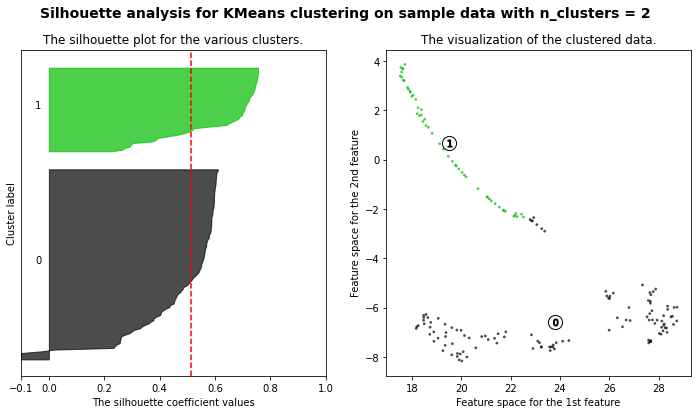

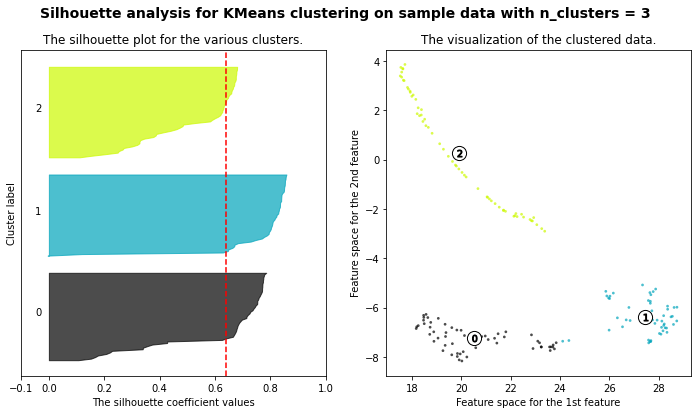

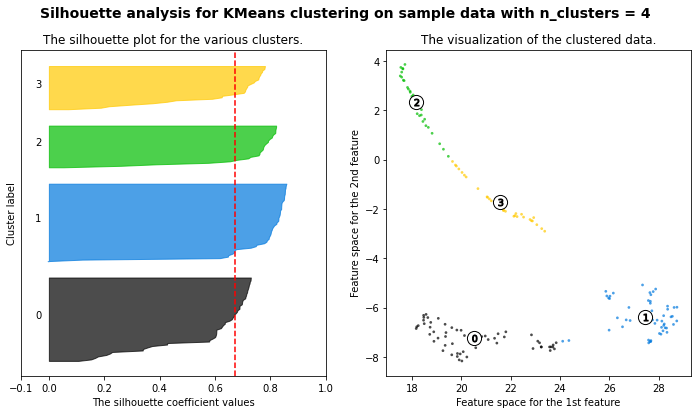

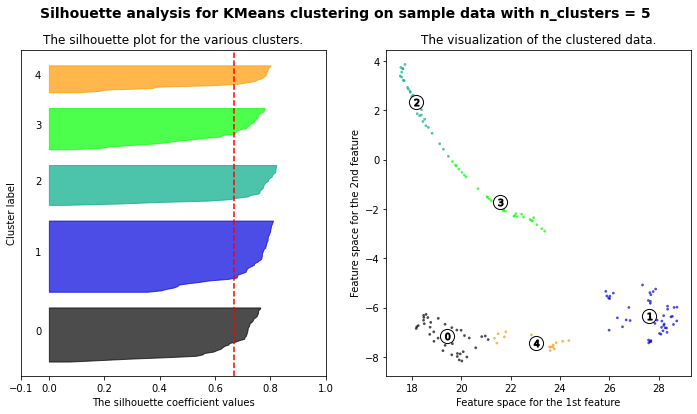

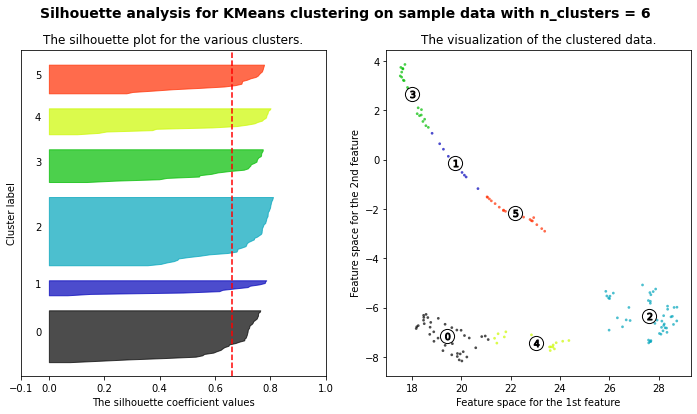

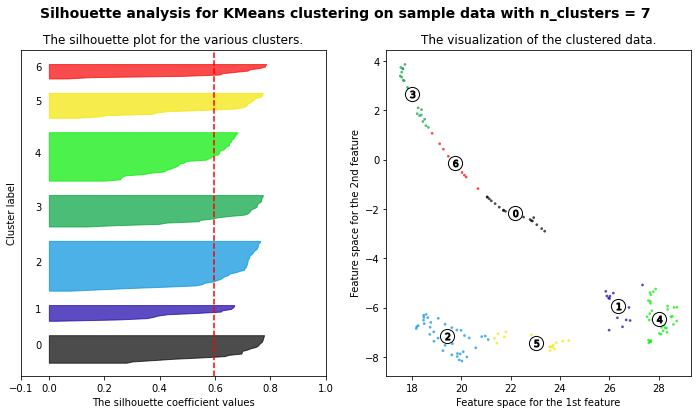

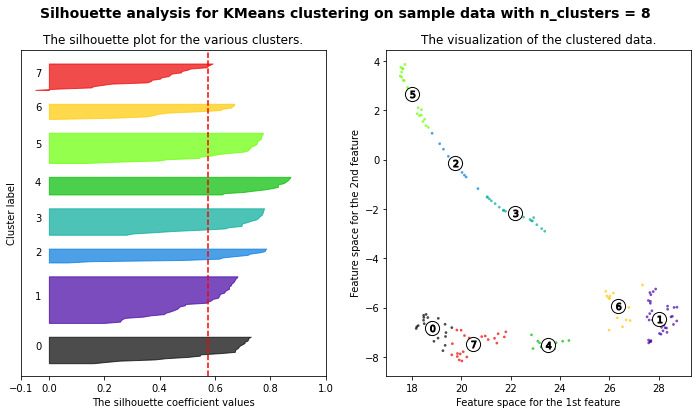

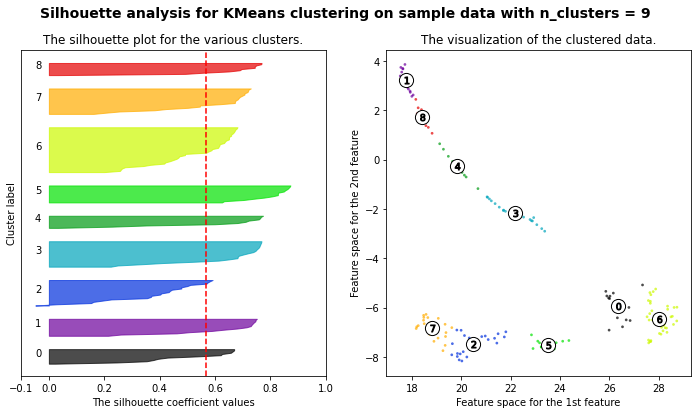

time: 3.11 s (started: 2022-12-10 01:49:55 -05:00)


In [29]:
silhouette(X_train, 10)

#### Optics

In [ ]:
X = X_train2
i = 1
range_ = np.arange(1, 0, -0.05)

fig = plt.figure(figsize=(15, 4*len(range_)))
fig.subplots_adjust(hspace=.15, wspace=.1)

for eps in range_:
    db = OPTICS(min_samples=10*X.shape[1], eps=eps, metric="euclidean").fit(X)
    labels = db.labels_
    
    # print(eps)
    ax = fig.add_subplot(len(range_)/2, 2, i)
    ax.set_title("eps = {}".format(round(eps, 3)), fontsize=14)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=["Cluster: {}".format(x) for x in labels])
    
    i += 1

#### DBSCAN

In [ ]:
X = X_train
i = 1
range_ = np.arange(2, 0, -0.01)

fig = plt.figure(figsize=(15, 3*len(range_)))
fig.subplots_adjust(hspace=.15, wspace=.1)

for eps in range_:
    db = DBSCAN(eps=eps, min_samples=20, metric="euclidean").fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    # print(labels)

    if len(np.unique(labels)) >= 2:
      # print(eps)
      ax = fig.add_subplot(len(range_)/2, 2, i)
      ax.set_title("eps = {}".format(round(eps, 3)), fontsize=14)
      sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=["Cluster: {}".format(x) for x in labels], s=50)
      
      i += 1

#### HDBSCAN, euclidean

/home/win7/Project/I.A./VirtualEnv_GE_3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

/home/win7/Project/I.A./VirtualEnv_GE_3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

/home/win7/Project/I.A./VirtualEnv_GE_3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

/home/win7/Project/I.A./VirtualEnv_GE_3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be

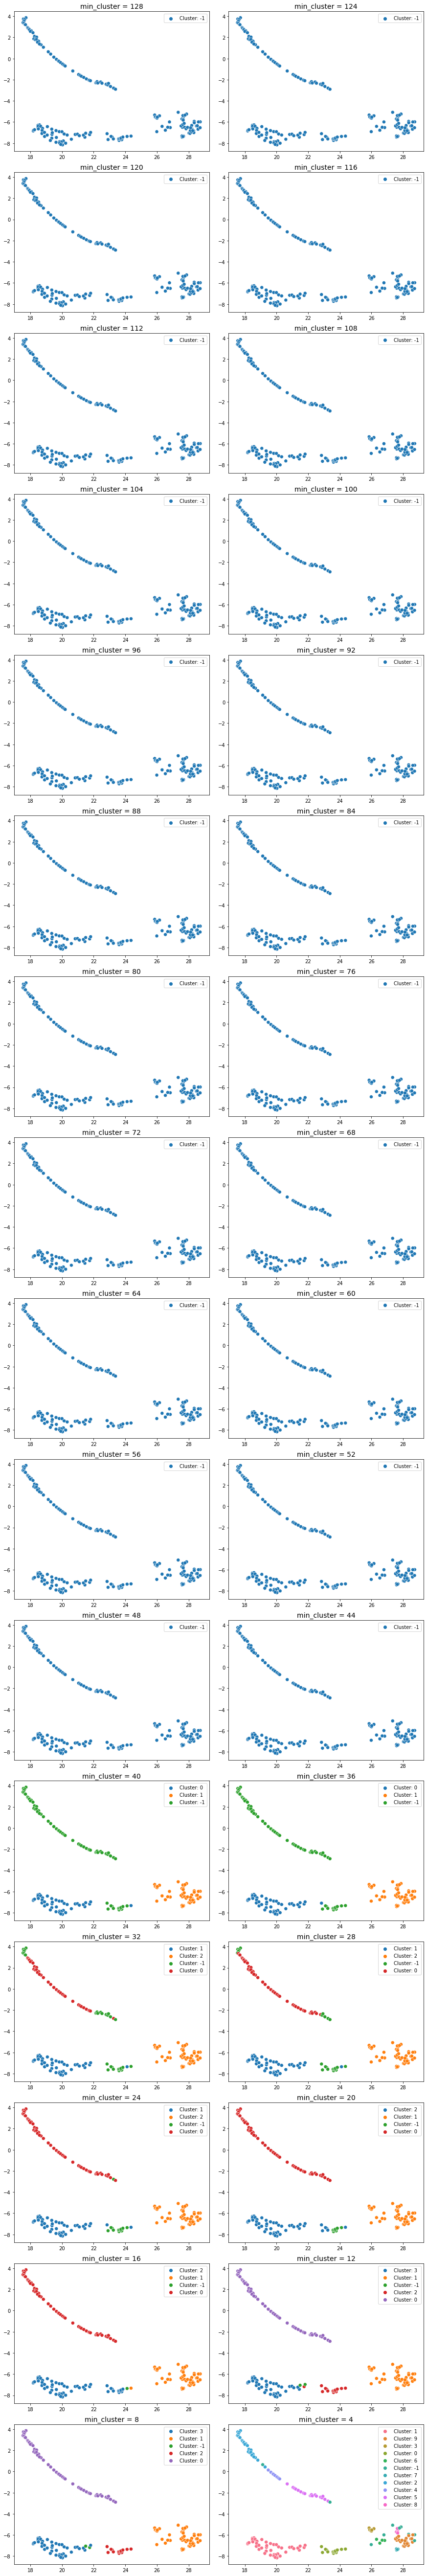

time: 5.62 s (started: 2022-12-10 01:50:14 -05:00)


In [30]:
# Select
X = X_train
i = 1
range_ = np.arange(128, 0, -4)

fig = plt.figure(figsize=(15, 3*len(range_)))
fig.subplots_adjust(hspace=.15, wspace=.1)

for min_cluster in range_:
    cluster = HDBSCAN(min_cluster_size=int(min_cluster), min_samples=None, core_dist_n_jobs=-1, 
                      allow_single_cluster=False)
    labels = cluster.fit_predict(X)
    # print(labels)

    if len(np.unique(labels)) >= 1:
      # print(min_cluster)
      ax = fig.add_subplot(len(range_)/2, 2, i)
      ax.set_title("min_cluster = {}".format(round(min_cluster, 2)), fontsize=14)
      sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=["Cluster: {}".format(x) for x in labels], s=50)
      
      i += 1

#### HDBSCAN, cosine

/home/win7/Project/I.A./VirtualEnv_GE_3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

/home/win7/Project/I.A./VirtualEnv_GE_3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

/home/win7/Project/I.A./VirtualEnv_GE_3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

/home/win7/Project/I.A./VirtualEnv_GE_3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be

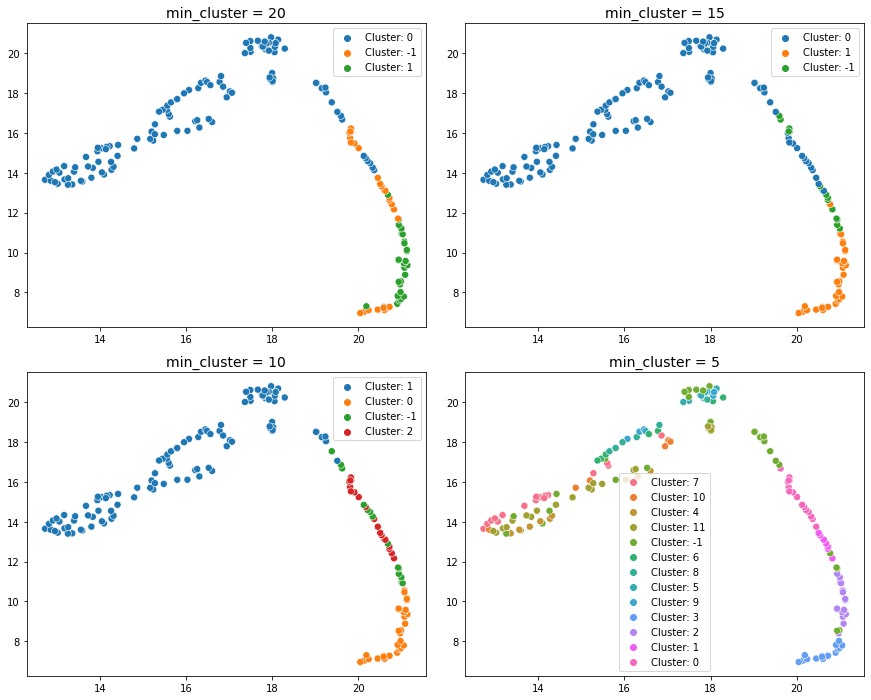

time: 1.09 s (started: 2022-12-08 20:30:40 -05:00)


In [ ]:
X = X_train
i = 1
range_ = np.arange(20, 0, -5)

fig = plt.figure(figsize=(15, 3*len(range_)))
fig.subplots_adjust(hspace=.15, wspace=.1)

for min_cluster in range_:
    pw_distance = pairwise_distances(X, metric="cosine", n_jobs=-1)
    # pw_distance = pairwise_kernels(X, metric="cosine", n_jobs=-1)
    # pw_distance = cosine_similarity(X)

    clusterer = HDBSCAN(min_cluster_size=int(min_cluster), metric='precomputed')
    clusterer.fit(pw_distance.astype('float64'))
    
    labels = clusterer.labels_

    if len(np.unique(labels)) >= 2:
      # print(eps)
      ax = fig.add_subplot(len(range_)/2, 2, i)
      ax.set_title("min_cluster = {}".format(round(min_cluster, 3)), fontsize=14)
      sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=["Cluster: {}".format(x) for x in labels], s=50)
      
      i += 1

### Training

#### HDBSCAN

In [30]:
""" clustering = HDBSCAN(min_cluster_size=24, min_samples=1, core_dist_n_jobs=-1, allow_single_cluster=False)
clustering.fit(X_train1)
node_embeddings_2d1["labels"] = clustering.labels_

clustering = HDBSCAN(min_cluster_size=4, min_samples=1, core_dist_n_jobs=-1, allow_single_cluster=False)
clustering.fit(X_train2)
node_embeddings_2d2["labels"] = clustering.labels_ """

clustering = HDBSCAN(min_cluster_size=16, min_samples=None, core_dist_n_jobs=-1, allow_single_cluster=False)
clustering.fit(X_train)
node_embeddings_2d["labels"] = clustering.labels_

time: 9.58 ms (started: 2022-12-10 11:50:12 -05:00)


#### K-means

In [ ]:
clustering = KMeans(n_clusters=2, init="k-means++", max_iter=300, random_state=42)
clustering.fit(X_train)
node_embeddings_2d["labels"] = clustering.labels_

time: 18.5 ms (started: 2022-12-08 21:36:38 -05:00)


### Clustering Visualization

In [31]:
# visualization_cluster_embeddings([node_embeddings_2d1, node_embeddings_2d2, node_embeddings_2d])
visualization_cluster_embeddings([node_embeddings_2d])

time: 65.1 ms (started: 2022-12-10 11:50:15 -05:00)


## Analysis

### Matching

In [ ]:
# matching(node_embeddings_2d1, node_embeddings_2d2, node_embeddings_2d)

In [ ]:
# df_ = get_node_class(node_embeddings_2d1, node_embeddings_2d2)
# df_.head(20)

### Common nodes

In [32]:
node_embeddings_2d_filter = node_embeddings_2d.copy() # node_embeddings_2d[node_embeddings_2d["labels"] != -1]
node_embeddings_2d_filter

# Check nodes by clusters in embedding global
clusters_ = np.array(list(zip(node_embeddings_2d_filter.index, node_embeddings_2d_filter["labels"])))
clusters_[:10]

clusters = []
for i, item in enumerate(clusters_.tolist()):
  clusters.append([item[0][1:], item[0][0], item[1]])

clusters = np.array(clusters)
clusters = clusters[clusters[:, 0].argsort()]
clusters = clusters[clusters[:, 2].argsort(kind="mergesort")]
# clusters = clusters[clusters[:, 1].argsort(kind="mergesort")]
clusters[:10]

commond_nodes = []

a = clusters[0]
for item in clusters[1:]:
  b = item
  if a[0] == b[0]:
    commond_nodes.append([a[0]])
    commond_nodes.append([b[0]])
  a = b
commond_nodes[:10]

intersection_raw1_raw2_ = np.unique(np.array(commond_nodes)[:,0])
intersection_raw1_raw2_

array(['131.0824', '186.1139', '251.0776', '307.0311', '317.2143',
       '441.3372', '545.3994', '604.0696'], dtype='<U8')

time: 6.76 ms (started: 2022-12-10 11:50:26 -05:00)


In [ ]:
wt = ['101.0243', '113.0246', '118.9807', '151.0403', '153.0173',
       '166.0506', '173.0454', '71.0139', '85.0296', '87.0086', '89.0245']

time: 553 µs (started: 2022-12-09 00:18:34 -05:00)


In [ ]:
#@title Aux script
# Get set for Raw data
set1_ = ['131.0824', '186.1139', '316.2857', '338.9889', '346.0558', '347.0589', '362.0509', '365.0531', '367.0185', '388.9441', '397.1319', '401.0173', '426.0221','441.3372','489.9937', '505.9889', '521.984', '545.3994', '604.0696', '606.0744','611.144', '664.117', '665.2139', '766.1076', '784.1495','808.118']
set2_ = intersection_raw1_raw2_

set1 = set(set1_)
set2 = set(set2_)

# Intersection Raw data
intersection = np.array(list(set1 & set2))
print(sorted(intersection))

# Difference Raw data
diff = np.array(list(set1 - set2))
print(sorted(diff))

# Difference Raw data
diff = np.array(list(set2 - set1))
print(sorted(diff))

In [ ]:
#@title Aux script
# Get set for Raw data
set1_ = ['131.0355', '131.0824', '151.0403', '165.0554', '166.0506',
       '173.0454', '186.1139', '251.0776', '279.2331', '307.0311',
       '317.2143', '441.3372', '545.3994', '59.0137', '604.0696',
       '71.0139', '85.0296', '87.0086', '88.0405', '89.0245']

set2_ = ['131.0355', '131.0824', '151.0403', '165.0554', '166.0506',
       '168.0663', '173.0454', '173.0711', '186.1139', '211.0603',
       '251.0776', '266.0886', '279.2331', '307.0311', '317.2143',
       '397.1319', '401.0173', '426.0221', '441.3372', '489.9937',
       '505.9889', '521.984', '545.3994', '59.0137', '604.0696',
       '606.0744', '611.144', '664.117', '665.2139', '71.0139',
       '766.1076', '784.1495', '808.118', '85.0296', '87.0086', '88.0405',
       '89.0245']

set3_ = ['131.0355', '131.0824', '151.0403', '165.0554', '166.0506',
       '173.0454', '186.1139', '251.0776', '279.2331', '307.0311',
       '317.2143', '441.3372', '545.3994', '59.0137', '604.0696',
       '71.0139', '85.0296', '87.0086', '88.0405', '89.0245']

set4_ = ['131.0355', '131.0824', '151.0403', '165.0554', '166.0506',
       '186.1139', '251.0776', '279.2331', '307.0311', '317.2143',
       '441.3372', '545.3994', '59.0137', '71.0139', '85.0296', '87.0086',
       '88.0405', '89.0245']

set5_ = ['131.0355', '131.0824', '151.0403', '165.0554', '166.0506',
       '168.0663', '173.0454', '173.0711', '186.1139', '251.0776',
       '266.0886', '279.2331', '307.0311', '317.2143', '441.3372',
       '545.3994', '59.0137', '604.0696']

set1 = set(set1_)
set2 = set(set2_)
set3 = set(set3_)
set4 = set(set4_)
set5 = set(set5_)

# Intersection Raw data
intersection = np.array(list(set1 & set2 & set3 & set4 & set5))
print(sorted(intersection))

In [ ]:
# Get set for Raw data
set1_ = ['101.0243', '102.0562', '109.0407', '113.0246', '115.0038', '117.0195', '118.051',
			'118.9807', '145.0144', '145.0984', '147.0655', '151.0403', '152.0354', '153.0173', '165.0554', 
			'166.0506', '173.0454', '179.0348', '266.0886', '59.0137', '71.0139', '74.0249', '808.118', '85.0296', 
			'87.0086', '88.0405', '89.0245']

set2_ = ['131.0355', '131.0824', '151.0403', '165.0554', '166.0506', '186.1139', '251.0776', 
			'279.2331', '307.0311', '317.2143', '441.3372', '545.3994', '59.0137']

set1 = set(set1_)
set2 = set(set2_)

# Intersection Raw data
intersection = np.array(list(set1 & set2 ))
print(sorted(intersection))

### Graph visualization

In [33]:
base = 100
weight = 100

""" node_size1 = []
for node_id in node_embeddings_2d1.index:
  node_size1.append(base + weight * G1.degree(node_id))

node_size2 = []
for node_id in node_embeddings_2d2.index:
  node_size2.append(base + weight * G2.degree(node_id)) """

node_size = []
for node_id in node_embeddings_2d.index:
  node_size.append(base + weight * G.degree(node_id))


time: 1.86 ms (started: 2022-12-10 01:57:33 -05:00)


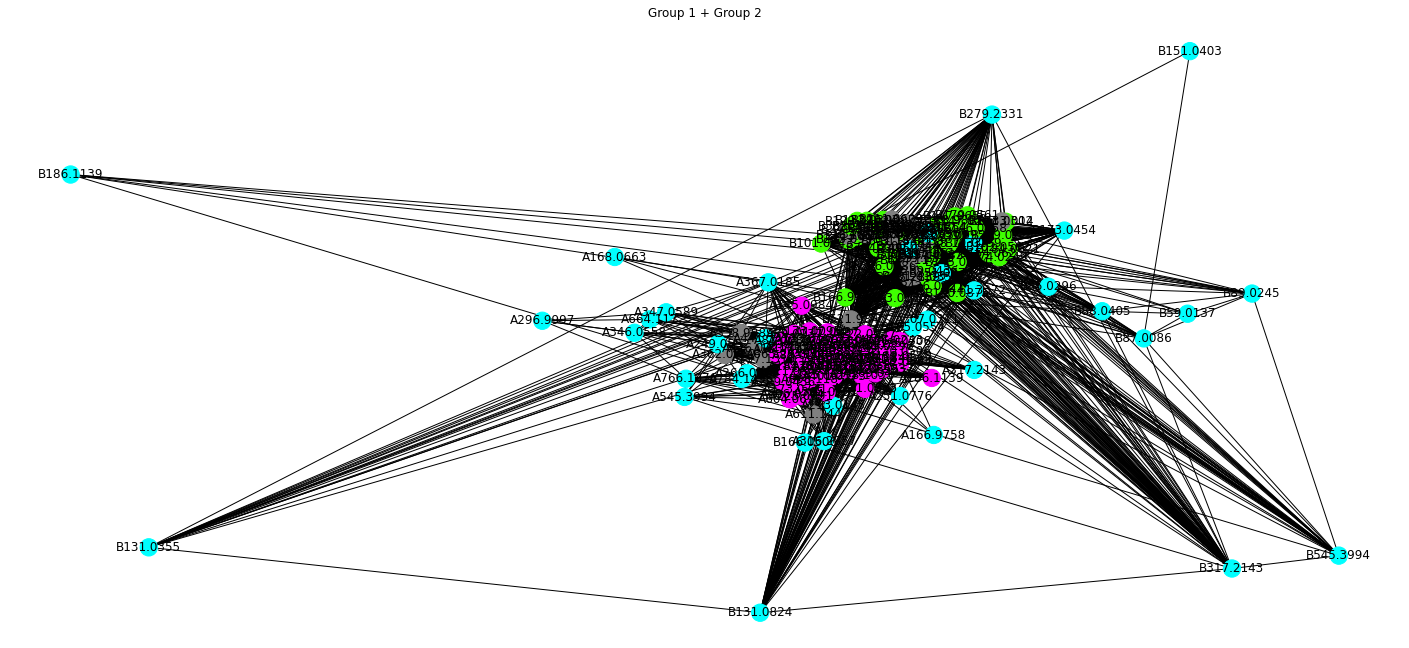

time: 871 ms (started: 2022-12-10 01:57:38 -05:00)


In [34]:
# cmap = plt.get_cmap("viridis")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 25))

""" cmap = ListedColormap(list(np.array(colors)[np.unique(node_embeddings_2d1["labels"])]))
nx.draw(G1, pos=nx.spring_layout(G1, k=0.10, seed=42), nodelist=list(map(str, node_embeddings_2d1.index)),
        edgecolors="black", font_size=8, with_labels=True, 
        node_color=node_embeddings_2d1["labels"], cmap=cmap, ax=axes[0])
axes[0].set_title("Raw data: 111-125")

cmap = ListedColormap(list(np.array(colors)[np.unique(node_embeddings_2d2["labels"])]))
nx.draw(G2, pos=nx.spring_layout(G2, k=0.10, seed=42), nodelist=list(map(str, node_embeddings_2d2.index)),
        edgecolors="black", font_size=8, with_labels=True, 
        node_color=node_embeddings_2d2["labels"], cmap=cmap, ax=axes[1])
axes[1].set_title("Raw data: 411-425") """

cmap = ListedColormap(list(np.array(colors)[np.unique(node_embeddings_2d["labels"])]))
nx.draw(G, pos=nx.spring_layout(G, iterations=12, seed=42), nodelist=list(map(str, node_embeddings_2d.index)),
        with_labels=True, node_color=node_embeddings_2d["labels"], cmap=cmap, ax=axes[0])
axes[0].set_title("Group 1 + Group 2")

axes[1].remove()

In [ ]:
#@title Colors

%%html
<style>
    div {
      width: 50%;
    }
    .div-1 {
        background-color: #FF00FF;
    }
    
    .div-2 {
    	background-color: #3FFF00;
    }
    
    .div-3 {
    	background-color: #00FFFF;
    }
    .div-4 {
    	background-color: #FFF700;
    }
</style>

<body>
    <div class="div-1"> 0 </div>
    <div class="div-2"> 1 </div>
    <div class="div-3"> 2 </div>
    <div class="div-4"> 3 </div>
</body>

time: 7.64 ms (started: 2022-11-13 15:27:58 +00:00)


## Filter data

### Sub graph visualization

In [36]:
intersection_raw1_raw2_

array(['251.0776', '307.0311', '317.2143', '323.0277', '338.9889',
       '441.3372', '545.3994', '611.144'], dtype='<U8')

time: 4.15 ms (started: 2022-12-10 01:58:28 -05:00)


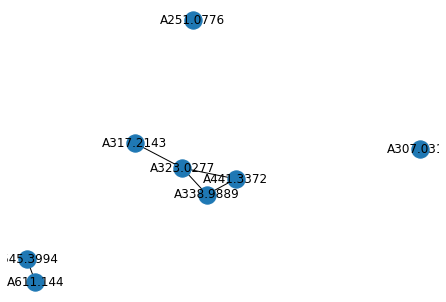

time: 92.7 ms (started: 2022-12-10 01:58:31 -05:00)


In [37]:
nodes_g1 = []
for node_id in intersection_raw1_raw2_:
  nodes_g1.append("A" + node_id)

SG1 = G.subgraph(nodes_g1)
nx.draw(SG1, with_labels=True)

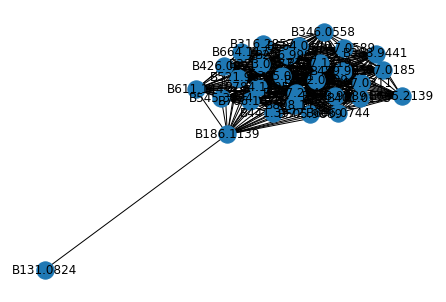

time: 1.13 s (started: 2022-11-15 22:02:54 +00:00)


In [ ]:
nodes_g2 = []
for node_id in intersection_raw1_raw2_:
  nodes_g2.append("B" + node_id)

SG2 = G.subgraph(nodes_g2)
nx.draw(SG2, with_labels=True)

In [ ]:
print(nx.info(SG1))
print(nx.info(SG2))

Graph with 30 nodes and 345 edges
Graph with 30 nodes and 394 edges
time: 15.6 ms (started: 2022-11-15 22:02:57 +00:00)


In [ ]:
edges, weights  = zip(*nx.get_edge_attributes(SG1, "weight").items())
print(min(weights))

edges, weights  = zip(*nx.get_edge_attributes(SG2, "weight").items())
print(min(weights))

edges, weights  = zip(*nx.get_edge_attributes(G, "weight").items())
print(min(weights))

0.5008014161343037
0.5074051351825869
0.5
time: 43.4 ms (started: 2022-11-15 22:03:01 +00:00)


### Get common nodes with changes

In [ ]:
# Get changes by commond node
changes = []

v1 = []
v2 = []
w1 = []
w2 = []

for comm_node_id in intersection_raw1_raw2_:
  # print("Node id:", node_id_comm)

  e1 = []
  e2 = []

  node_id = "A" + comm_node_id
  neighbors1 = sorted(list(G.neighbors(node_id)))
  for node_id_ in neighbors1:
    w = G.get_edge_data(node_id, node_id_)["weight"]
    e1.append([node_id, node_id_, round(w, 2)])
    
  node_id = "B" + comm_node_id
  neighbors2 = sorted(list(G.neighbors(node_id)))
  for node_id_ in neighbors2:
    w = G.get_edge_data(node_id, node_id_)["weight"]
    e2.append([node_id, node_id_, round(w, 2)])
  
  # Searching
  # print(e1)
  # print(e2)
  for item1 in e1:
    for item2 in e2:
      if item1[0][1:] == item2[0][1:] and item1[1][1:] == item2[1][1:]: # and item1[0] < item1[1]:
        changes.append([item1[0][1:], item2[1][1:], item1[2], item2[2]])
        break

df_changes = pd.DataFrame(changes, columns=["Node u", "Node v", "Weight1", "Weight2"])
df_changes["Difference"] = df_changes["Weight1"] - df_changes["Weight2"]
df_changes["Difference"] = df_changes["Difference"].abs()

time: 118 ms (started: 2022-11-15 22:03:05 +00:00)


In [ ]:
df_changes

Node u    Node v  Weight1  Weight2  Difference
0     184.0021  101.0243     0.76     0.92        0.16
1     184.0021  102.0562     0.89     0.95        0.06
2     184.0021  109.0407     0.84     0.94        0.10
3     184.0021  112.0518     0.68     0.60        0.08
4     184.0021  113.0246     0.73     0.97        0.24
...        ...       ...      ...      ...         ...
2964   808.118  784.1495     0.85     0.96        0.11
2965   808.118   85.0296     0.63     0.93        0.30
2966   808.118   87.0086     0.64     0.93        0.29
2967   808.118   88.0405     0.66     0.94        0.28
2968   808.118   89.0245     0.58     0.95        0.37

[2969 rows x 5 columns]

time: 20.8 ms (started: 2022-11-15 16:00:39 +00:00)


In [ ]:
# Save
# df_changes.to_csv("{}/Outputs/Changes/df_new_changes_05_04.csv".format(dir), index=False)

time: 578 ms (started: 2022-10-25 22:56:43 +00:00)


In [ ]:
# Read
# df_changes = pd.read_csv("{}/Outputs/Changes/df_new_changes_05_04.csv".format(dir), index_col="Unnamed: 0")
# df_changes

In [ ]:
df_changes_filter = df_changes.loc[df_changes["Difference"] >= 0.3] # >= 0.4
df_changes_filter

Node u    Node v  Weight1  Weight2  Difference
102   296.9997  338.9889     0.57     0.87        0.30
159   307.0311  166.9758     0.52     0.83        0.31
261   316.2857  397.1319     0.52     0.83        0.31
354   317.2143   808.118     0.54     0.91        0.37
389   323.0277  166.9758     0.57     0.87        0.30
...        ...       ...      ...      ...         ...
2056   808.118  317.2143     0.54     0.91        0.37
2063   808.118  397.1319     0.55     0.94        0.39
2076   808.118   71.0139     0.63     0.93        0.30
2080   808.118   85.0296     0.63     0.93        0.30
2083   808.118   89.0245     0.58     0.95        0.37

[87 rows x 5 columns]

time: 54.1 ms (started: 2022-11-15 22:03:10 +00:00)


### Common nodes visualization

In [ ]:
# Plot common node id

for comm_node_id in intersection_raw1_raw2_:
  # print("Node id:", node_id)
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
  axes = axes.flatten()

  G1_ = nx.Graph()
  G2_ = nx.Graph()

  e1 = []
  c1 = []

  e2 = []
  c2 = []
  
  node_id = "A" + comm_node_id
  neighbors1 = sorted(list(G.neighbors(node_id)))
  for node_id_ in neighbors1:
    w = G.get_edge_data(node_id, node_id_)["weight"]
    e1.append([node_id, node_id_, round(w, 2)])
    if w >= 0:
      c1.append("red")
    else:
      c1.append("blue")
  G1_.add_weighted_edges_from(e1)

  node_id = "B" + comm_node_id
  neighbors2 = sorted(list(G.neighbors(node_id)))
  for node_id_ in neighbors2:
    w = G.get_edge_data(node_id, node_id_)["weight"]
    e2.append([node_id, node_id_, round(w, 2)])
    if w >= 0:
      c2.append("red")
    else:
      c2.append("blue")
  G2_.add_weighted_edges_from(e2)
  
  # Plot
  pos = nx.circular_layout(G1_)
  # pos = nx.spring_layout(G1_)
  nx.draw(G1_, pos, edge_color=c1, with_labels=True, node_color="orange", ax=axes[0])
  labels1=nx.get_edge_attributes(G1_, "weight")
  colors1={e: G1_.edges[e]['weight'] for e in G1_.edges}
  nx.draw_networkx_edge_labels(G1_, pos, edge_labels=labels1, ax=axes[0])
  axes[0].set_title("Group 1")

  pos = nx.circular_layout(G2_)
  # pos = nx.kamada_kawai_layout(G2_)
  nx.draw(G2_, pos, edge_color=c2, with_labels=True, node_color="orange", ax=axes[1])
  labels2=nx.get_edge_attributes(G2_, "weight")
  nx.draw_networkx_edge_labels(G2_, pos, edge_labels=labels2, ax=axes[1])
  axes[1].set_title("Group 2")

### Get kind of changes

In [ ]:
# Detect kind of change
threshold = 0.8
df_kind_changes = df_changes_filter.copy()
conditions = [
    ((df_kind_changes["Weight1"] < 0) & (df_kind_changes["Weight2"] > 0) & (df_kind_changes["Weight1"] > -threshold) & (df_kind_changes["Weight2"] < threshold)),
    ((df_kind_changes["Weight1"] < 0) & (df_kind_changes["Weight2"] > 0) & (df_kind_changes["Weight1"] > -threshold) & (df_kind_changes["Weight2"] >= threshold)),
    ((df_kind_changes["Weight1"] < 0) & (df_kind_changes["Weight2"] > 0) & (df_kind_changes["Weight1"] <= -threshold) & (df_kind_changes["Weight2"] < threshold)),
    ((df_kind_changes["Weight1"] < 0) & (df_kind_changes["Weight2"] > 0) & (df_kind_changes["Weight1"] <= -threshold) & (df_kind_changes["Weight2"] >= threshold)),

    ((df_kind_changes["Weight1"] > 0) & (df_kind_changes["Weight2"] < 0) & (df_kind_changes["Weight1"] < threshold) & (df_kind_changes["Weight2"] > -threshold)),
    ((df_kind_changes["Weight1"] > 0) & (df_kind_changes["Weight2"] < 0) & (df_kind_changes["Weight1"] >= threshold) & (df_kind_changes["Weight2"] > -threshold)),
    ((df_kind_changes["Weight1"] > 0) & (df_kind_changes["Weight2"] < 0) & (df_kind_changes["Weight1"] < threshold) & (df_kind_changes["Weight2"] <= -threshold)),
    ((df_kind_changes["Weight1"] > 0) & (df_kind_changes["Weight2"] < 0) & (df_kind_changes["Weight1"] >= threshold) & (df_kind_changes["Weight2"] <= -threshold)),

    ((df_kind_changes["Weight1"] > 0) & (df_kind_changes["Weight2"] > 0) & (df_kind_changes["Weight1"] >= threshold) & (df_kind_changes["Weight2"] >= threshold)),
    ((df_kind_changes["Weight1"] > 0) & (df_kind_changes["Weight2"] > 0) & (df_kind_changes["Weight1"] < threshold) & (df_kind_changes["Weight2"] < threshold)),
    ((df_kind_changes["Weight1"] > 0) & (df_kind_changes["Weight2"] > 0) & (df_kind_changes["Weight1"] >= threshold) & (df_kind_changes["Weight2"] < threshold)),
    ((df_kind_changes["Weight1"] > 0) & (df_kind_changes["Weight2"] > 0) & (df_kind_changes["Weight1"] < threshold) & (df_kind_changes["Weight2"] >= threshold)),

    ((df_kind_changes["Weight1"] < 0) & (df_kind_changes["Weight2"] < 0) & (df_kind_changes["Weight1"] <= -threshold) & (df_kind_changes["Weight2"] <= -threshold)),
    ((df_kind_changes["Weight1"] < 0) & (df_kind_changes["Weight2"] < 0) & (df_kind_changes["Weight1"] > -threshold) & (df_kind_changes["Weight2"] > -threshold)),
    ((df_kind_changes["Weight1"] < 0) & (df_kind_changes["Weight2"] < 0) & (df_kind_changes["Weight1"] <= -threshold) & (df_kind_changes["Weight2"] > -threshold)),
    ((df_kind_changes["Weight1"] < 0) & (df_kind_changes["Weight2"] < 0) & (df_kind_changes["Weight1"] > -threshold) & (df_kind_changes["Weight2"] <= -threshold)),
]
values = ["np", "nP", "Np", "NP", "pn", "Pn", "pN", "PN", "PP", "pp", "Pp", "pP", "NN", "nn", "Nn", "nN"]
df_kind_changes["Kind change"] = np.select(conditions, values)
df_kind_changes

Node u    Node v  Weight1  Weight2  Difference Kind change
102   296.9997  338.9889     0.57     0.87        0.30          pP
159   307.0311  166.9758     0.52     0.83        0.31          pP
261   316.2857  397.1319     0.52     0.83        0.31          pP
354   317.2143   808.118     0.54     0.91        0.37          pP
389   323.0277  166.9758     0.57     0.87        0.30          pP
...        ...       ...      ...      ...         ...         ...
2056   808.118  317.2143     0.54     0.91        0.37          pP
2063   808.118  397.1319     0.55     0.94        0.39          pP
2076   808.118   71.0139     0.63     0.93        0.30          pP
2080   808.118   85.0296     0.63     0.93        0.30          pP
2083   808.118   89.0245     0.58     0.95        0.37          pP

[87 rows x 6 columns]

time: 50 ms (started: 2022-11-15 22:03:21 +00:00)


In [ ]:
# Counting frequencies node U
df_temp1 = df_changes_filter["Node u"].value_counts(ascending=False, dropna=False)
df_temp1 = df_temp1.to_frame()
df_temp1.reset_index(drop=False, inplace=True)
df_temp1.columns = ["Node id", "Count"]

print(len(df_temp1), sum(df_temp1["Count"].values))
df_temp1[:10]

23 87


Node id  Count
0   808.118     19
1  766.1076     13
2  441.3372      9
3  338.9889      6
4  397.1319      6
5  347.0589      5
6  426.0221      4
7  545.3994      3
8  784.1495      3
9  323.0277      2

time: 17.3 ms (started: 2022-11-15 22:03:24 +00:00)


In [ ]:
# Counting frequencies node V
df_temp2 = df_changes_filter["Node v"].value_counts(ascending=False, dropna=False)
df_temp2 = df_temp2.to_frame()
df_temp2.reset_index(drop=False, inplace=True)
df_temp2.columns = ["Node id", "Count"]

print(len(df_temp2), sum(df_temp2["Count"].values))
df_temp2[:10]

50 87


Node id  Count
0  766.1076      6
1  166.9758      5
2  397.1319      4
3   89.0245      4
4  179.0561      4
5  441.3372      3
6  113.0246      3
7  338.9889      3
8  225.0991      3
9  365.0531      2

time: 20.2 ms (started: 2022-11-15 22:03:27 +00:00)


In [ ]:
# Join frequencies for Node u and Node v
df_frequencies = pd.concat([df_temp1, df_temp2])
df_frequencies.sort_values(by=["Count"], ascending=False, inplace=True)
df_frequencies.drop_duplicates(inplace=True)
df_frequencies

Node id  Count
0    808.118     19
1   766.1076     13
2   441.3372      9
3   338.9889      6
4   397.1319      6
..       ...    ...
24  168.0663      1
25  151.0403      1
26  266.0886      1
27  173.0454      1
49   85.0296      1

[64 rows x 2 columns]

time: 31.8 ms (started: 2022-11-15 22:03:30 +00:00)


In [ ]:
# Save
# df_frequencies.to_csv("{}/df_new_node_degree_05_04.csv".format(dir), index=True)

time: 504 µs (started: 2022-10-26 14:04:14 +00:00)


In [ ]:
# Get changes accorinng to most frequencies node
list_node_frequencies = np.unique(df_frequencies["Node id"].values)
print(len(list_node_frequencies))
list_node_frequencies

54


array(['109.0407', '113.0246', '115.0038', '118.9807', '129.0192',
       '130.0506', '135.0311', '145.0144', '145.0617', '147.0297',
       '151.0403', '153.0173', '154.062', '165.0554', '166.0506',
       '166.9758', '168.0663', '173.0095', '173.0454', '173.0711',
       '179.0348', '179.0561', '184.0021', '225.0991', '249.0552',
       '251.0776', '259.0227', '266.0886', '296.9997', '307.0311',
       '316.2857', '317.2143', '323.0277', '338.9889', '346.0558',
       '347.0589', '362.0509', '365.0531', '388.9441', '397.1319',
       '401.0173', '426.0221', '441.3372', '505.9889', '521.984',
       '545.3994', '604.0696', '664.117', '71.0139', '766.1076',
       '784.1495', '808.118', '85.0296', '89.0245'], dtype=object)

time: 9.41 ms (started: 2022-11-15 22:03:33 +00:00)


### Get metadata

In [ ]:
# Get metabolite name by node id
list_metabolite = df_meta.loc[list_node_frequencies, ["Metabolites - Approved by Nicola", "Chemical Formula (based on BioCyc)"]]
# list_metabolite["Alignment ID"] = list_metabolite.index.values
list_metabolite.head()

Metabolites - Approved by Nicola  \
Corrected (m/z)                                    
109.0407                         Acetylimidazole   
113.0246                                  C5H6O3   
115.0038              Fumaric acid / Maleic acid   
118.9807                Methylthiopropionic acid   
129.0192                          Acetylpyruvate   

                Chemical Formula (based on BioCyc)  
Corrected (m/z)                                     
109.0407                                   C5H6N2O  
113.0246                                    C5H6O3  
115.0038                                    C4H4O4  
118.9807                                   C4H8O2S  
129.0192                                    C5H6O4

time: 18.5 ms (started: 2022-11-15 22:03:36 +00:00)


In [ ]:
# Save
# list_metabolite.to_csv("{}/Outputs/Metabolites/df_new_names_05_04.csv".format(dir), index=True)

time: 1.11 s (started: 2022-10-26 14:04:14 +00:00)


In [ ]:
# list_metabolite = pd.read_csv("{}/Outputs/Metabolites/df_new_names_05_04.csv".format(dir), index_col="Alignment ID")
# list_metabolite

time: 634 µs (started: 2022-10-26 14:04:15 +00:00)


In [ ]:
list_metabolite_formula = list_metabolite.loc[pd.notnull(list_metabolite["Chemical Formula (based on BioCyc)"])]
list_metabolite_no_formula = list_metabolite.loc[~pd.notnull(list_metabolite["Chemical Formula (based on BioCyc)"])]

list_metabolite_formula.head()

Metabolites - Approved by Nicola  \
Corrected (m/z)                                    
109.0407                         Acetylimidazole   
113.0246                                  C5H6O3   
115.0038              Fumaric acid / Maleic acid   
118.9807                Methylthiopropionic acid   
129.0192                          Acetylpyruvate   

                Chemical Formula (based on BioCyc)  
Corrected (m/z)                                     
109.0407                                   C5H6N2O  
113.0246                                    C5H6O3  
115.0038                                    C4H4O4  
118.9807                                   C4H8O2S  
129.0192                                    C5H6O4

time: 28 ms (started: 2022-11-15 22:03:39 +00:00)


In [ ]:
# Search one node
list_metabolite.loc["766.1076"]

Metabolites - Approved by Nicola          Coenzyme A
Chemical Formula (based on BioCyc)    C21H36N7O16P3S
Name: 766.1076, dtype: object

time: 9.33 ms (started: 2022-11-15 22:03:44 +00:00)


## Plot graph using metadata

### Global

In [ ]:
edges_w = df_kind_changes[["Node u", "Node v", "Kind change"]].values.tolist()
edges_w[:10]

[['296.9997', '338.9889', 'pP'],
 ['307.0311', '166.9758', 'pP'],
 ['316.2857', '397.1319', 'pP'],
 ['317.2143', '808.118', 'pP'],
 ['323.0277', '166.9758', 'pP'],
 ['323.0277', '766.1076', 'pP'],
 ['338.9889', '153.0173', 'pP'],
 ['338.9889', '179.0561', 'pP'],
 ['338.9889', '225.0991', 'pP'],
 ['338.9889', '296.9997', 'pP']]

time: 10.2 ms (started: 2022-11-15 22:03:46 +00:00)


54
['pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP', 'pP']


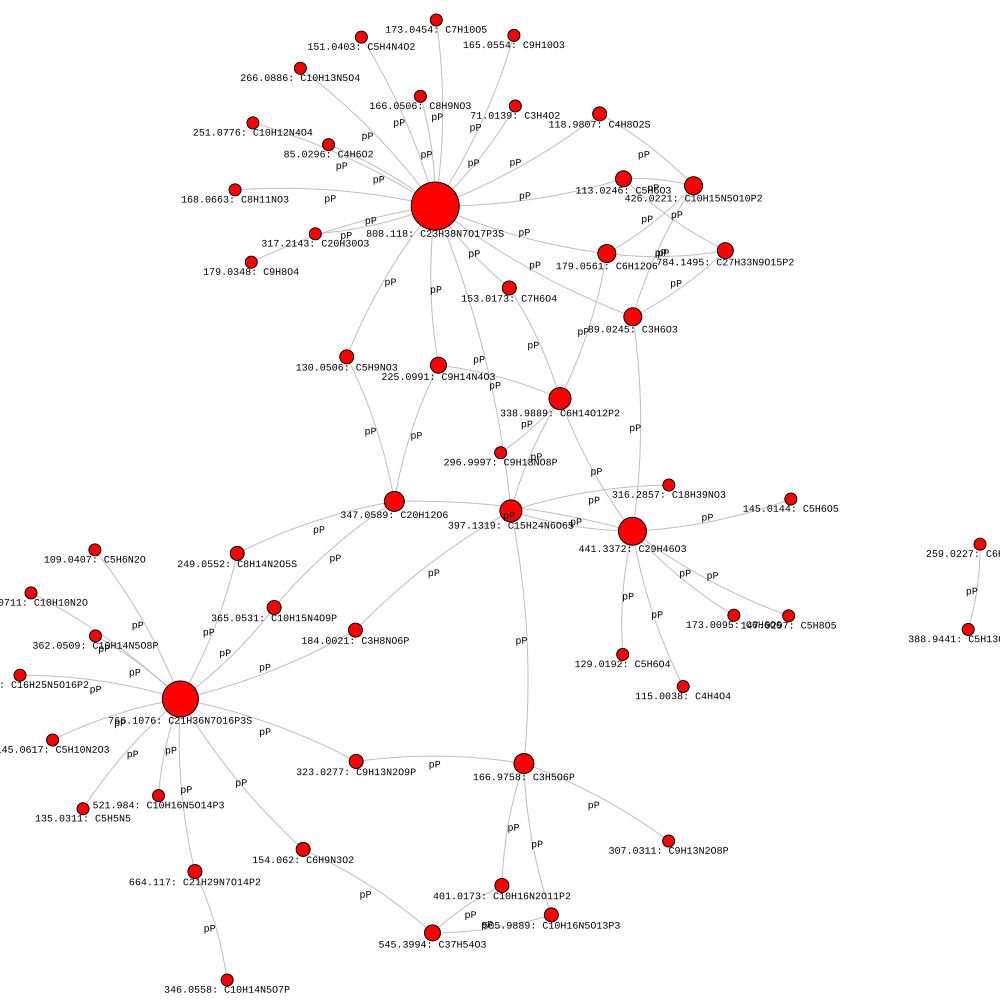

time: 144 ms (started: 2022-11-15 22:03:56 +00:00)


In [ ]:
# Plot using all nodes with Formula

edges_tuples = [(str(x[0]), str(x[1]), x[2]) for x in edges_w]
# print(edges_tuples)
IG = ig.Graph.TupleList(edges_tuples, directed=False, weights=True)
print(len(IG.vs["name"]))
print(IG.es["weight"])

IG = IG.simplify(combine_edges="first")

# remove null Formula nodes
""" # delete_ids = [g2.vs["name"].index(node_id) for node_id in list_metabolite_no_formula.index.values if node_id in g2.vs["name"]]
delete_ids = np.where(np.isin(g2.vs["name"], list_metabolite_no_formula.index.values))[0]
g2.delete_vertices(delete_ids)
print(len(g2.vs["name"])) """

# remove low degree nodes
""" delete_ids = [v.index for v in g2.vs if v.degree() == 0]
g2.delete_vertices(delete_ids)
print(len(g2.vs["name"]))
print(g2.summary()) """

formula = ["{}: {}".format(thing[0], thing[1]) for thing in zip(IG.vs["name"],
                                                                list_metabolite_formula["Chemical Formula (based on BioCyc)"].loc[IG.vs["name"]].values)]
IG.vs["formula"] = formula
# g2.es["weights"] = df_kind_changes["Kind change"].values # df_kind_change["Kind change"].filter(items=g2.vs["name"], axis=0).values # label edges

layout = IG.layout_fruchterman_reingold()
# layout = IG.layout_davidson_harel()
# layout = IG.layout_lgl()

visual_style={}
visual_style["bbox"] = (1000, 1000)
visual_style["vertex_size"] = 10
visual_style["vertex_size"] = [10 + w * 2 for w in IG.degree()]
visual_style["vertex_label"] = IG.vs["formula"]

visual_style["labels"] = IG.vs["name"]
# visual_style["vertex_label_color"] = "red"
visual_style["vertex_label_dist"] =1
visual_style["vertex_label_size"] = 10
visual_style["edge_label"] = IG.es["weight"] # g2.es["weights"]
visual_style["edge_color"] = "grey"
visual_style["edge_width"] = 1
visual_style["edge_label_size"] = 10
visual_style["edge_curved"] = 0.1
# visual_style["edge_curved"] = [False] * g2.ecount()
# visual_style["edge_label_color"] = "red"

""" fig, ax = plt.subplots(figsize=(30, 30))
ig.plot(g2, layout=layout, target=ax, **visual_style)
plt.axis("off") """

ig.plot(IG, layout=layout, **visual_style, target="graph_new_full.pdf")

### Clustering

Dendrogram, 54 elements, 52 merges
Clustering with 54 elements and 7 clusters
[7, 7, 12, 14, 6, 6, 2]
IGRAPH UNW- 14 14 --
+ attr: formula (v), name (v), weight (e)
+ edges (vertex names):
766.1076--664.117, 346.0558--664.117, 347.0589--130.0506, 766.1076--249.0552,
347.0589--249.0552, 766.1076--365.0531, 347.0589--365.0531,
766.1076--362.0509, 766.1076--521.984, 766.1076--604.0696, 766.1076--109.0407,
766.1076--135.0311, 766.1076--145.0617, 766.1076--173.0711
[0, 0, 1, 1, 0, 0, 2, 2, 1, 3, 0, 4, 0, 5, 3, 3, 3, 3, 3, 3, 3, 6, 6, 0, 1, 1, 4, 4, 4, 4, 5, 5, 5, 5, 5, 1, 3, 1, 3, 3, 3, 3, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


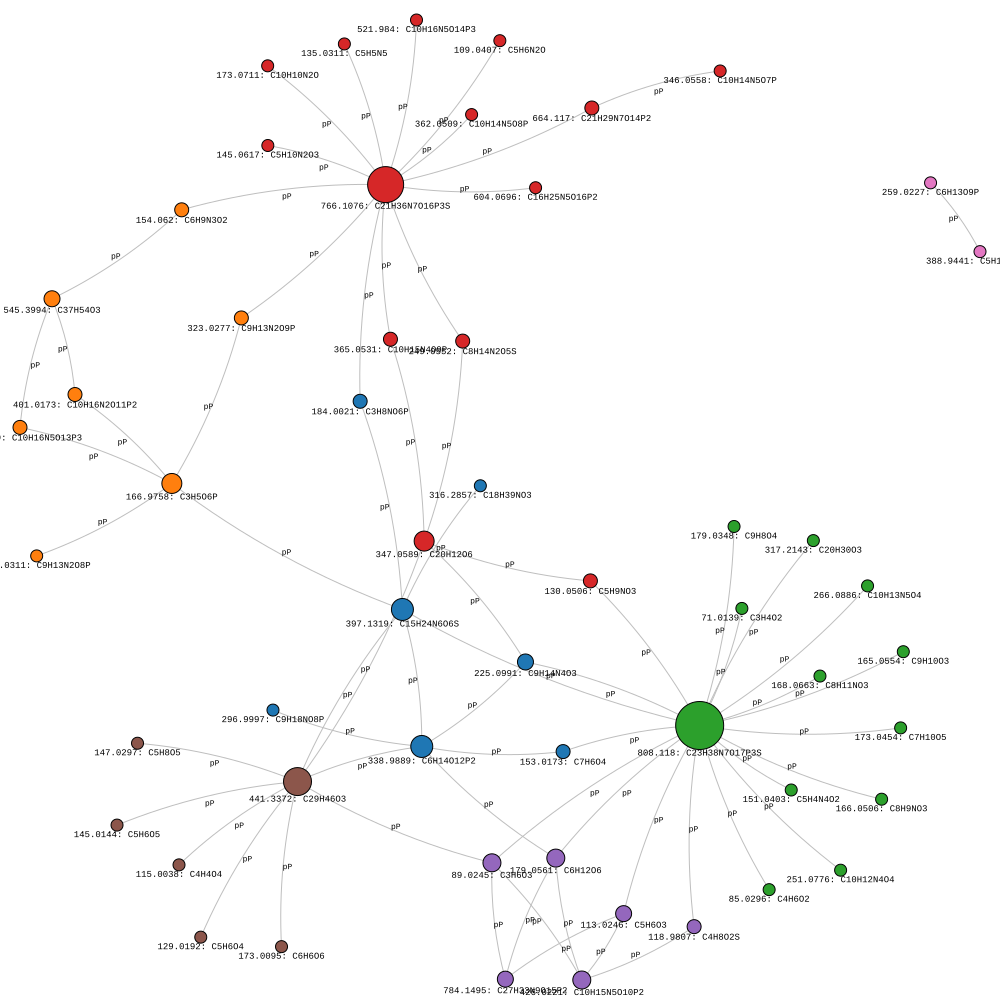

time: 76.5 ms (started: 2022-11-15 22:04:05 +00:00)


In [ ]:
dend_k = IG.community_fastgreedy()
clusters_k = dend_k.as_clustering()
nodes_membership = clusters_k.membership

print(dend_k.summary())
print(clusters_k.summary())
print(clusters_k.sizes())
print(clusters_k.giant())
print(nodes_membership)

palette = sns.color_palette("tab10", len(clusters_k.sizes()), 1)

layout = IG.layout_fruchterman_reingold()
# layout = IG.layout_davidson_harel()
# layout = IG.layout_lgl()
# layout = IG.layout_star()
# layout = IG.layout_graphopt()
# layout = IG.layout_reingold_tilford()
# layout = IG.layout_sugiyama()

visual_style={}
visual_style["bbox"] = (1000, 1000)
visual_style["vertex_size"] = 10
visual_style["vertex_color"] = [palette[m] for m in nodes_membership]
visual_style["vertex_size"] = [10 + w * 2 for w in IG.degree()]

#visual_style["vertex_label"] = [p.get_pinyin(n, "",tone_marks='numbers') for n in g2.vs['name']]
visual_style["vertex_label"] = IG.vs["formula"]
visual_style["labels"] = IG.vs["name"]
visual_style["vertex_label_dist"] =1
visual_style["vertex_label_size"]= 9
#visual_style["vertex_label_size"] = [12 if vd>6 else 6 for vd in v_degree]
#visual_style["vertex_shape"] = "circle"
visual_style["edge_label"] = IG.es["weight"]
visual_style["edge_color"] = "grey"
visual_style["edge_width"] = 1
visual_style["edge_label_size"] = 8
visual_style["edge_curved"] = 0.1

""" fig, ax = plt.subplots(figsize=(30, 30))
ig.plot(g2, layout=layout, target=ax, **visual_style)
plt.axis("off") """

ig.plot(IG, layout=layout, **visual_style, target="graph_new_full_cluster.pdf")

## BioCyc

### Get information from clusters

In [ ]:
# Get formula by node id into clusters
df_cluster_formula = pd.DataFrame()
for k in range(len(clusters_k.sizes())):
  before = df_process1[clusters_k.subgraph(k).vs["name"]].mean(axis=0).values
  after = df_process2[clusters_k.subgraph(k).vs["name"]].mean(axis=0).values

  additional = pd.DataFrame({"Cluster {}: {}".format(k + 1, "Alignment"): clusters_k.subgraph(k).vs["name"],
                             # "Cluster {}: {}".format(k + 1, "INCHIKEY"): list_metabolite_formula["INCHIKEY"].loc[clusters_k.subgraph(k).vs["name"]].values,
                             # "Cluster {}: {}".format(k + 1, "Average Rt(min)"): list_metabolite_formula["Average Rt(min)"].loc[clusters_k.subgraph(k).vs["name"]].values,
                             "Cluster {}: {}".format(k + 1, "Formula"): list_metabolite_formula["Chemical Formula (based on BioCyc)"].loc[clusters_k.subgraph(k).vs["name"]].values,
                             # "Cluster {}: {}".format(k + 1, "Daltons"): list_metabolite_formula["Formula"].loc[clusters_k.subgraph(k).vs["name"]].apply(lambda formula: get_daltons(formula)),
                             "Cluster {}: {}".format(k + 1, "Before"): np.log10(before),
                             "Cluster {}: {}".format(k + 1, "After"): np.log10(after),
                             "Cluster {}: {}".format(k + 1, "Ratio"): np.log10(np.divide(after, before))
                             })
  df_cluster_formula = pd.concat([df_cluster_formula, additional], axis=1)
  
df_cluster_formula

Cluster 1: Alignment Cluster 1: Formula  Cluster 1: Before  \
0              296.9997          C9H18NO8P           3.558299   
1              338.9889         C6H14O12P2           4.984029   
2              316.2857          C18H39NO3           3.569251   
3              397.1319        C15H24N6O6S           3.615598   
4              153.0173             C7H6O4           4.000286   
5              225.0991          C9H14N4O3           3.587354   
6              184.0021           C3H8NO6P           4.703183   
7                   NaN                NaN                NaN   
8                   NaN                NaN                NaN   
9                   NaN                NaN                NaN   
10                  NaN                NaN                NaN   
11                  NaN                NaN                NaN   
12                  NaN                NaN                NaN   
13                  NaN                NaN                NaN   

    Cluster 1: After  Cluster 1: Ratio Cluster 2: Alignment  \
0           3.896102          0.337802             307.0311   
1           5.134561          0.150532             166.9758   
2           3.890319          0.321069             323.0277   
3           3.711946          0.096347             401.0173   
4           4.037978          0.037692             545.3994   
5           3.779764          0.192411             505.9889   
6           5.235204          0.532021              154.062   
7                NaN               NaN                  NaN   
8                NaN               NaN                  NaN   
9                NaN               NaN                  NaN   
10               NaN               NaN                  NaN   
11               NaN               NaN                  NaN   
12               NaN               NaN                  NaN   
13               NaN               NaN                  NaN   

   Cluster 2: Formula  Cluster 2: Before  Cluster 2: After  Cluster 2: Ratio  \
0          C9H13N2O8P           3.402969          3.557602          0.154633   
1             C3H5O6P           3.373987          3.565083          0.191096   
2          C9H13N2O9P           4.039703          4.257001          0.217298   
3       C10H16N2O11P2           3.443035          3.685997          0.242962   
4            C37H54O3           4.099119          4.444326          0.345207   
5       C10H16N5O13P3           5.439090          5.757286          0.318196   
6            C6H9N3O2           5.198886          5.530745          0.331859   
7                 NaN                NaN               NaN               NaN   
8                 NaN                NaN               NaN               NaN   
9                 NaN                NaN               NaN               NaN   
10                NaN                NaN               NaN               NaN   
11                NaN                NaN               NaN               NaN   
12                NaN                NaN               NaN               NaN   
13                NaN                NaN               NaN               NaN   

    ... Cluster 6: Alignment Cluster 6: Formula  Cluster 6: Before  \
0   ...             441.3372           C29H46O3           3.792341   
1   ...             115.0038             C4H4O4           3.879885   
2   ...             129.0192             C5H6O4           3.942193   
3   ...             145.0144             C5H6O5           3.785330   
4   ...             147.0297             C5H8O5           4.295049   
5   ...             173.0095             C6H6O6           4.018133   
6   ...                  NaN                NaN                NaN   
7   ...                  NaN                NaN                NaN   
8   ...                  NaN                NaN                NaN   
9   ...                  NaN                NaN                NaN   
10  ...                  NaN                NaN                NaN   
11  ...                  NaN            

time: 138 ms (started: 2022-11-15 22:22:29 +00:00)


In [ ]:
# Save
# df_cluster_formula.to_csv("{}/Outputs/Clusters/df_new_full_cluster_formula_ratio_05_04.csv".format(dir), index=True)

time: 741 µs (started: 2022-11-13 19:17:34 +00:00)


### Get daltons

In [ ]:
# =(E3*12)+(F3*1.00782503207)+(G3*14.0030740048)+(H3*15.99491461956)+
#(I3*30.97376163)+(J3*31.972071)+(L3*18.99840322)+(M3*34.96885268)+(N3*78.9183371)+(P3*13.0033548378)+(Q3*2.0141017778)+(R3*15.0001088982)+(S3*17.999161)+(K3*27.9769265325)+(O3*126.904473)

In [ ]:
formula = "C11H12O12"
# formula = "C18H14F4N2O4S"
formula = "C17H12O5"
get_daltons(formula)

296.06847348264

time: 4.52 ms (started: 2022-11-15 16:04:24 +00:00)


In [ ]:
# Get formula by node id into clusters and save one by one
for k in range(len(clusters_k.sizes())):
  before = df_process1[clusters_k.subgraph(k).vs["name"]].mean(axis=0).values
  after = df_process2[clusters_k.subgraph(k).vs["name"]].mean(axis=0).values

  df_cluster_formula = pd.DataFrame({"Alignment": clusters_k.subgraph(k).vs["name"],
                                     # "INCHIKEY": list_metabolite_formula["INCHIKEY"].loc[clusters_k.subgraph(k).vs["name"]].values,
                                     "Formula": list_metabolite_formula["Chemical Formula (based on BioCyc)"].loc[clusters_k.subgraph(k).vs["name"]].values,
                                     "Before": np.log10(before),
                                     "After": np.log10(after),
                                     "Ratio": np.log10(np.divide(after, before))})
  
  df_cluster_formula["Daltons"] = df_cluster_formula["Formula"].apply(lambda formula: get_daltons(formula))
  # first_column = df_cluster_formula.pop("INCHIKEY") 
  # df_cluster_formula.insert(0, "INCHIKEY", first_column)
  # df_cluster_formula["INCHIKEY"] = "InChIKey=" + df_cluster_formula["INCHIKEY"].astype("str")
  
  # Save
  df_cluster_formula.to_csv("{}/Outputs/Clusters/formula/df_biocyc_full_cluster{}_formula_ratio_daltons_05_04.csv".format(dir, k + 1), index=None, sep="\t")
  print(df_cluster_formula)
  print()

  Alignment      Formula    Before     After     Ratio     Daltons
0  296.9997    C9H18NO8P  3.558299  3.896102  0.337802  299.077003
1  338.9889   C6H14O12P2  4.984029  5.134561  0.150532  339.996049
2  316.2857    C18H39NO3  3.569251  3.890319  0.321069  317.292994
3  397.1319  C15H24N6O6S  3.615598  3.711946  0.096347  416.147804
4  153.0173       C7H6O4  4.000286  4.037978  0.037692  154.026609
5  225.0991    C9H14N4O3  3.587354  3.779764  0.192411  226.106590
6  184.0021     C3H8NO6P  4.703183  5.235204  0.532021  185.008924

  Alignment        Formula    Before     After     Ratio     Daltons
0  307.0311     C9H13N2O8P  3.402969  3.557602  0.154633  308.040952
1  166.9758        C3H5O6P  3.373987  3.565083  0.191096  167.982375
2  323.0277     C9H13N2O9P  4.039703  4.257001  0.217298  324.035867
3  401.0173  C10H16N2O11P2  3.443035  3.685997  0.242962  402.022933
4  545.3994       C37H54O3  4.099119  4.444326  0.345207  546.407296
5  505.9889  C10H16N5O13P3  5.439090  5.757286  0

### Get metabolites

In [ ]:
# Get formula by node id into clusters and save one by one
for k in range(len(clusters_k.sizes())):
  # before = df_raw1.loc[clusters_k.subgraph(k).vs["name"]].mean(axis=1).values
  # after = df_raw2.loc[clusters_k.subgraph(k).vs["name"]].mean(axis=1).values

  before = df_process1[clusters_k.subgraph(k).vs["name"]].mean(axis=0).values
  after = df_process2[clusters_k.subgraph(k).vs["name"]].mean(axis=0).values

  df_cluster_formula = pd.DataFrame({# "Alignment": clusters_k.subgraph(k).vs["name"],
                                     # "INCHIKEY": list_metabolite_formula["INCHIKEY"].loc[clusters_k.subgraph(k).vs["name"]].values,
                                     # "Formula": list_metabolite_formula["Chemical Formula (based on BioCyc)"].loc[clusters_k.subgraph(k).vs["name"]].values,
                                     "Metabolities": list_metabolite_formula["Metabolites - Approved by Nicola"].loc[clusters_k.subgraph(k).vs["name"]].values,
                                     "Before": np.log10(before),
                                     "After": np.log10(after),
                                     "Ratio": np.log10(np.divide(after, before))})
  
  # Save
  df_cluster_formula.to_csv("{}/Outputs/Clusters/metabolite/df_biocyc_full_cluster{}_metabolities_ratio_05_04.csv".format(dir, k + 1), index=None, sep="\t")
  print(df_cluster_formula)
  print()

                Metabolities    Before     After     Ratio
0                  C9H18NO8P  3.558299  3.896102  0.337802
1  Fructose 1,6-bisphosphate  4.984029  5.134561  0.150532
2           Phytosphingosine  3.569251  3.890319  0.321069
3                C15H24N6O6S  3.615598  3.711946  0.096347
4               C5H8O4 + Na?  4.000286  4.037978  0.037692
5                  C9H14N4O3  3.587354  3.779764  0.192411
6             Phospho-serine  4.703183  5.235204  0.532021

                                        Metabolities    Before     After  \
0                                    C7H15N2O8P + Na  3.402969  3.557602   
1                            Phosphoenolpyruvic acid  3.373987  3.565083   
2                              Uridine monophosphate  4.039703  4.257001   
3                                               dTDP  3.443035  3.685997   
4                                           C37H54O3  4.099119  4.444326   
5  Adenosine triphosphate/deoxy-Guanosine triphos...  5.439090  5.75728

### Other filter with degree

In [ ]:
# Plot using all nodes with Formula and filter by degree

edges_tuples = [(int(x[0]), int(x[1]), x[2]) for x in edges_w]
# print(edges_tuples)
g2 = ig.Graph.TupleList(edges_tuples, directed=False, weights=False)
print(len(g2.vs["name"]))
# print(g2.es["weight"])

g2 = g2.simplify()

# remove null Formula nodes
# delete_ids = [g2.vs["name"].index(node_id) for node_id in list_metabolite_no_formula.index.values if node_id in g2.vs["name"]]
delete_ids = np.where(np.isin(g2.vs["name"], list_metabolite_no_formula.index.values))[0]
g2.delete_vertices(delete_ids)
print(len(g2.vs["name"]))

# remove high degree nodes
delete_ids = [v.index for v in g2.vs if v.degree() > 50]
g2.delete_vertices(delete_ids)
print(len(g2.vs["name"]))

# remove low degree nodes
delete_ids = [v.index for v in g2.vs if v.degree() == 0]
g2.delete_vertices(delete_ids)
print(len(g2.vs["name"]))
print(g2.summary())

formula = ["{}: {}".format(thing[0], thing[1]) for thing in zip(g2.vs["name"], list_metabolite_formula["Formula"].loc[g2.vs["name"]].values)]
g2.vs["formula"] = formula
g2.es["weights"] = df_kind_changes["Kind change"].filter(items=g2.vs["name"], axis=0).values # label edges

layout = g2.layout_fruchterman_reingold()
# layout = g2.layout_davidson_harel()
# layout = g2.layout_lgl()

visual_style={}
visual_style["bbox"] = (2000, 2000)
visual_style["vertex_size"] = 10
# visual_style['vertex_size'] = [10 + w for w in g2.degree()]
visual_style["vertex_label"] = g2.vs["formula"]

visual_style["labels"] = g2.vs["name"]
# visual_style["vertex_label_color"] = "red"
visual_style["vertex_label_dist"] =1
visual_style["vertex_label_size"] = 10
visual_style["edge_label"] = g2.es["weights"]
visual_style["edge_color"] = "grey"
visual_style["edge_width"] = 1
visual_style["edge_label_size"] = 10
visual_style["edge_curved"] = 0.1
# visual_style["edge_curved"] = [False] * g2.ecount()

#visual_style["edge_label_color"] = "red"

""" fig, ax = plt.subplots(figsize=(30, 30))
ig.plot(g2, layout=layout, target=ax, **visual_style)
plt.axis("off") """

ig.plot(g2, layout=layout, **visual_style, target="graph_filter.pdf")

ValueError: ignored

time: 46.8 ms (started: 2022-11-13 04:46:58 +00:00)


Dendrogram, 185 elements, 183 merges
Clustering with 185 elements and 10 clusters
[37, 23, 30, 18, 14, 21, 32, 2, 5, 3]
IGRAPH UN-- 37 54 --
+ attr: formula (v), name (v), weights (e)
+ edges (vertex names):
273--1479, 268--614, 268--1340, 585--1482, 268--1482, 273--1708, 268--1708,
273--542, 268--542, 268--744, 585--745, 268--745, 585--789, 268--789,
273--1321, 585--1321, 268--1321, 268--1399, 585--1494, 268--1494, 585--1506,
268--1506, 268--1713, 268--180, 273--775, 273--1365, 585--1365, 268--1365,
585--1379, 268--1379, 585--1384, 268--1384, 268--1387, 585--1389, 268--1389,
268--1597, 273--753, 585--753, 268--753, 1597--753, 268--759, 268--1348,
268--1391, 268--757, 268--1493, 268--1618, 273--1671, 585--1671, 268--1671,
273--736, 745--736, 273--751, 273--769, 585--799
[0, 1, 0, 2, 3, 1, 4, 5, 3, 6, 2, 3, 5, 5, 5, 3, 5, 5, 0, 3, 4, 4, 1, 1, 1, 7, 0, 2, 2, 8, 2, 1, 7, 5, 5, 0, 5, 6, 2, 1, 1, 1, 2, 3, 0, 1, 2, 2, 0, 3, 1, 1, 3, 2, 0, 4, 1, 5, 5, 4, 4, 1, 5, 1, 4, 6, 6, 3, 2, 0, 4, 1, 6,

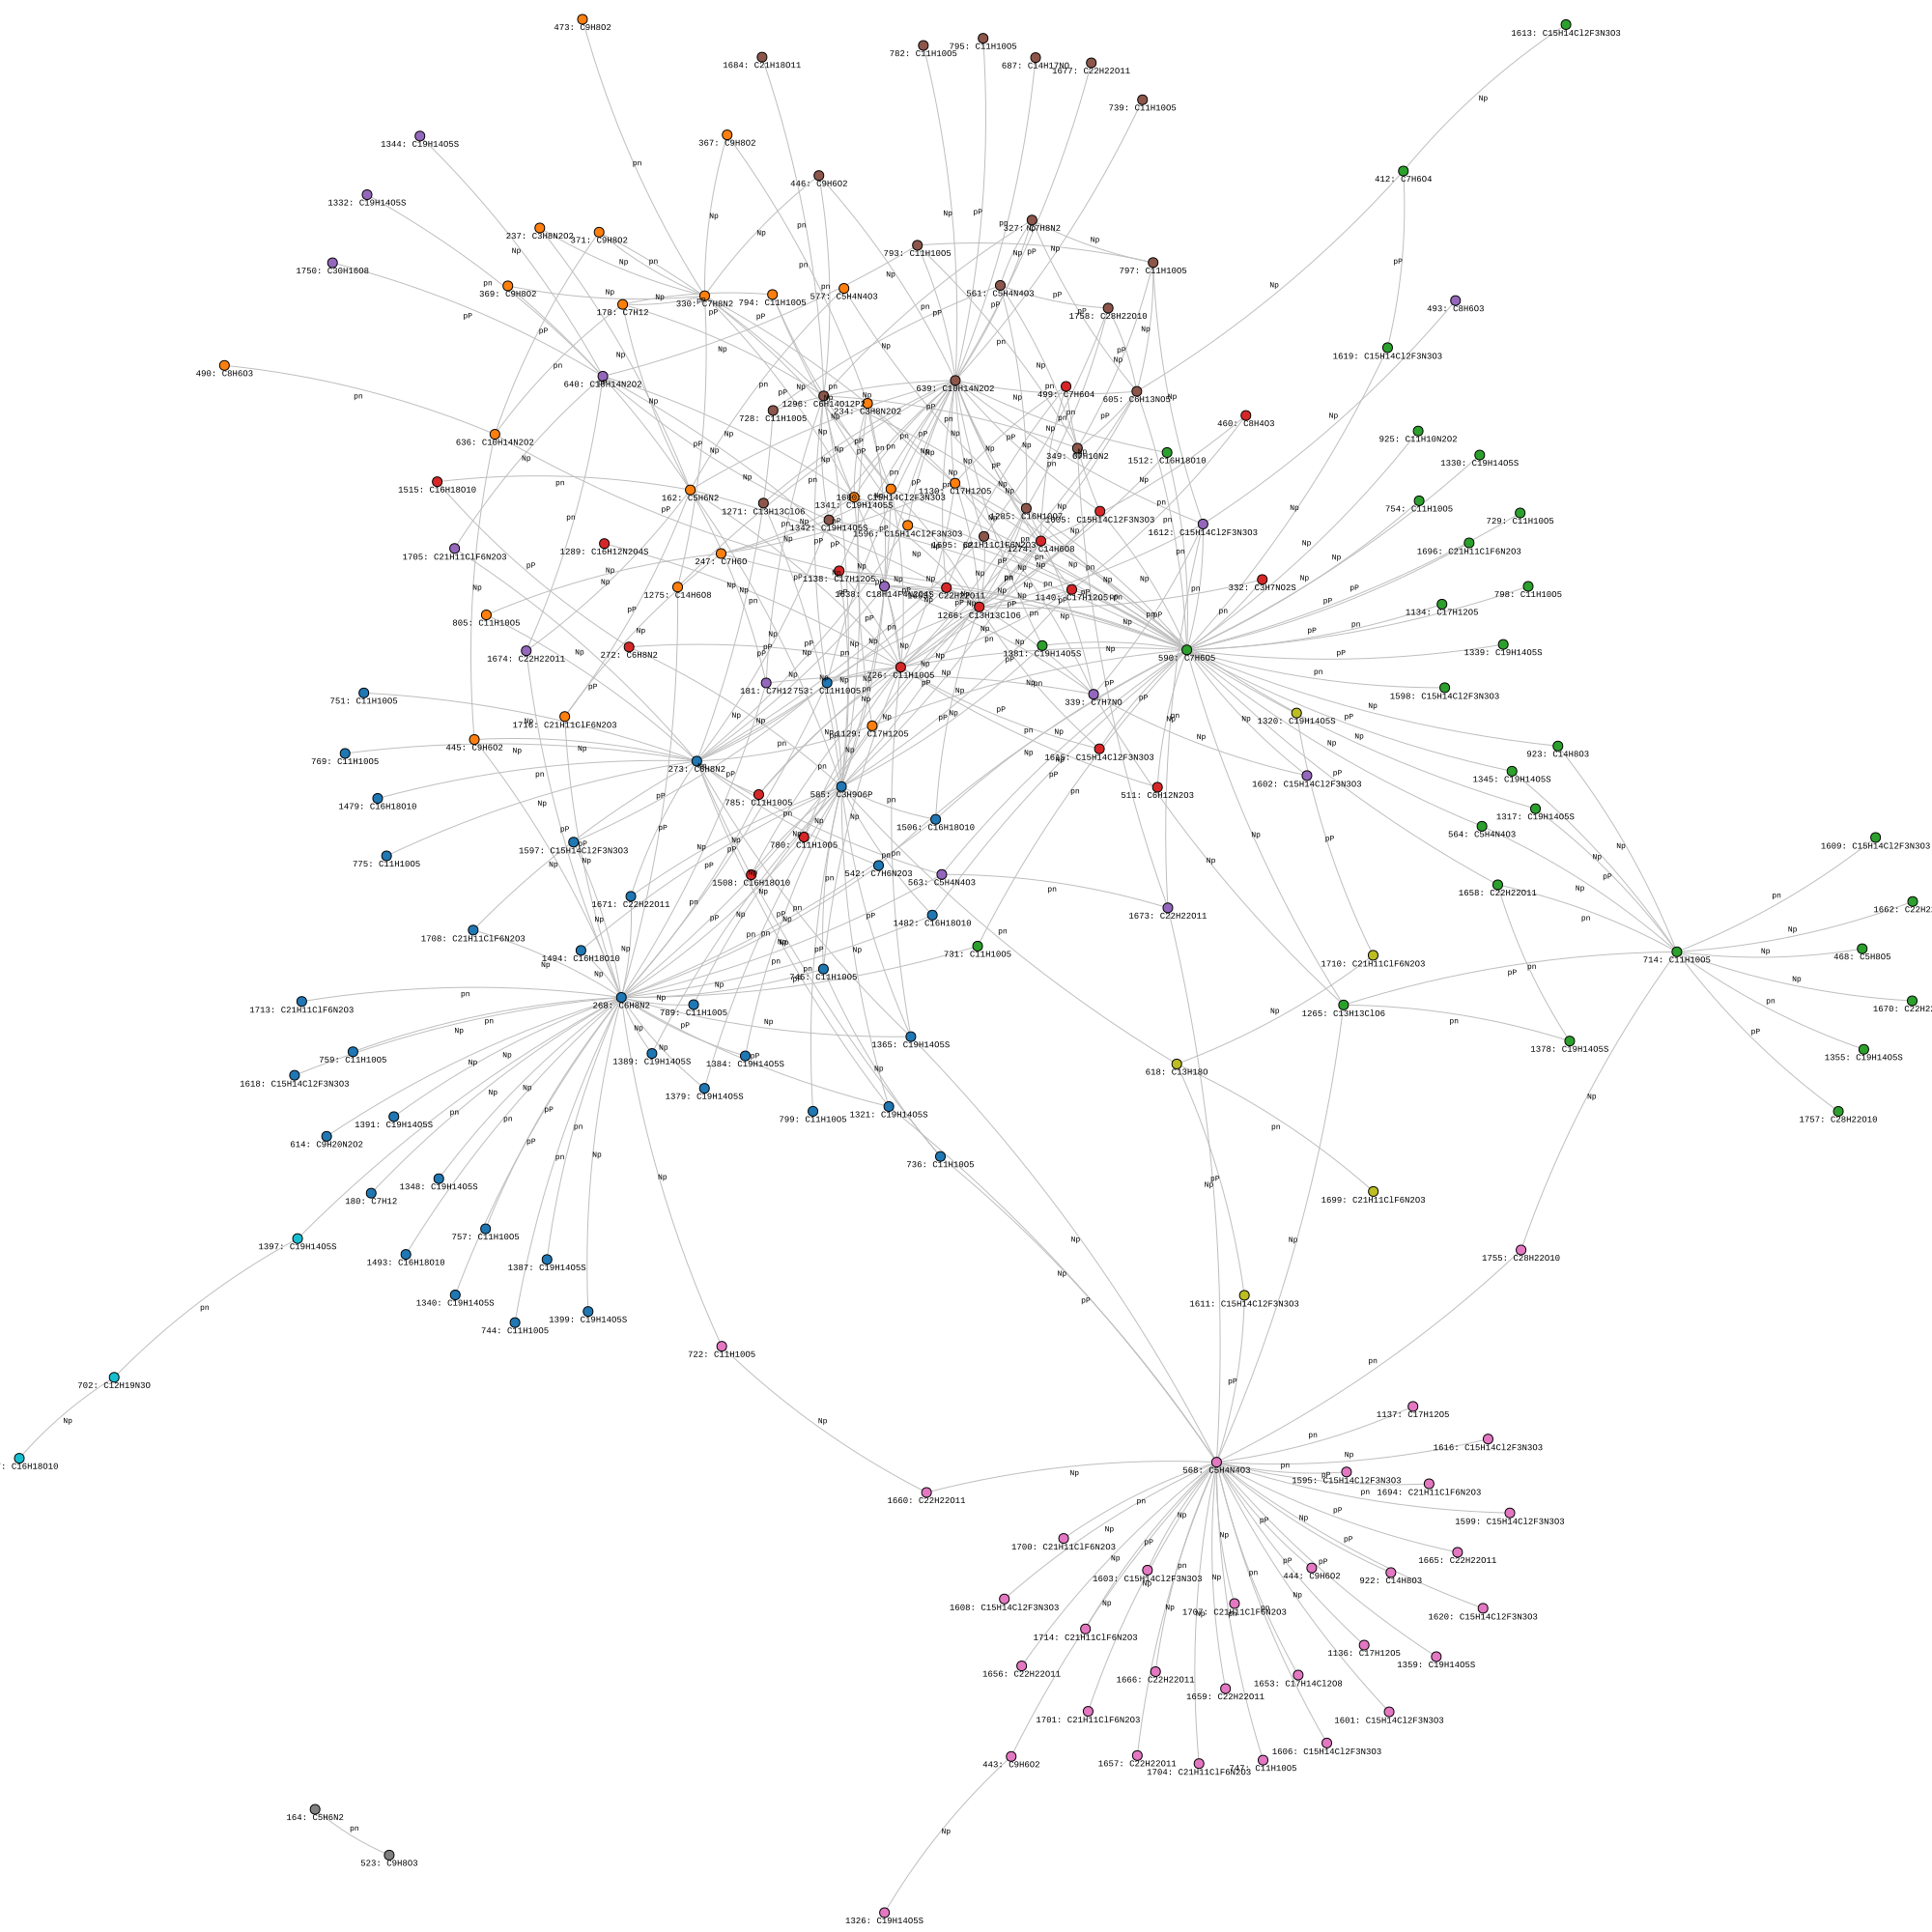

time: 325 ms (started: 2022-07-26 00:25:26 +00:00)


In [ ]:
# Plot clustering

dend_k = g2.community_fastgreedy()
clusters_k = dend_k.as_clustering()
nodes_membership = clusters_k.membership

print(dend_k.summary())
print(clusters_k.summary())
print(clusters_k.sizes())
print(clusters_k.giant())
print(nodes_membership)

palette = sns.color_palette("tab10", len(clusters_k.sizes()), 1)

layout = g2.layout_fruchterman_reingold()
# layout = g2.layout_davidson_harel()
# layout = g2.layout_lgl()
# layout = g2.layout_star()
# layout = g2.layout_graphopt()
# layout = g2.layout_reingold_tilford()
# layout = g2.layout_sugiyama()

visual_style={}
visual_style["bbox"] = (2000, 2000)
visual_style["vertex_size"] = 10
visual_style["vertex_color"] = [palette[m] for m in nodes_membership]

#visual_style["vertex_label"] = [p.get_pinyin(n, "",tone_marks='numbers') for n in g2.vs['name']]
visual_style["vertex_label"] = g2.vs["formula"]
visual_style["labels"] = g2.vs["name"]
visual_style["vertex_label_dist"] =1
visual_style["vertex_label_size"]= 9
#visual_style["vertex_label_size"] = [12 if vd>6 else 6 for vd in v_degree]
#visual_style["vertex_shape"] = "circle"
visual_style["edge_label"] = g2.es["weights"]
visual_style["edge_color"] = "grey"
visual_style["edge_width"] = 1
visual_style["edge_label_size"] = 8
visual_style["edge_curved"] = 0.1

""" fig, ax = plt.subplots(figsize=(30, 30))
ig.plot(g2, layout=layout, target=ax, **visual_style)
plt.axis("off") """

ig.plot(g2, layout=layout, **visual_style, target="graph_filter_cluster.pdf")